In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA

In [4]:
df = pd.read_csv('useractivityvariation5.csv')

In [5]:
users = df['userID'].unique()

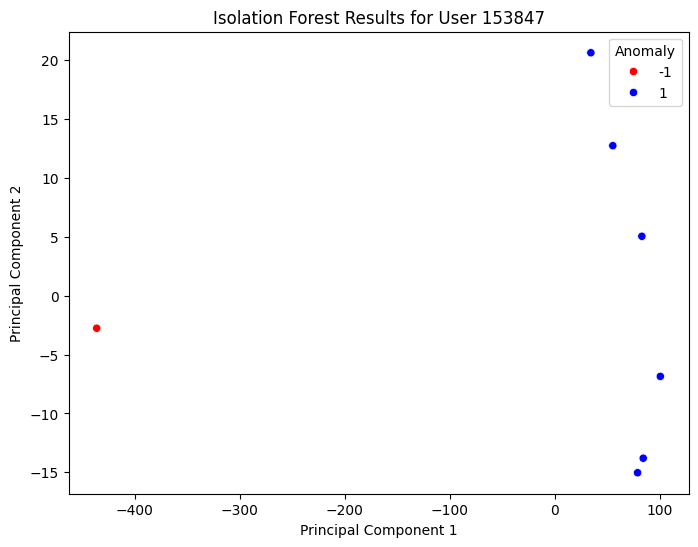

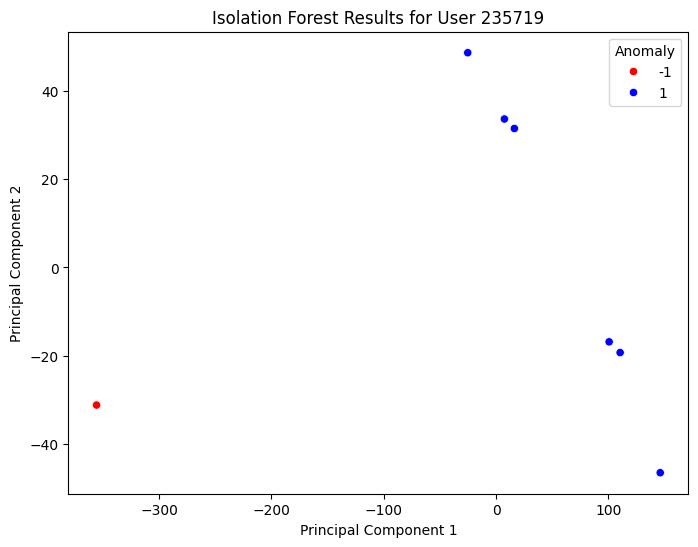

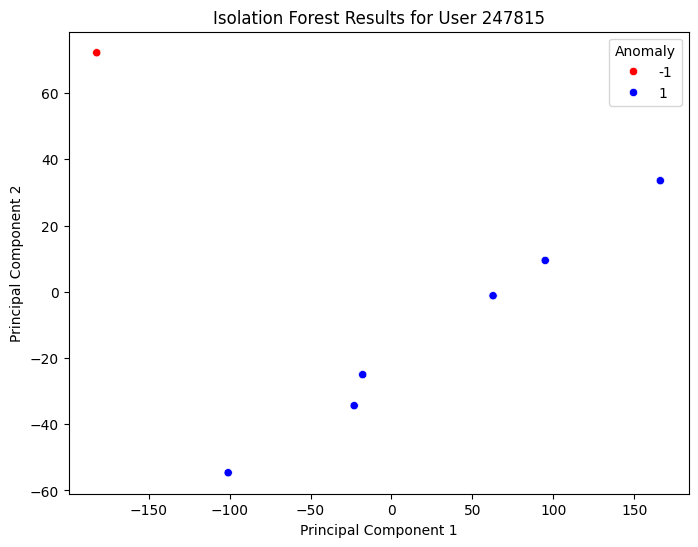

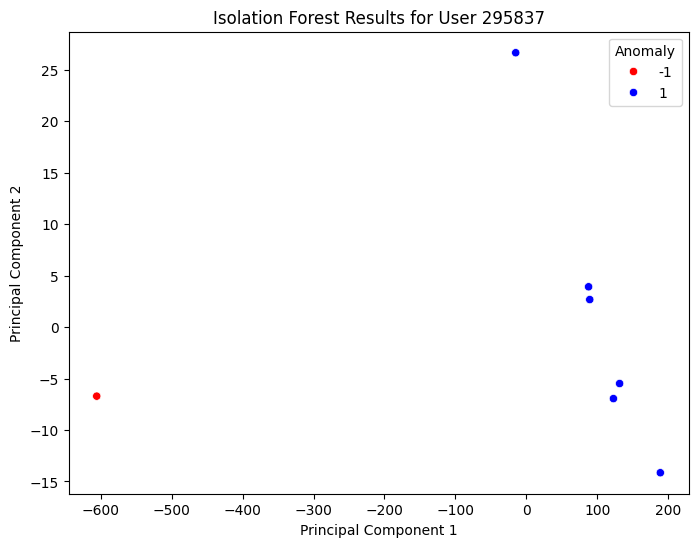

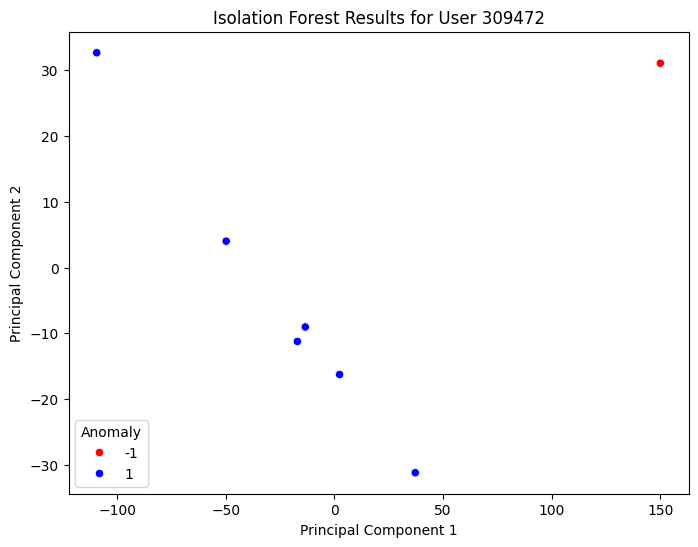

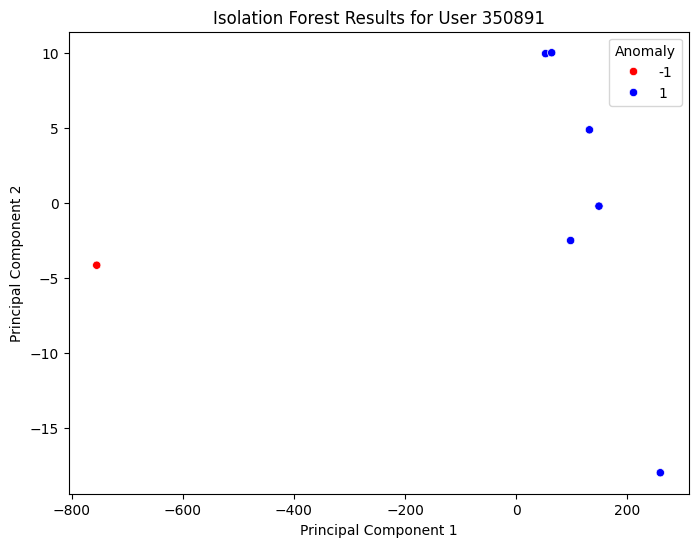

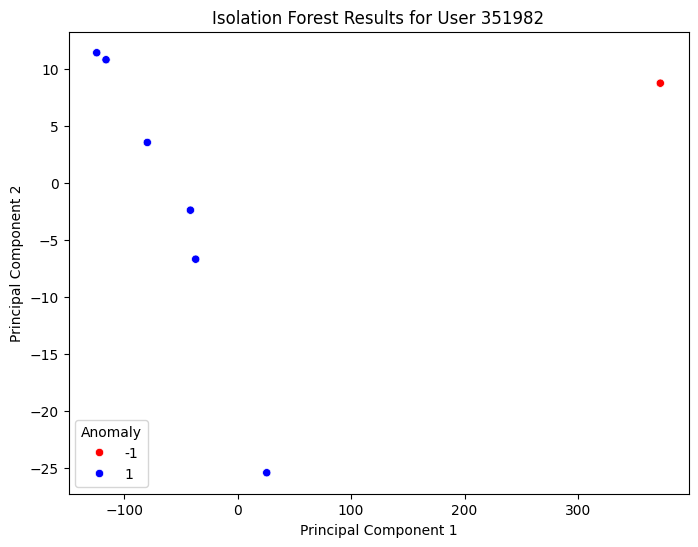

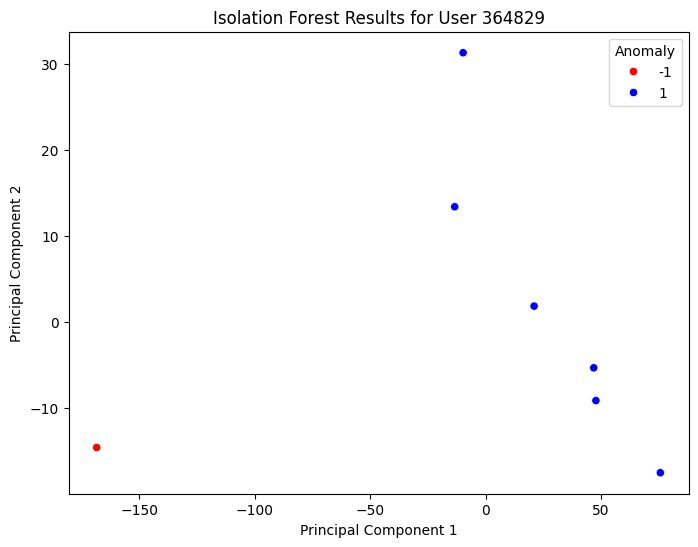

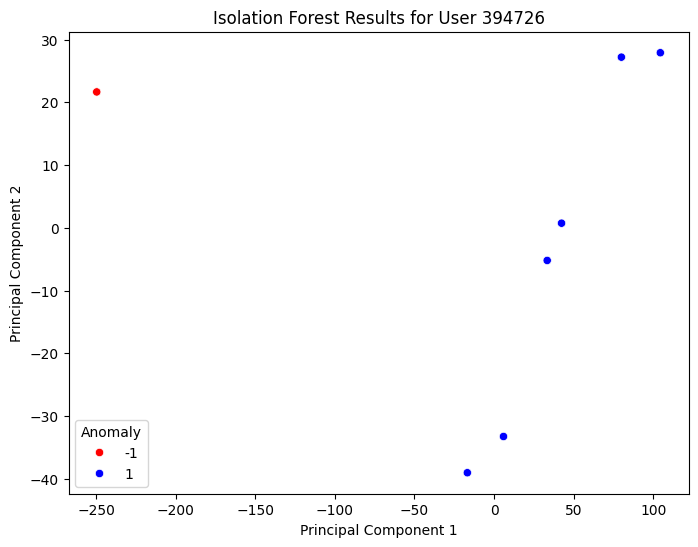

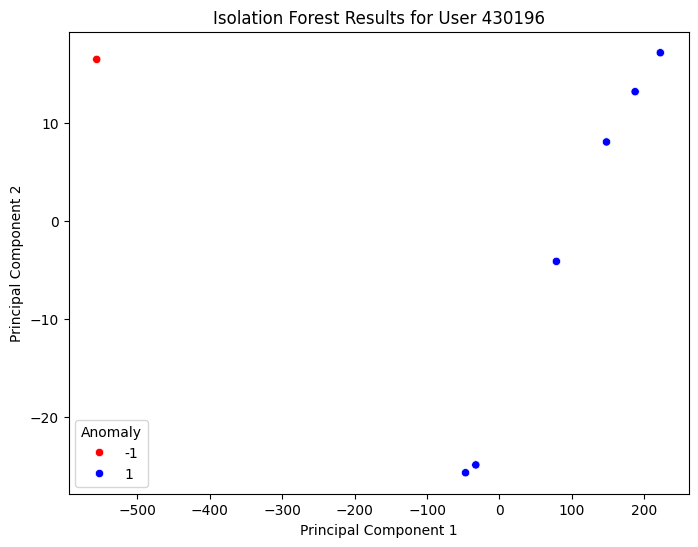

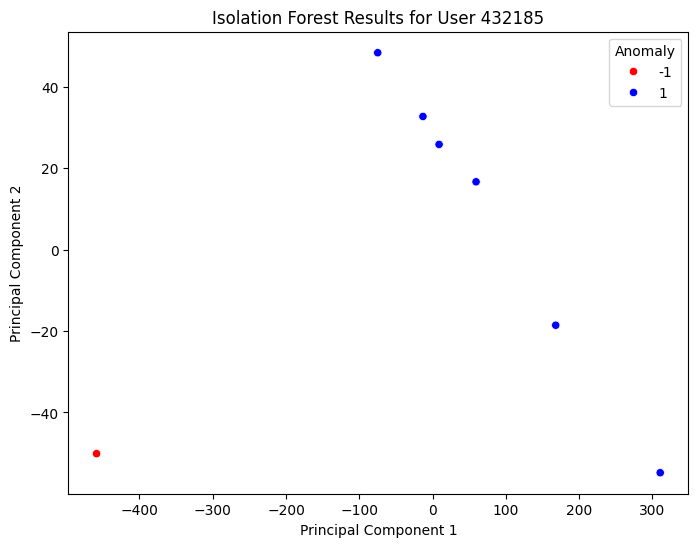

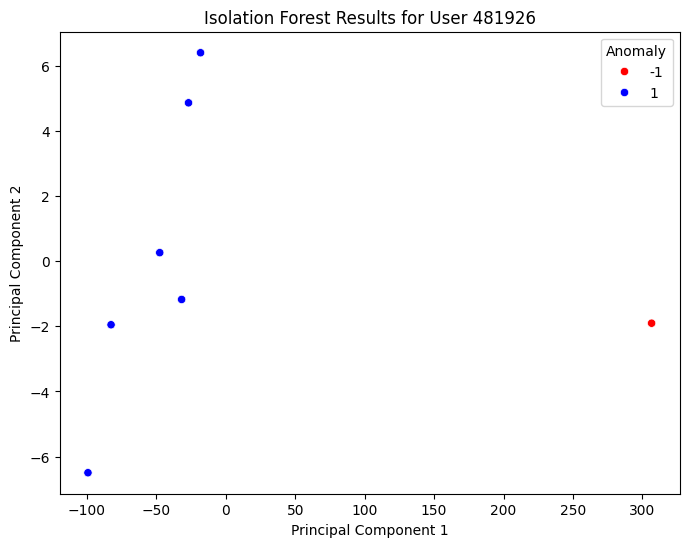

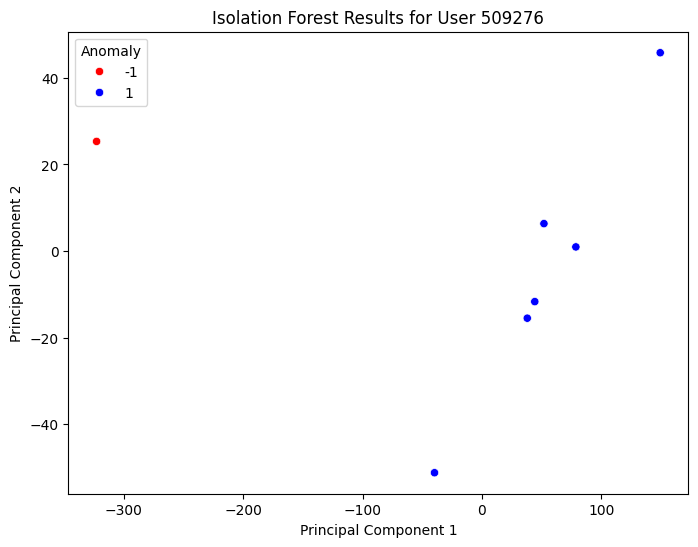

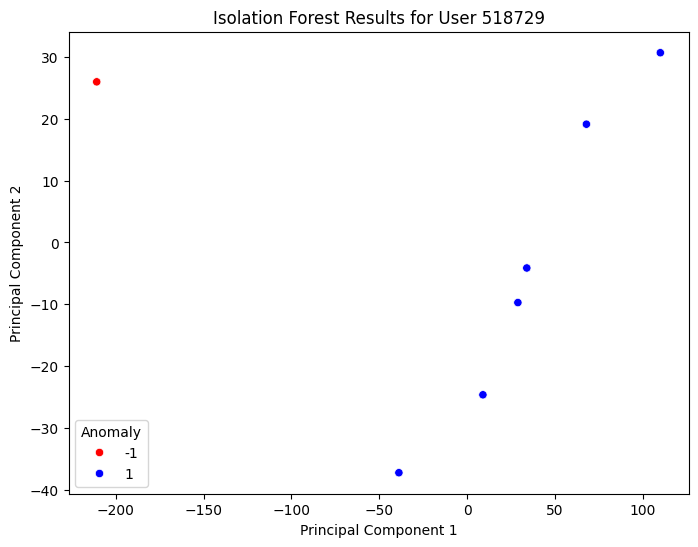

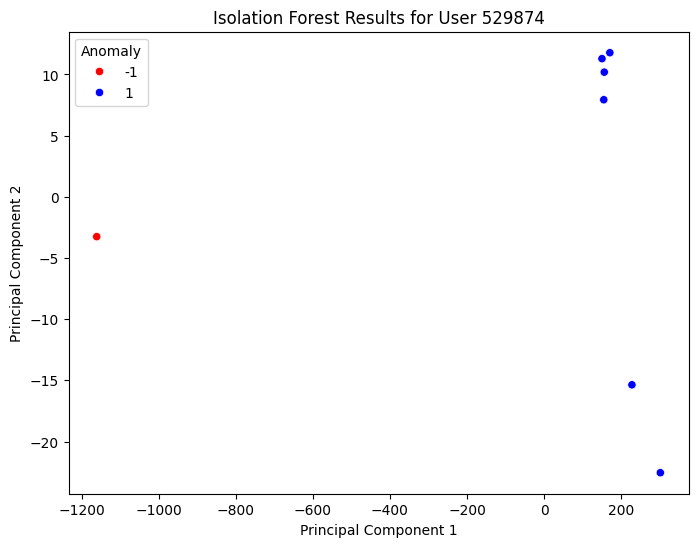

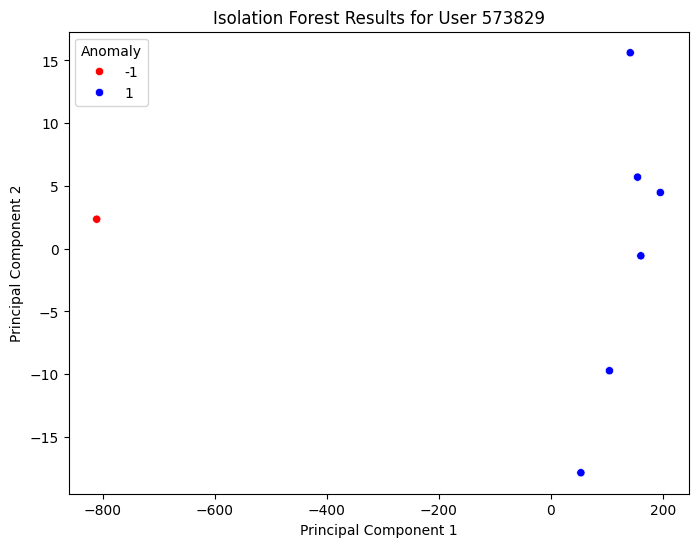

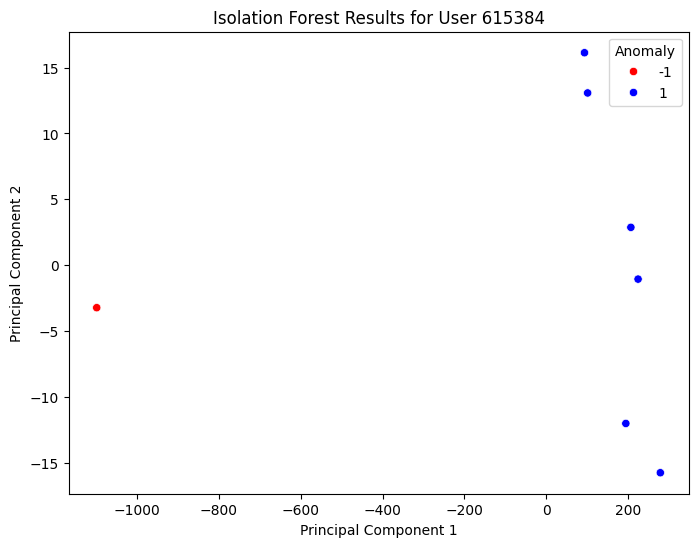

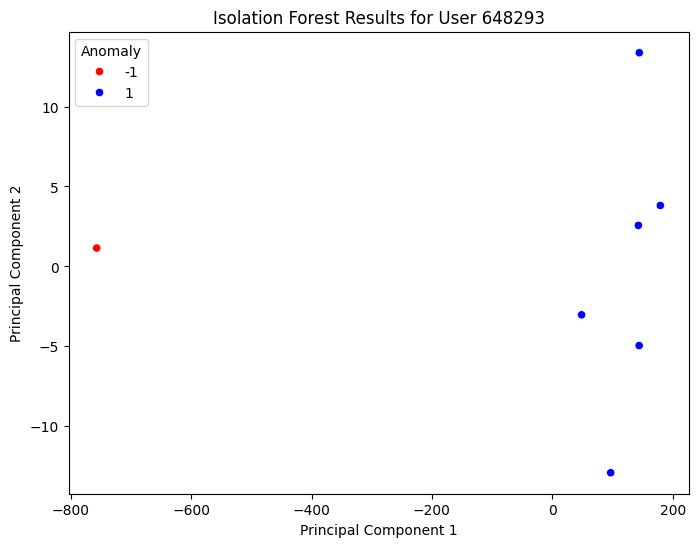

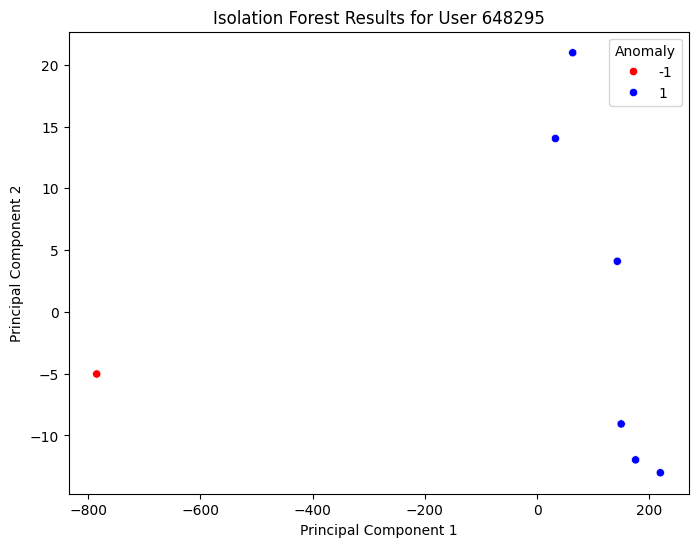

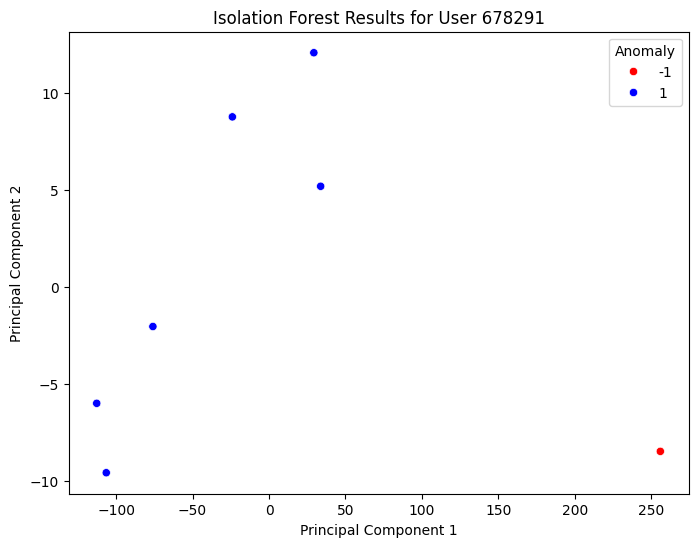

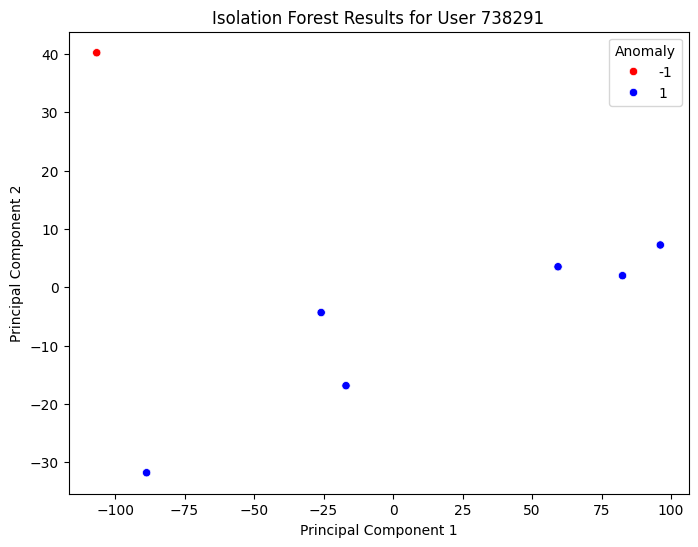

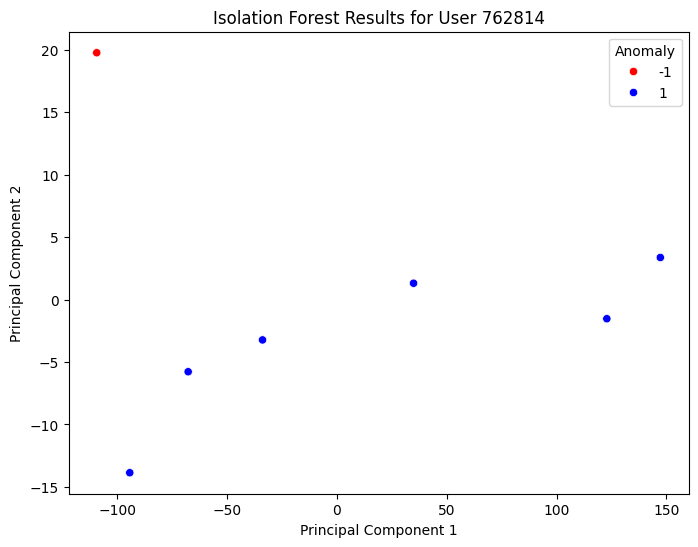

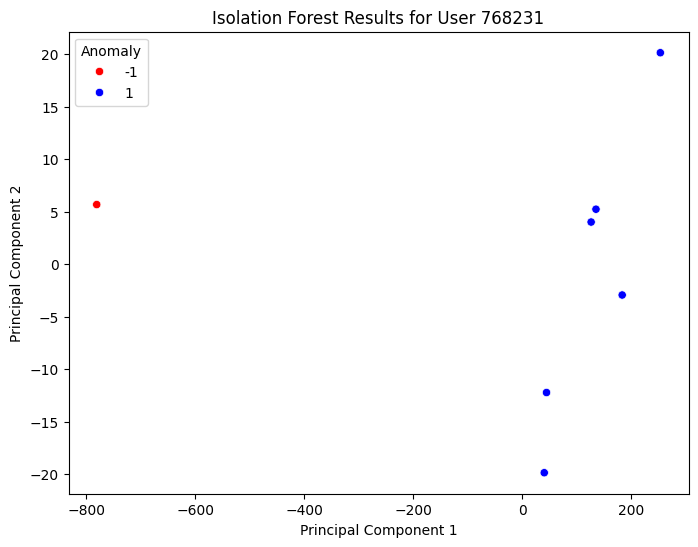

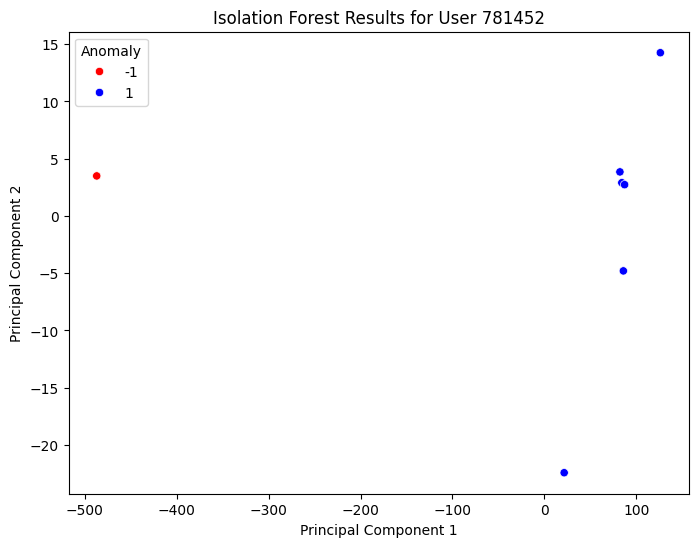

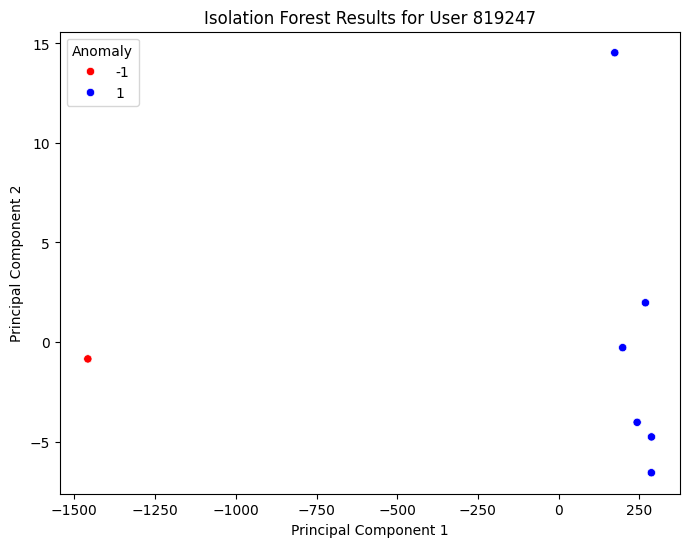

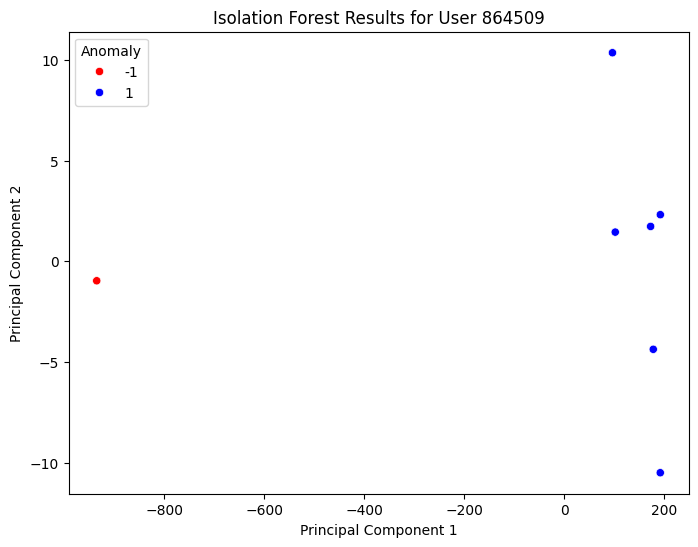

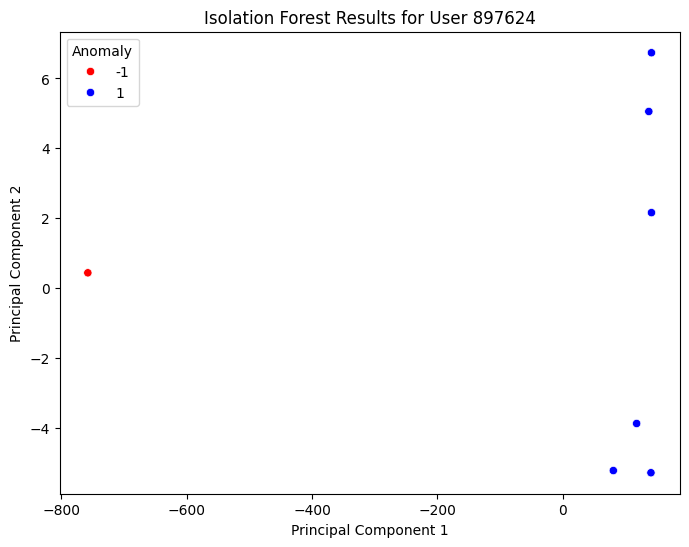

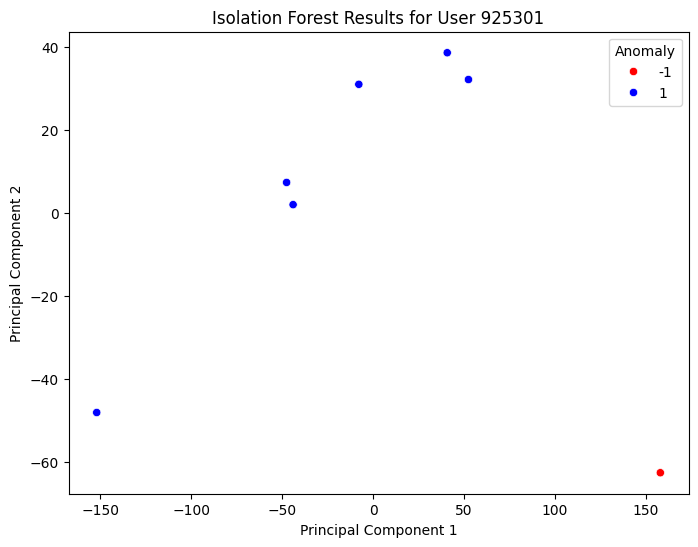

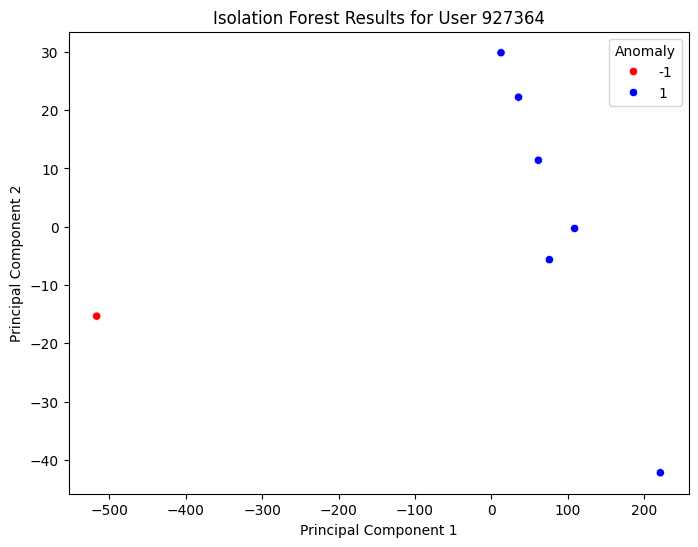

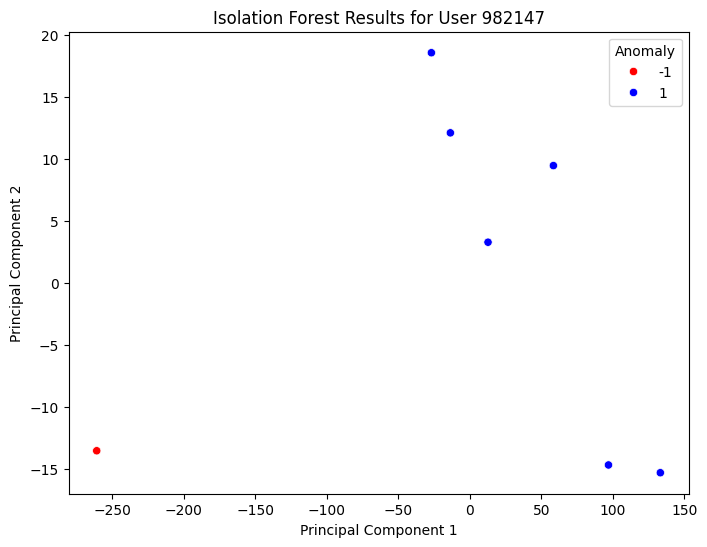

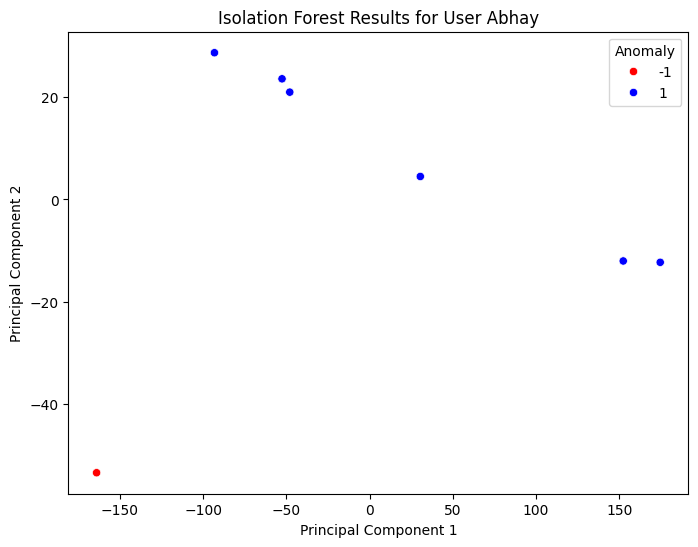

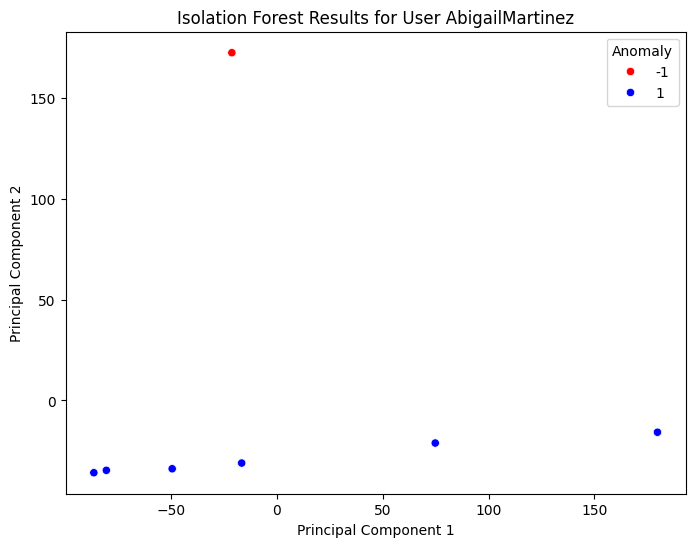

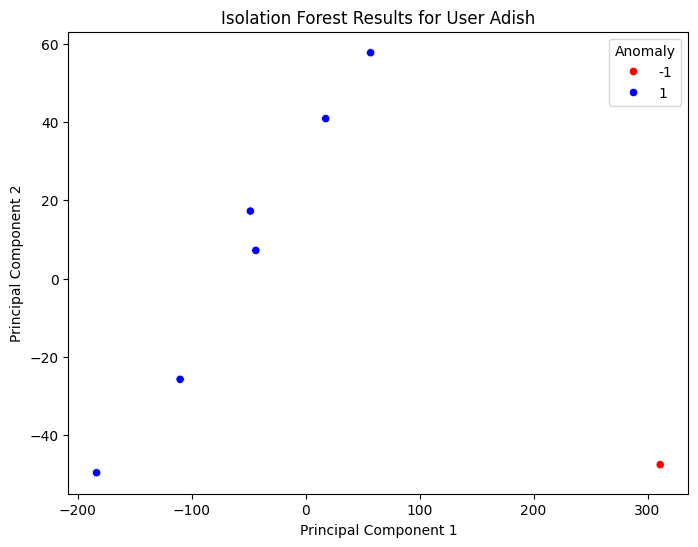

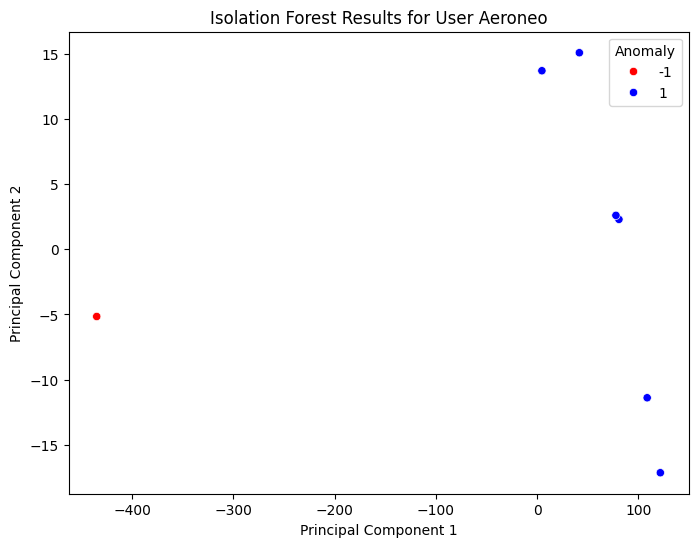

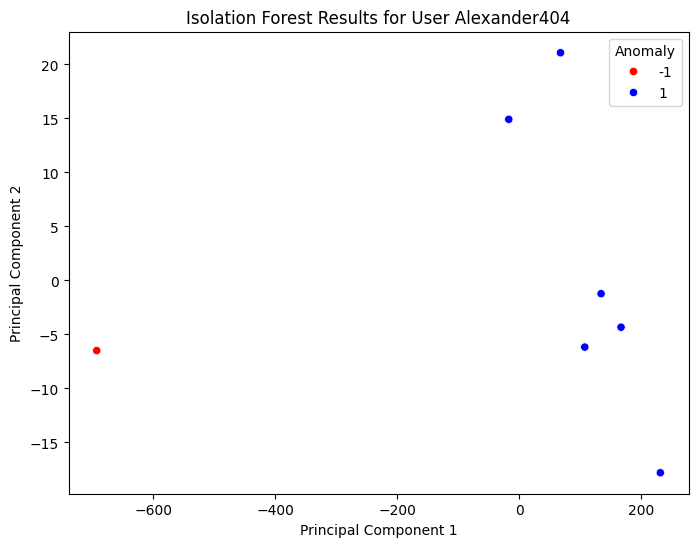

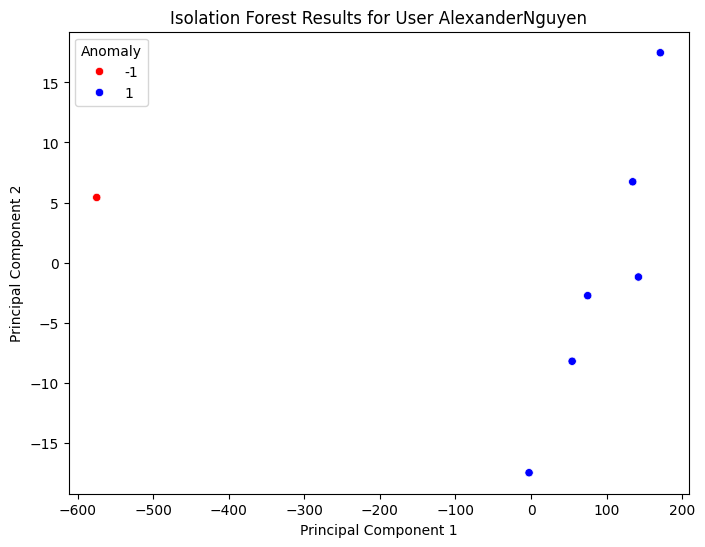

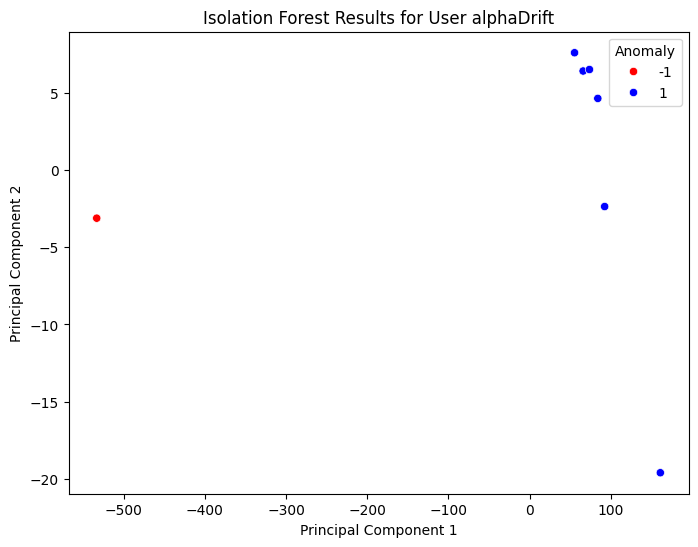

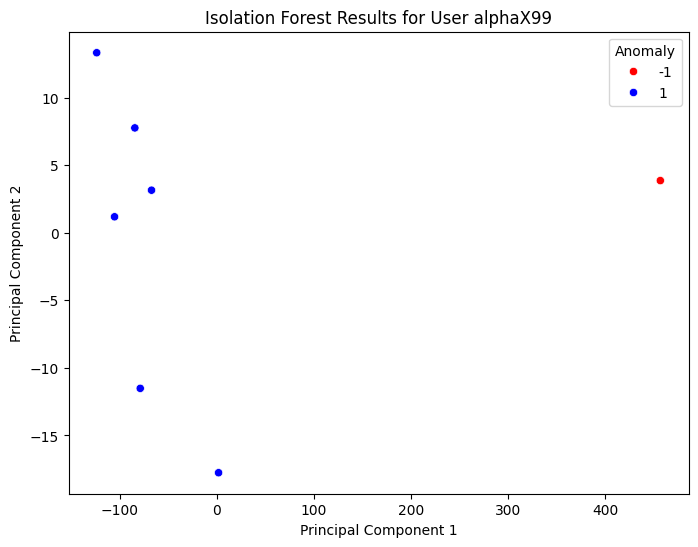

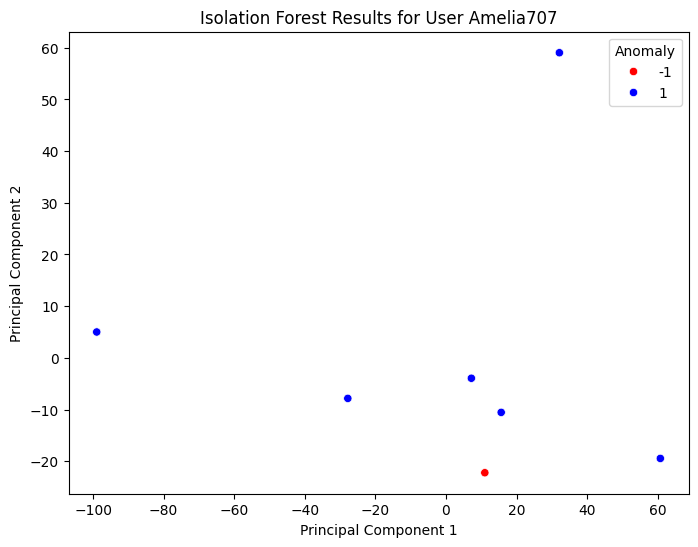

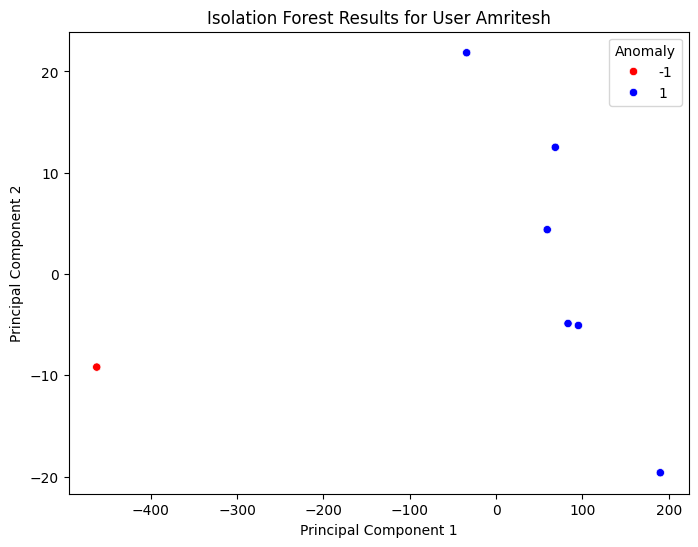

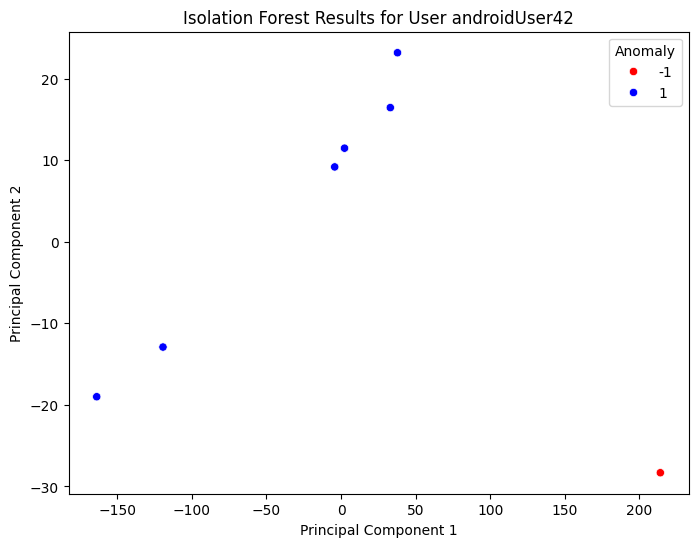

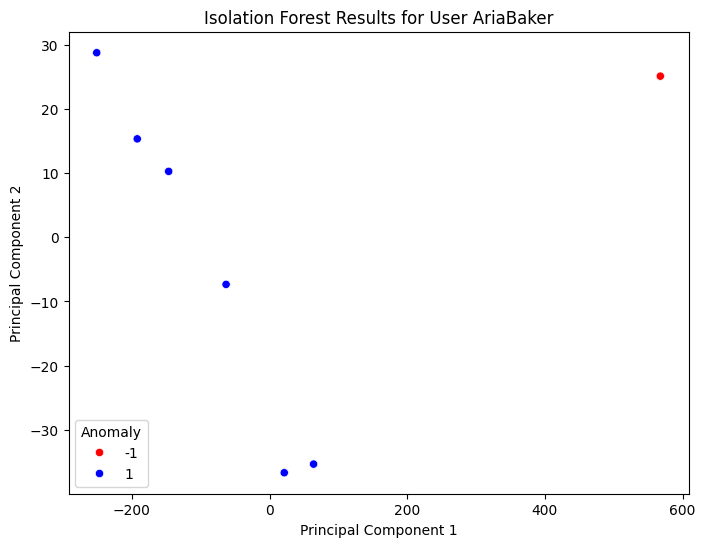

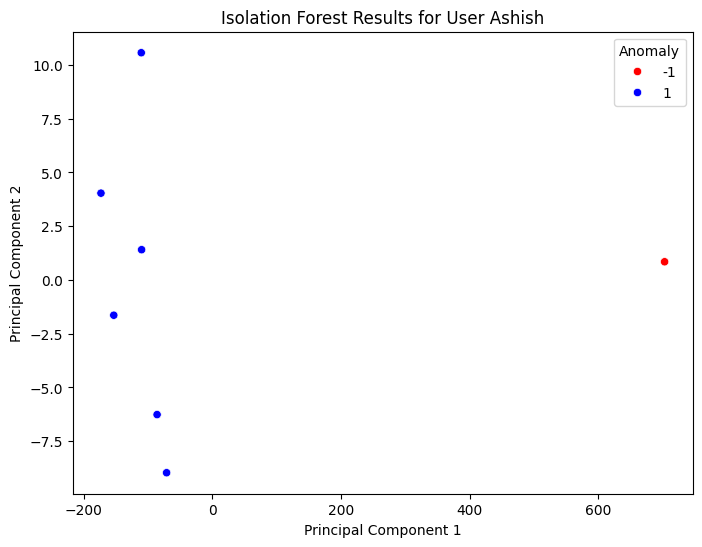

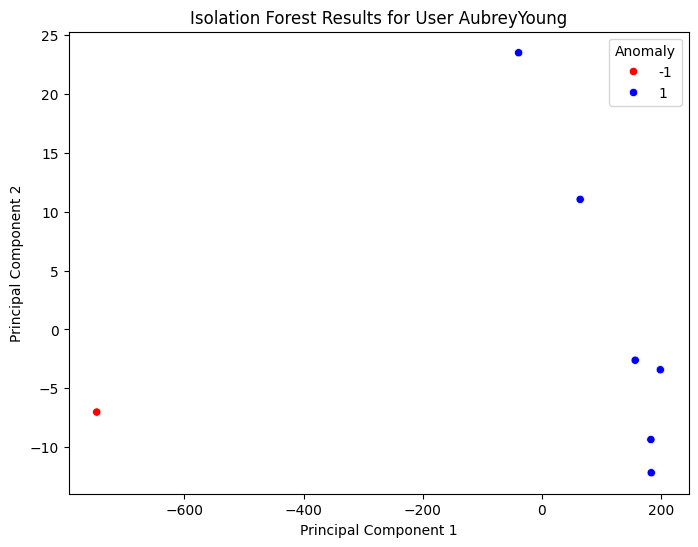

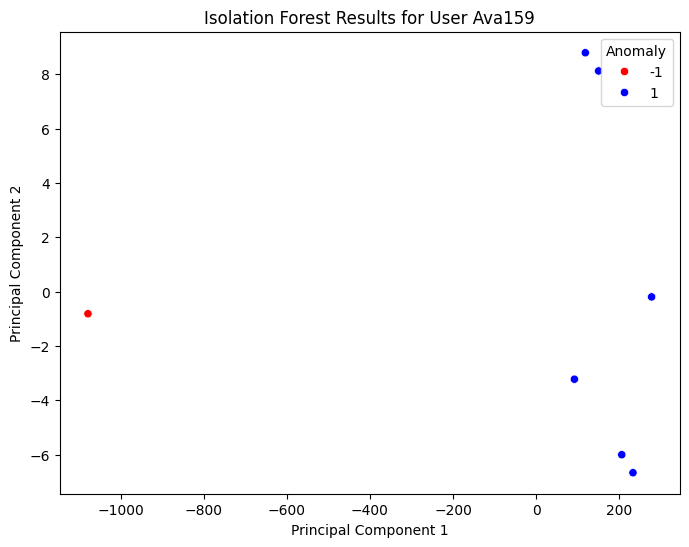

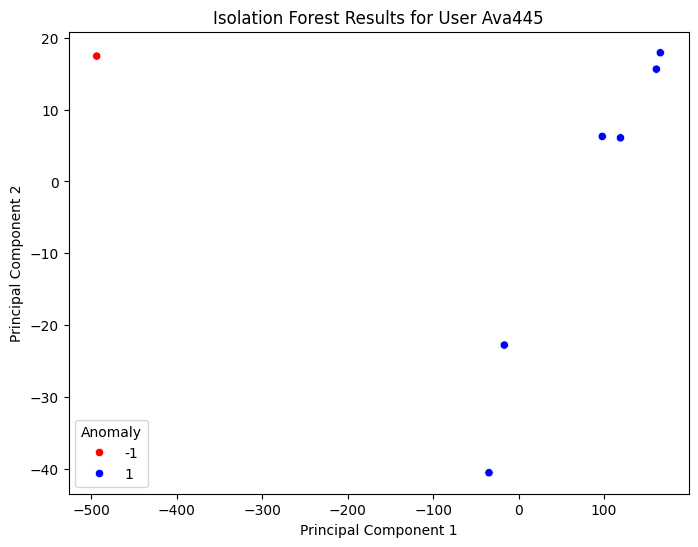

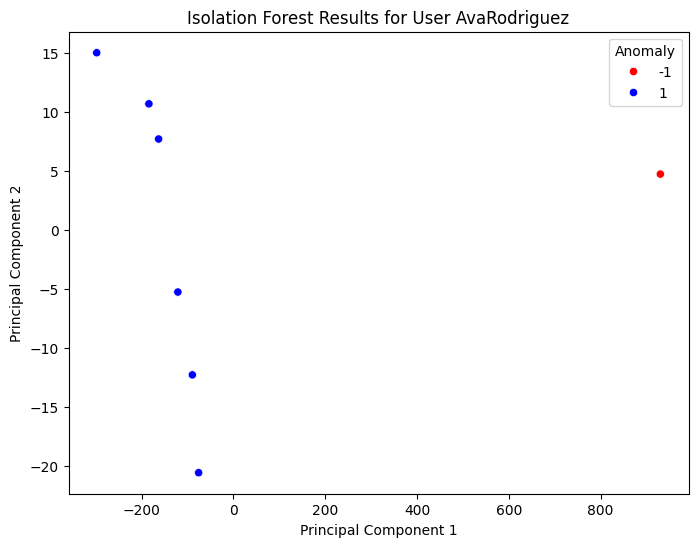

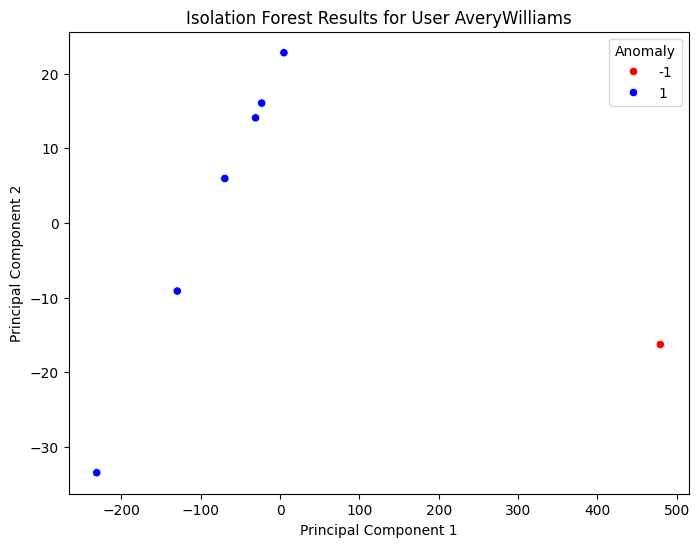

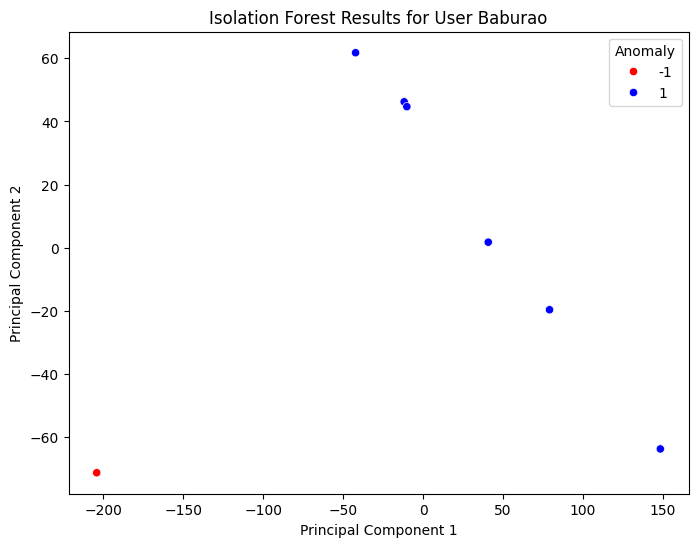

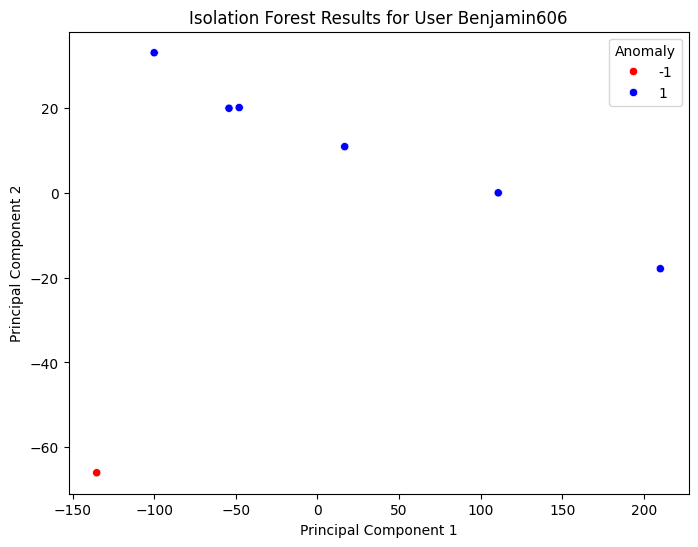

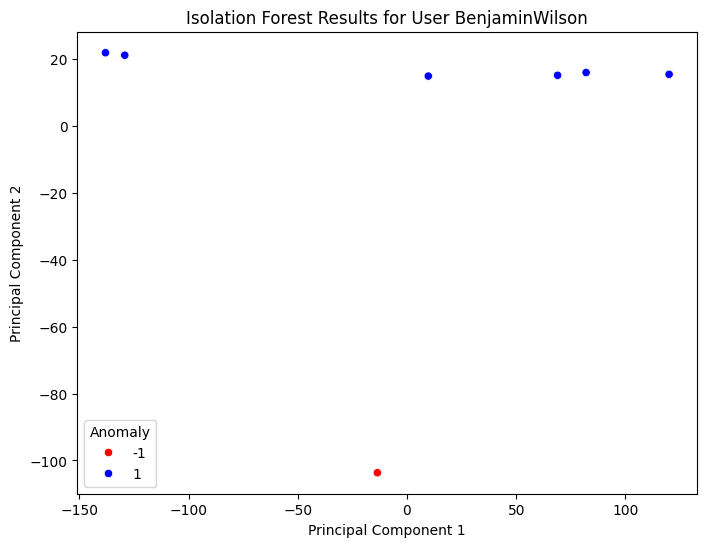

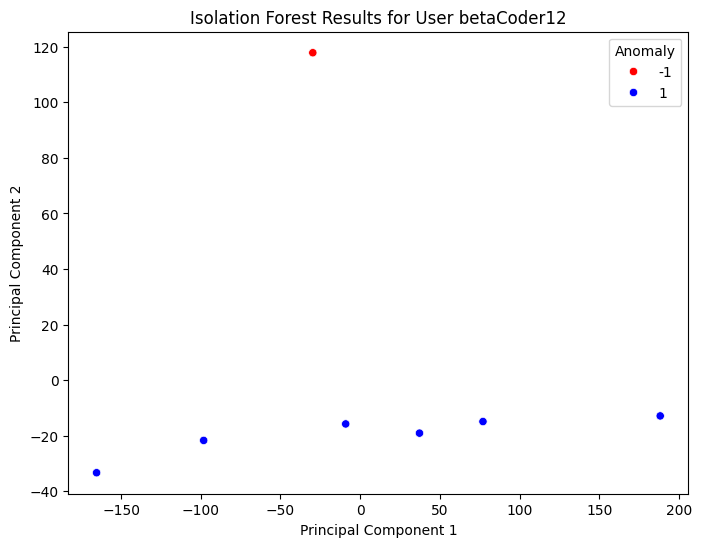

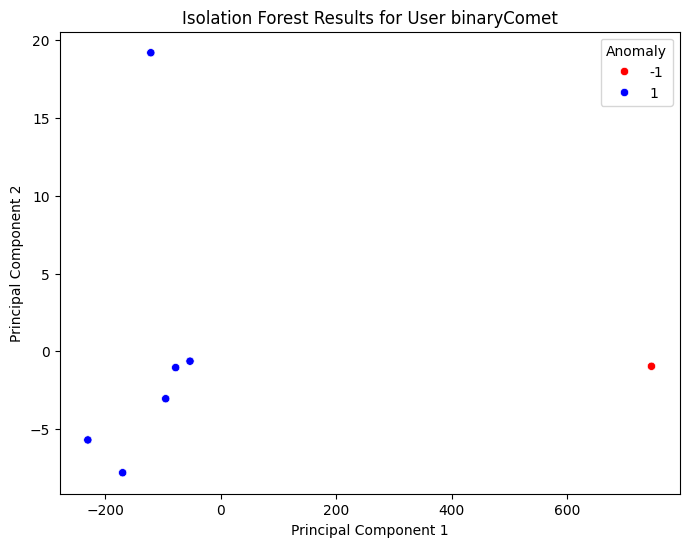

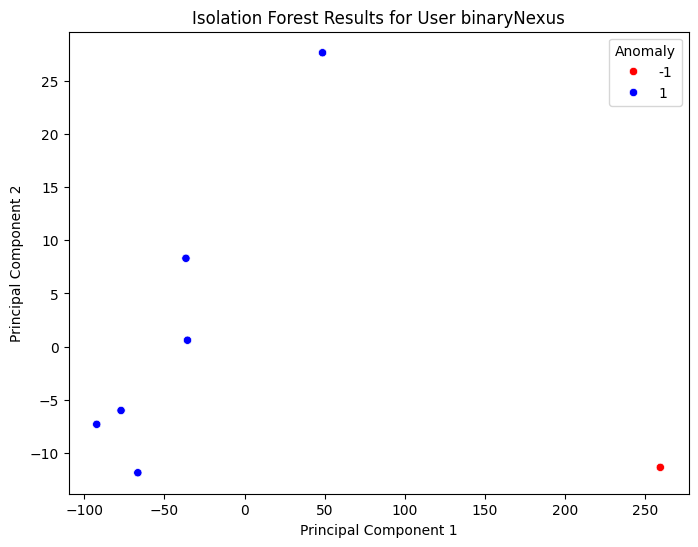

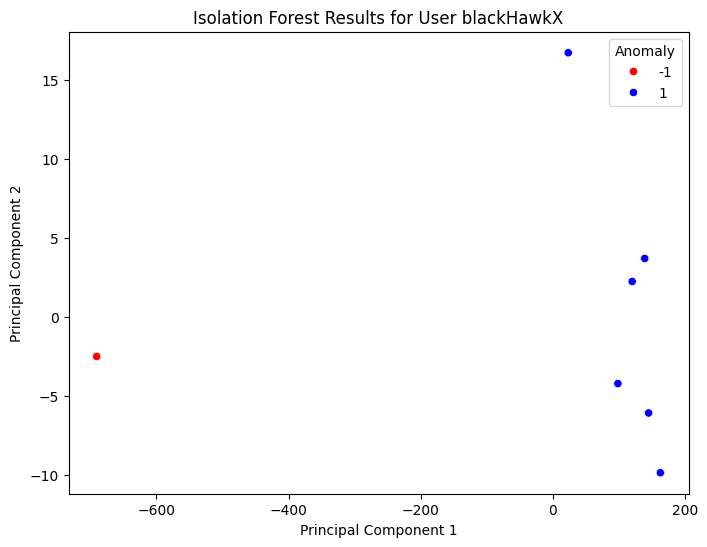

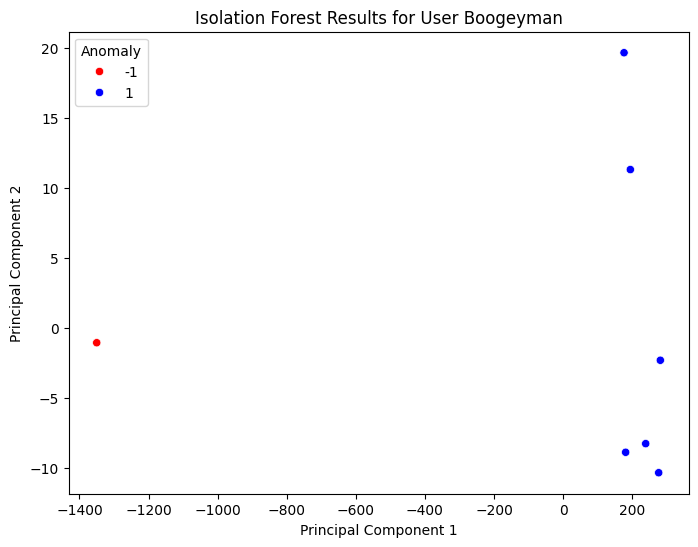

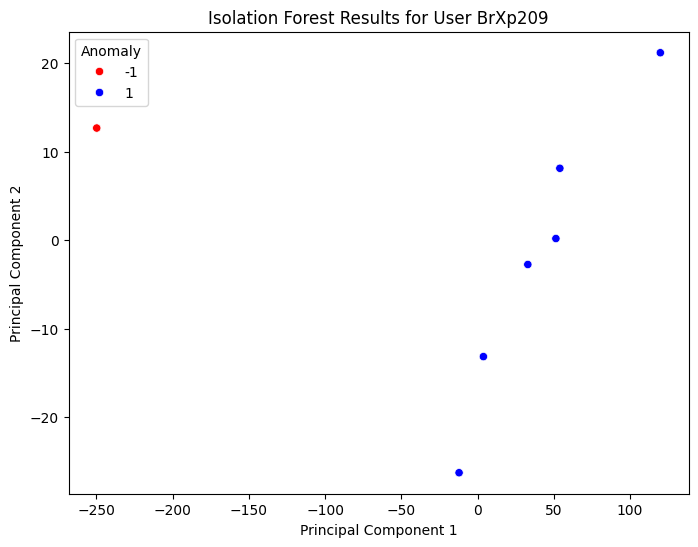

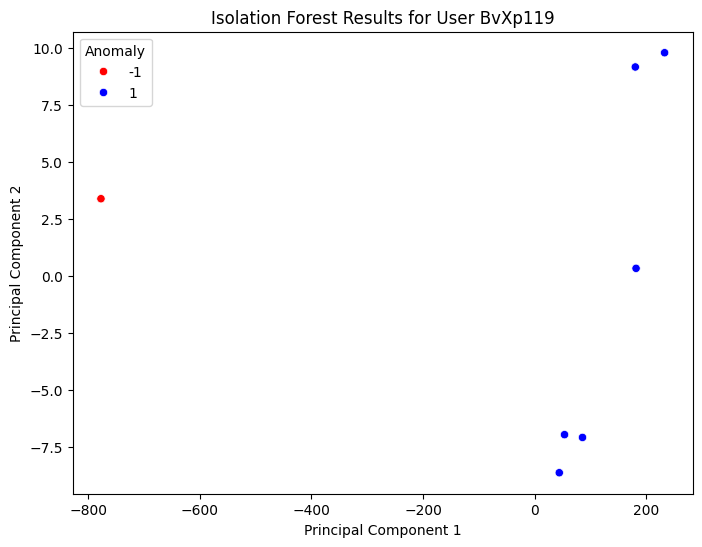

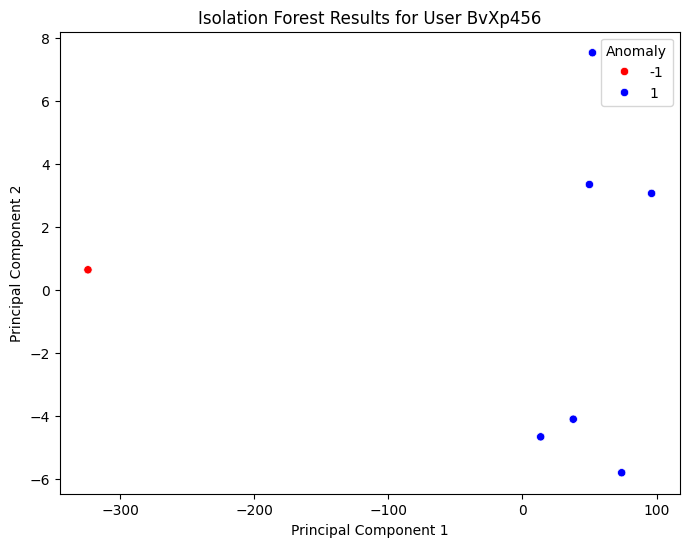

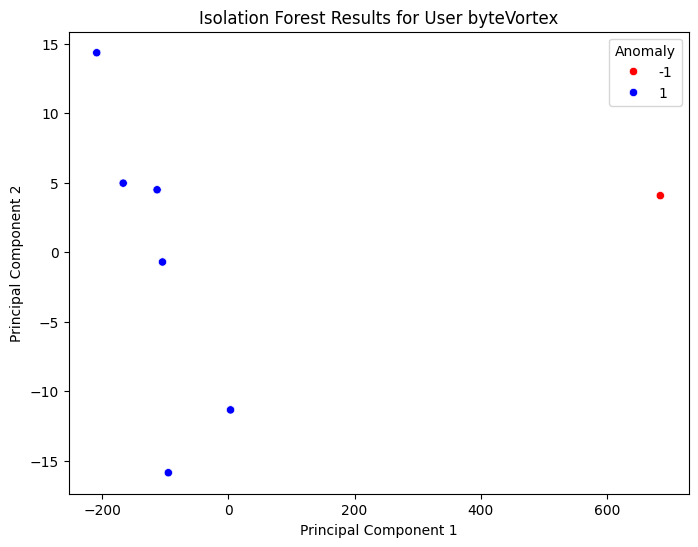

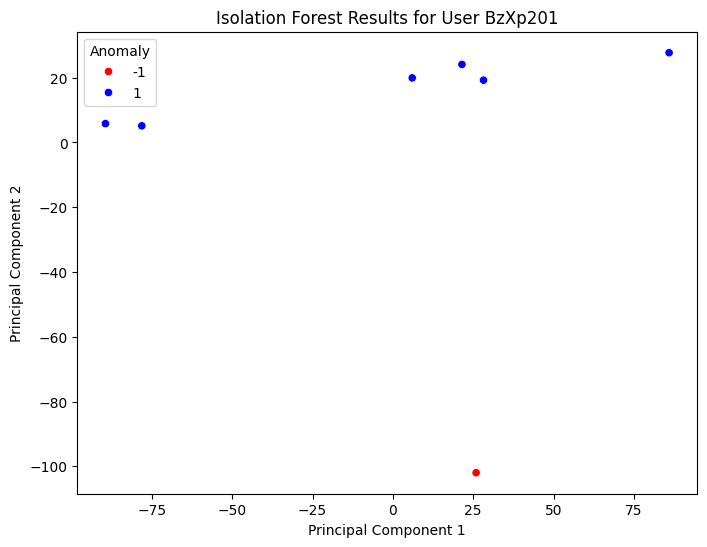

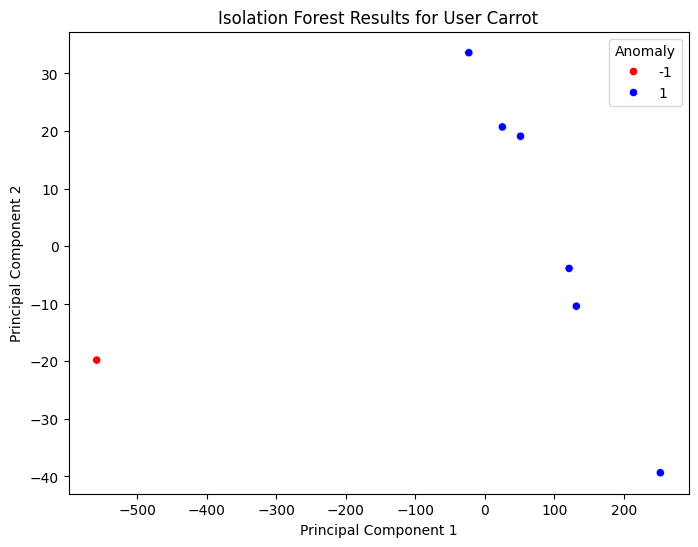

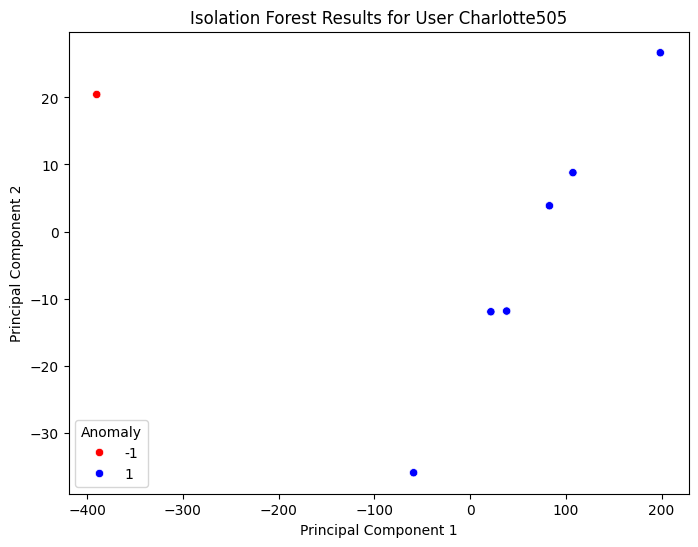

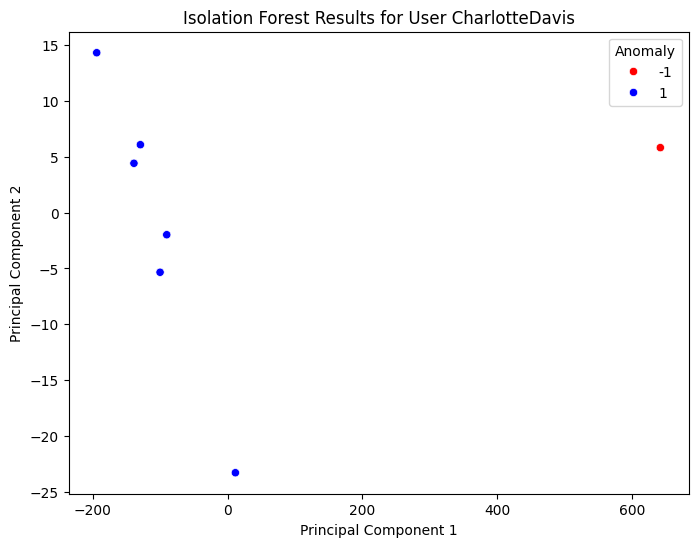

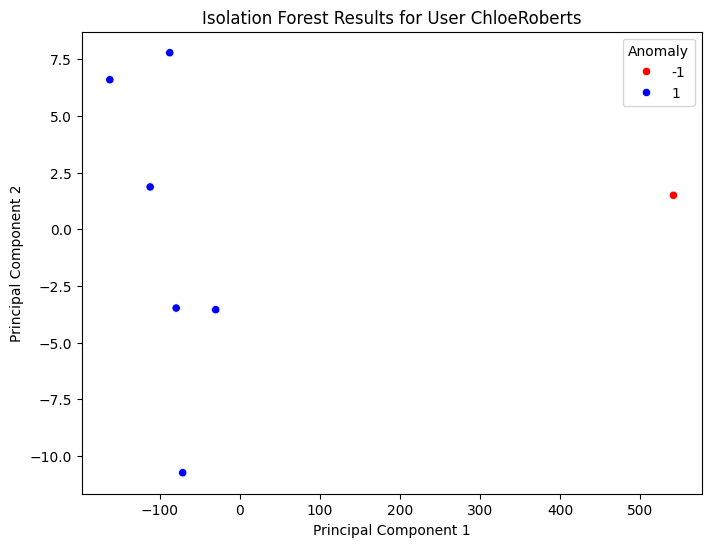

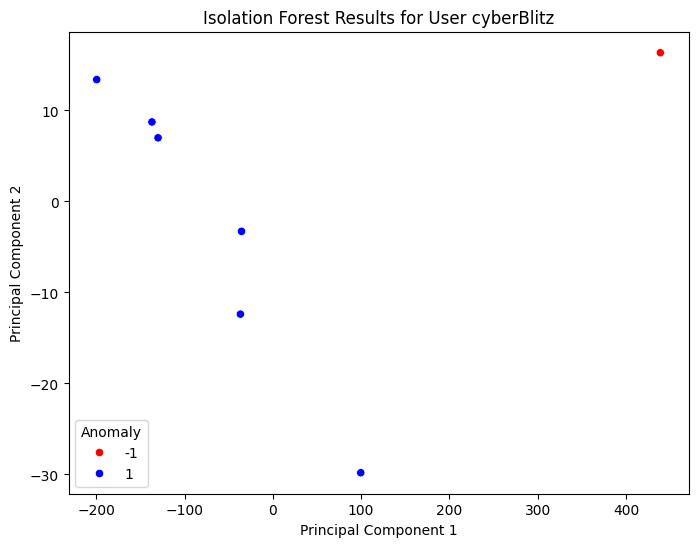

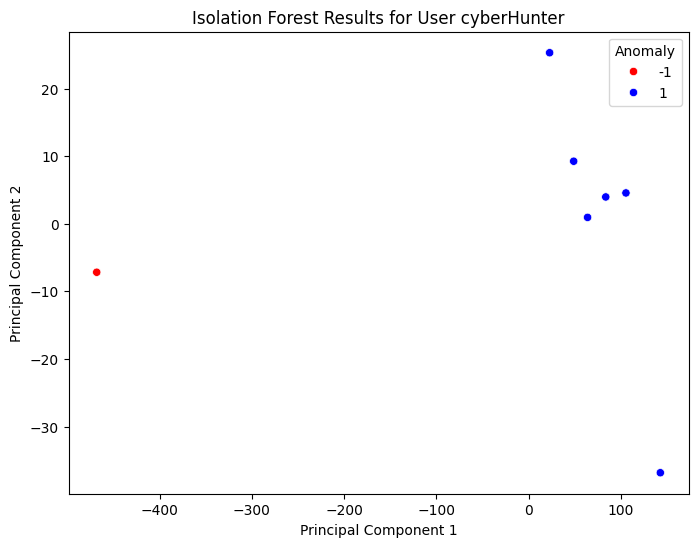

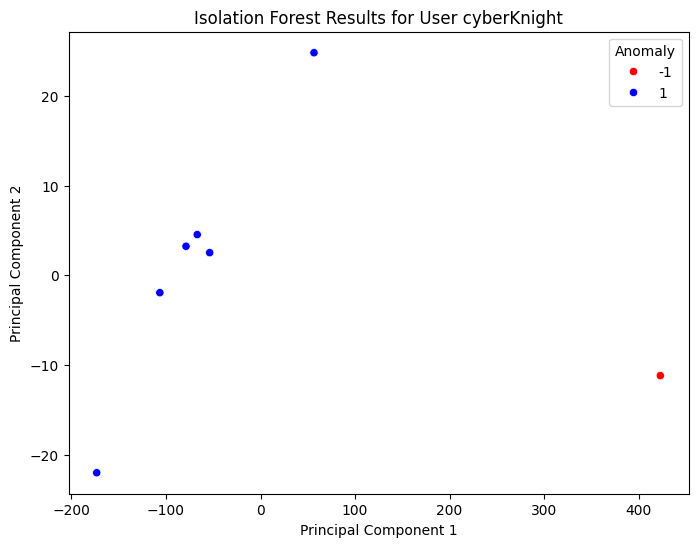

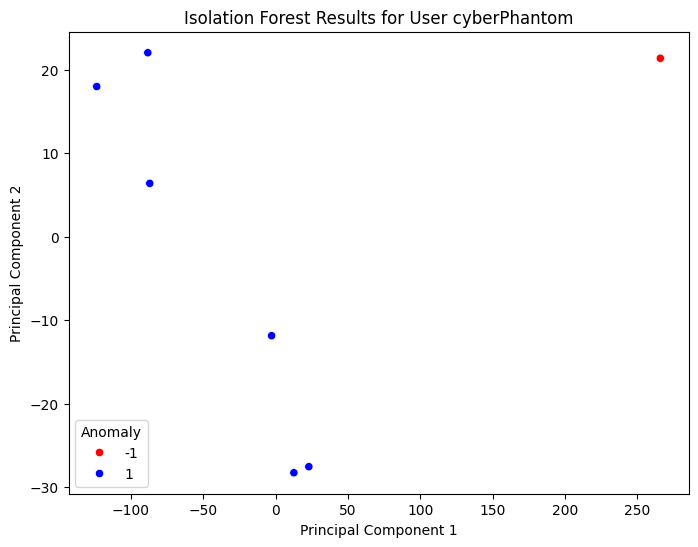

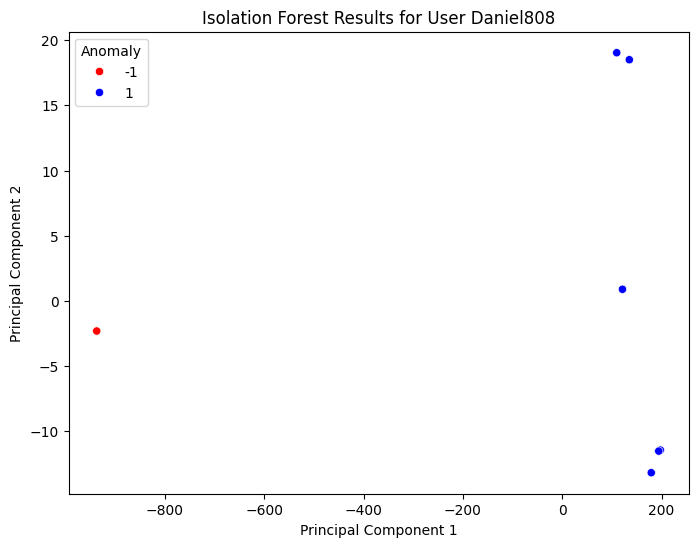

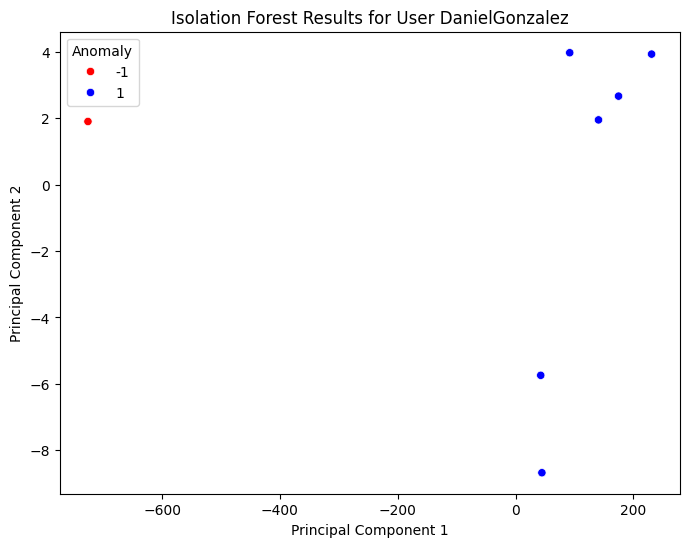

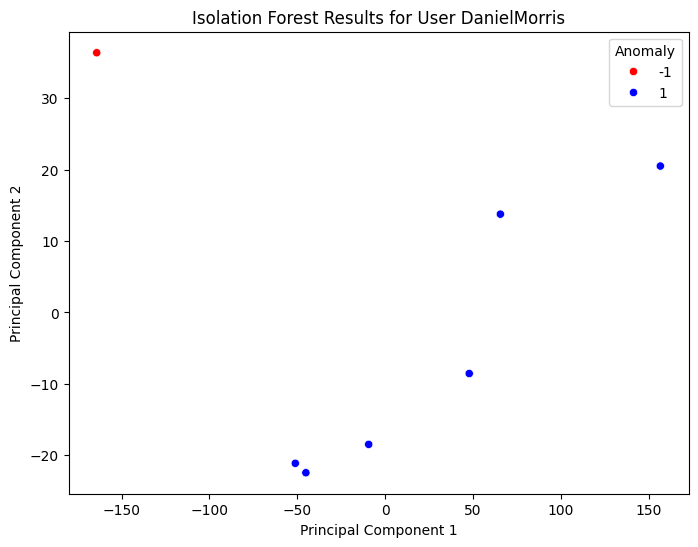

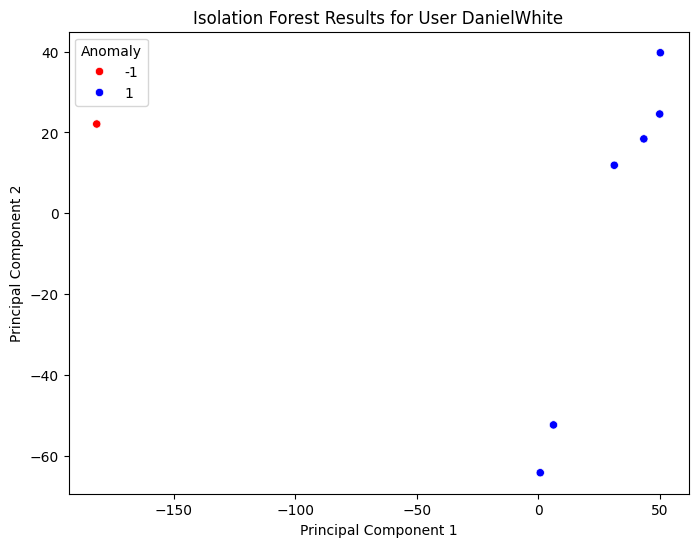

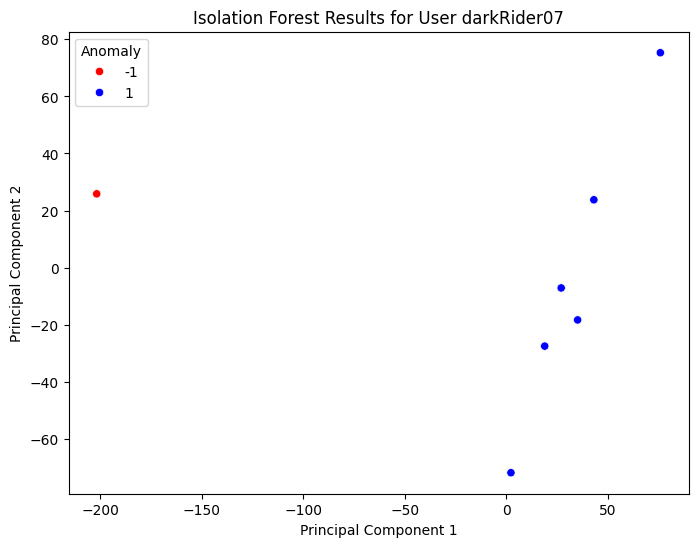

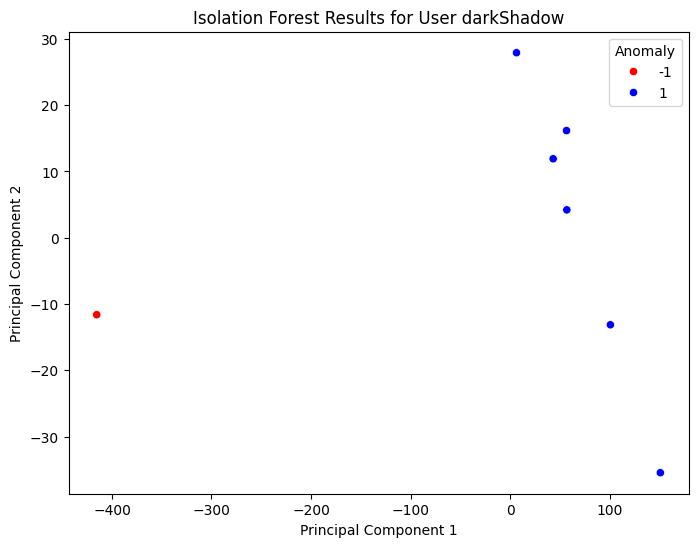

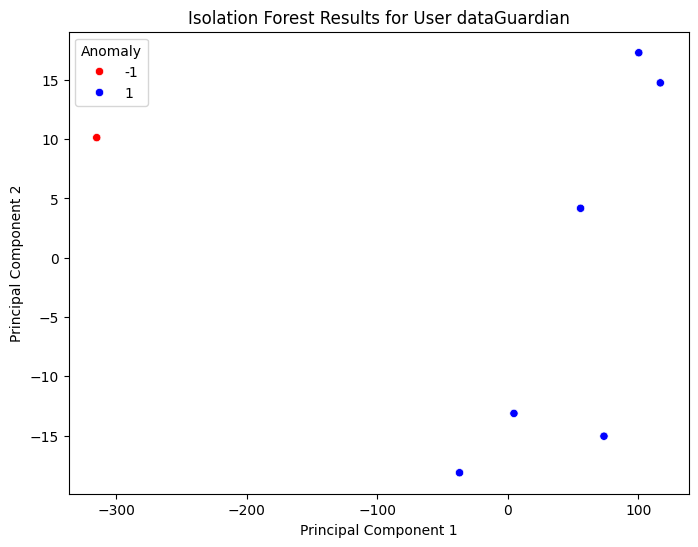

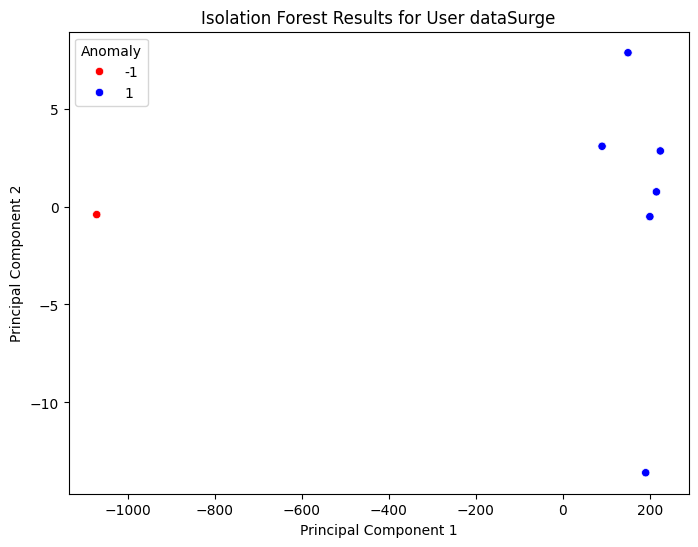

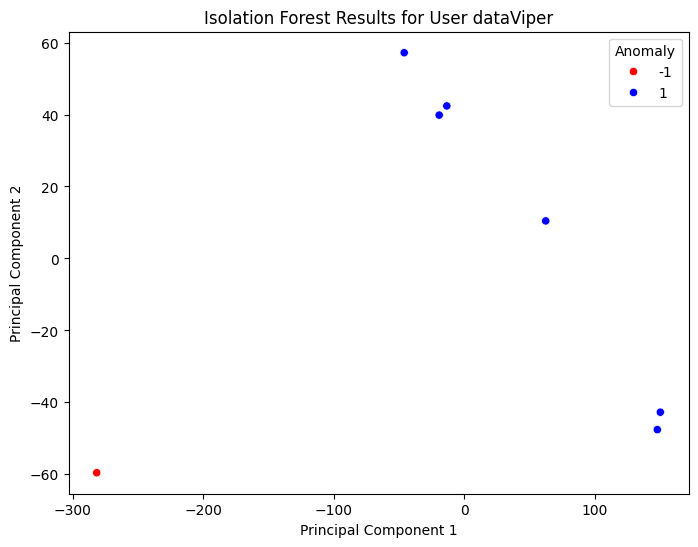

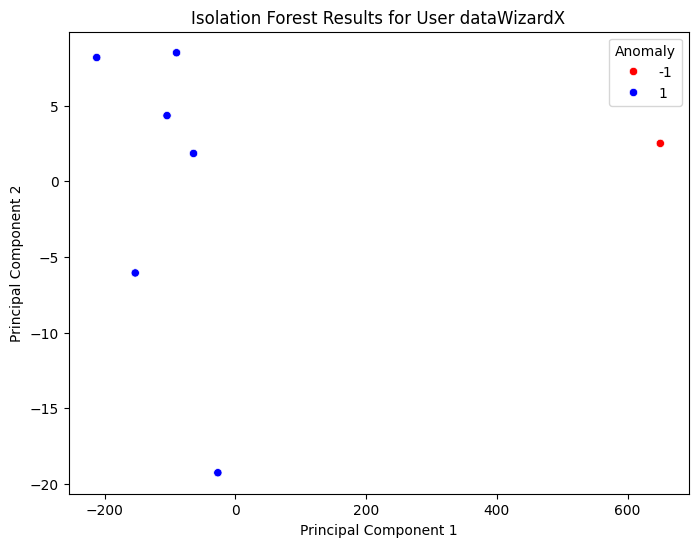

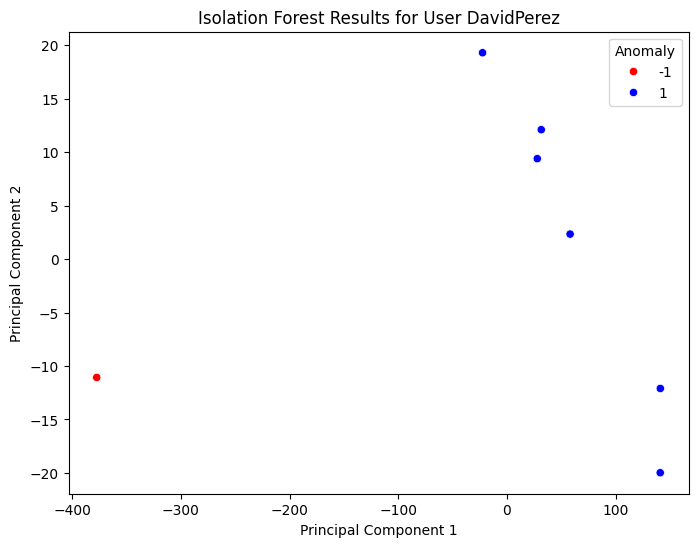

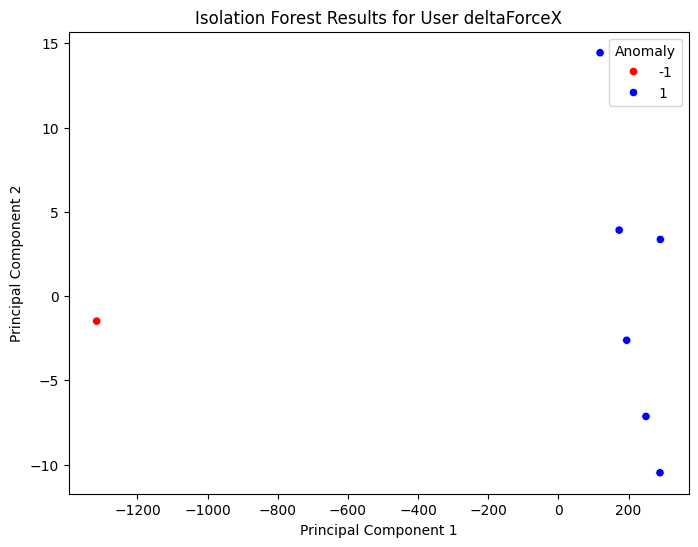

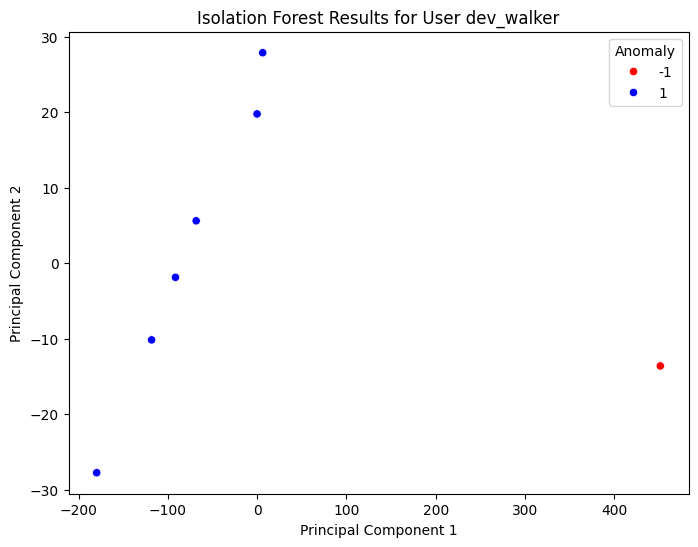

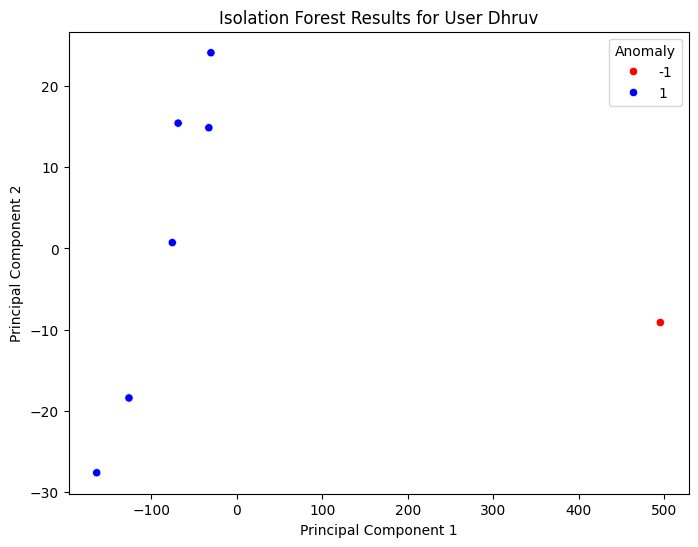

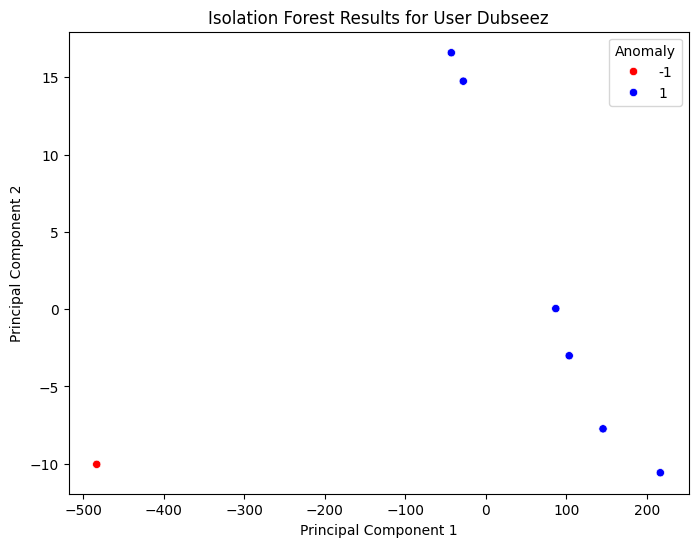

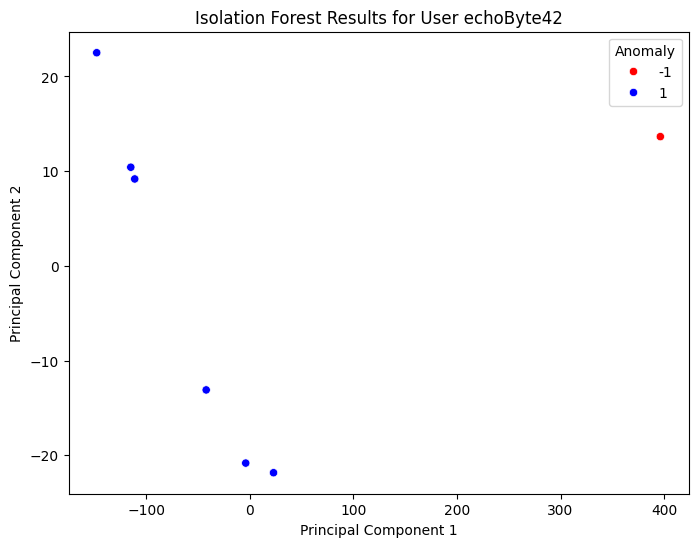

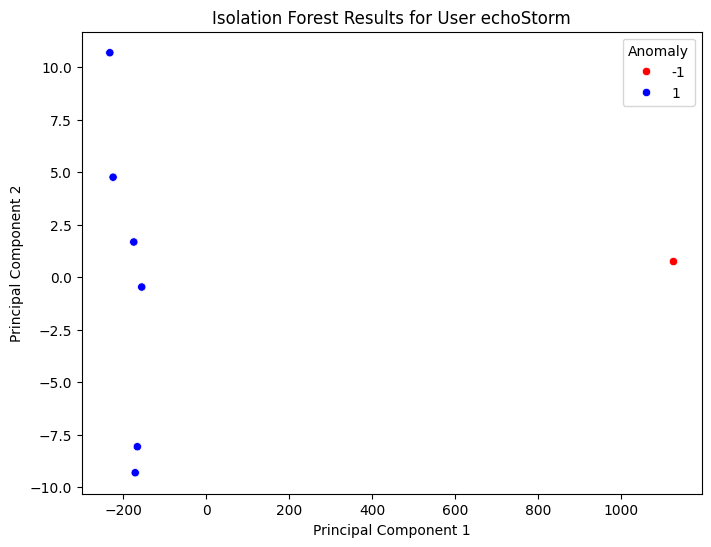

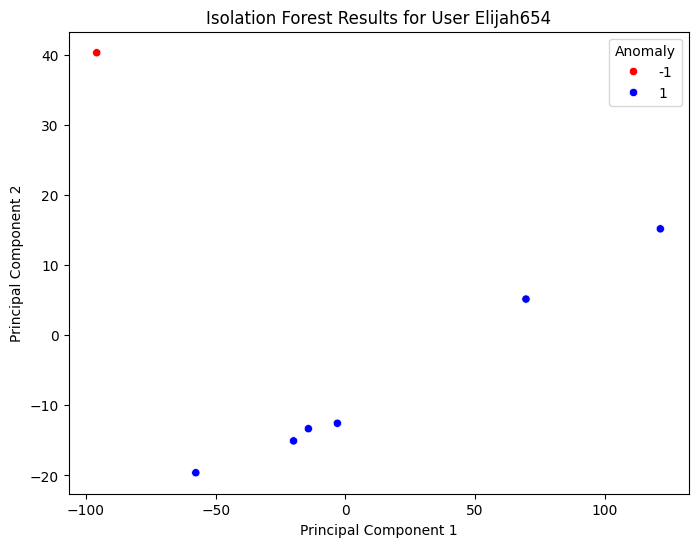

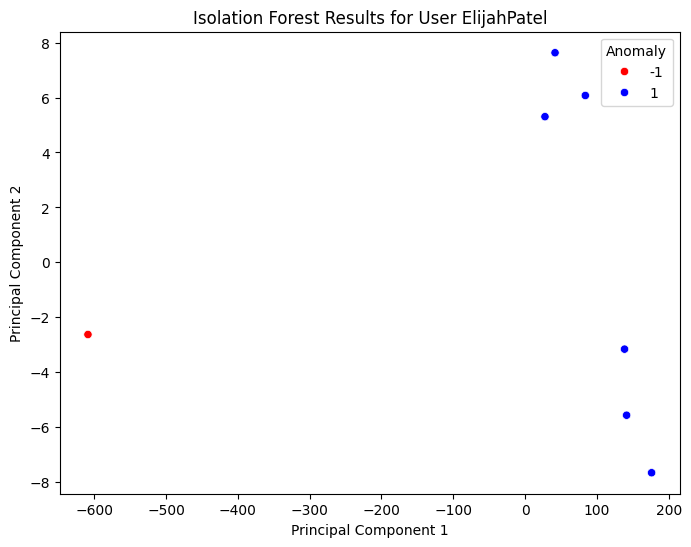

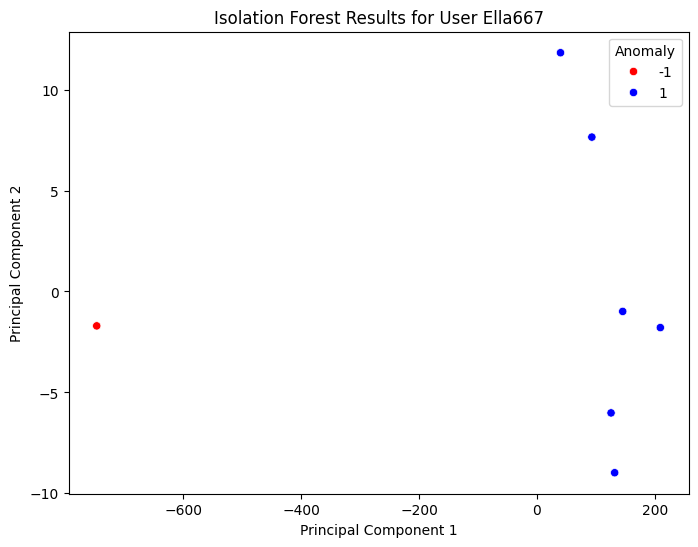

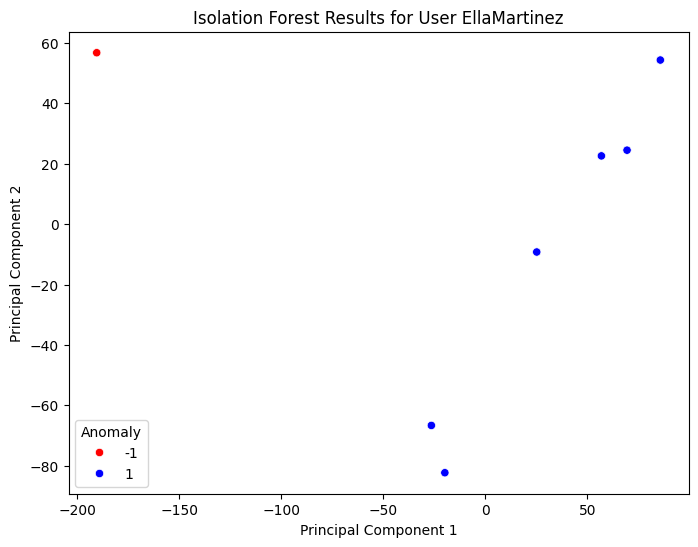

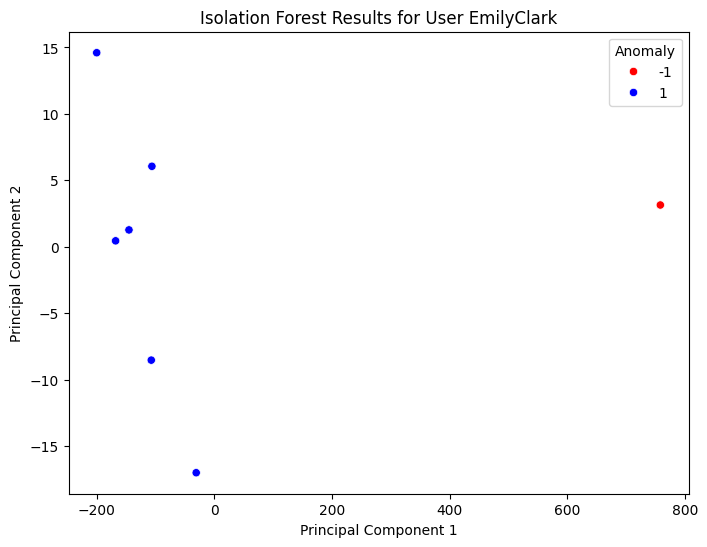

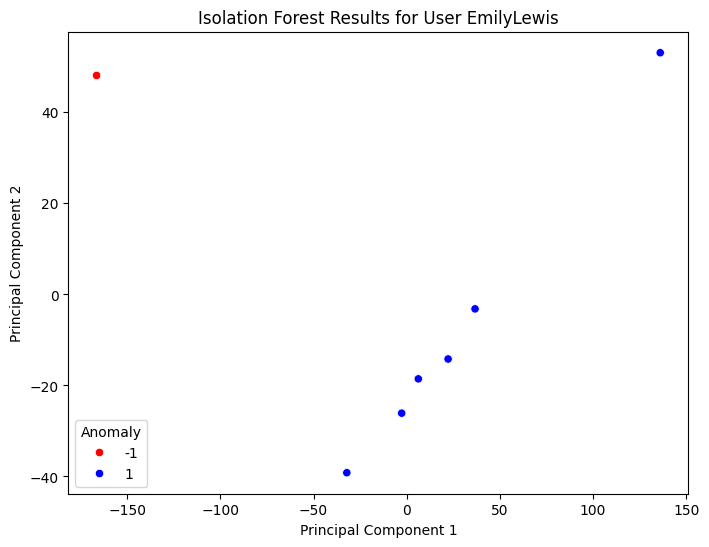

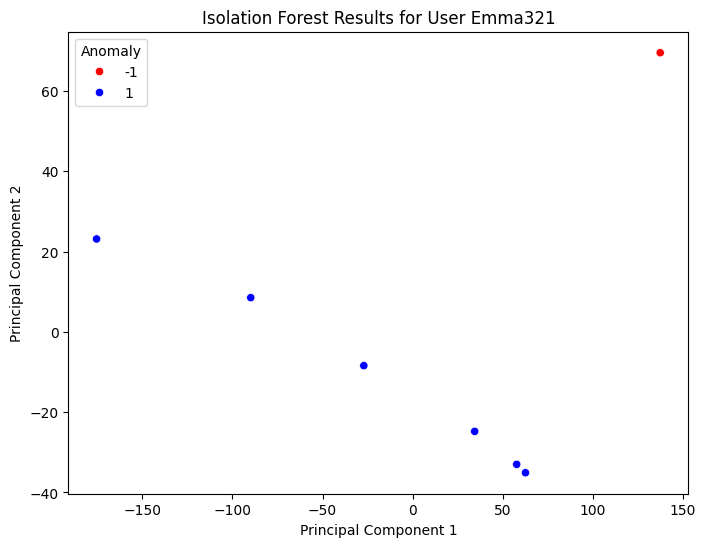

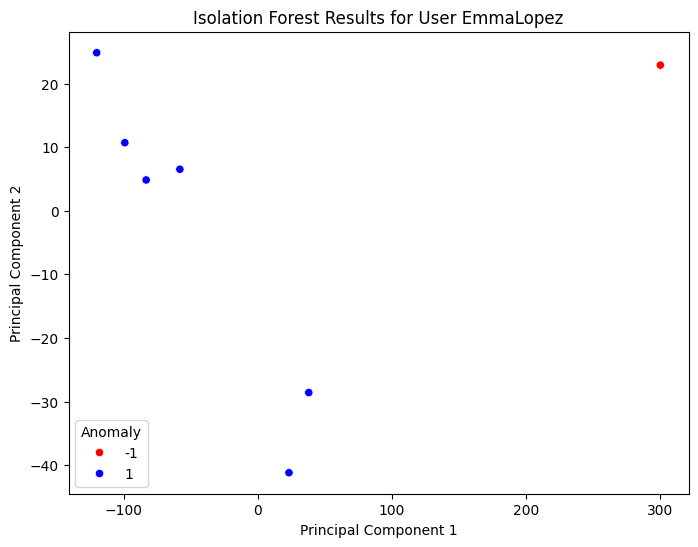

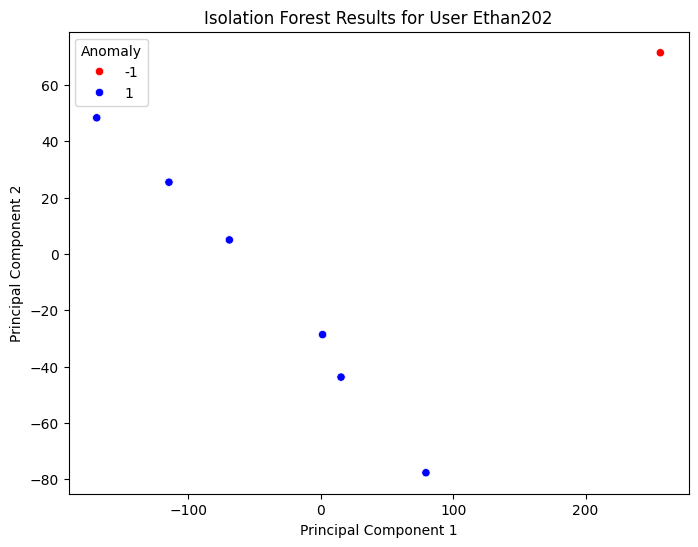

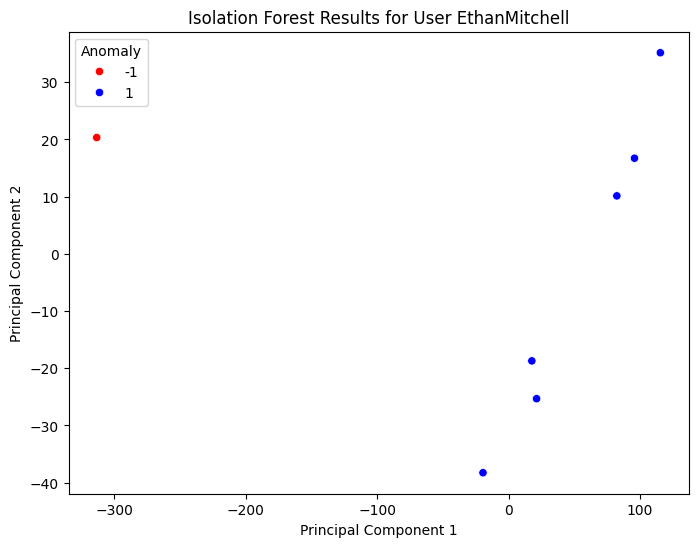

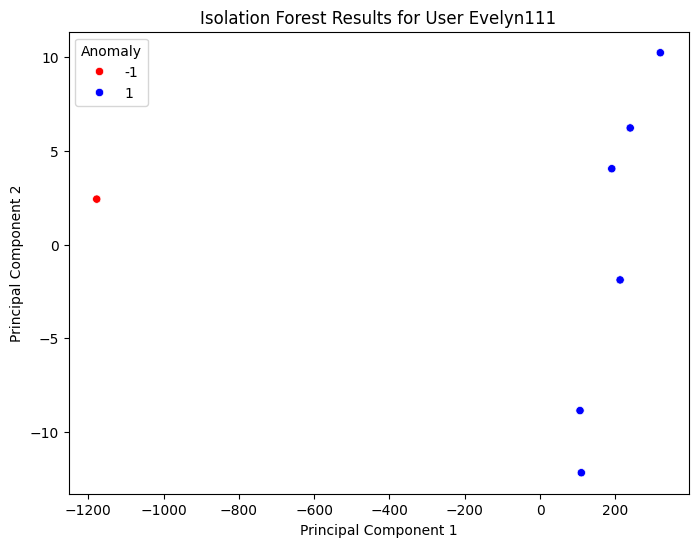

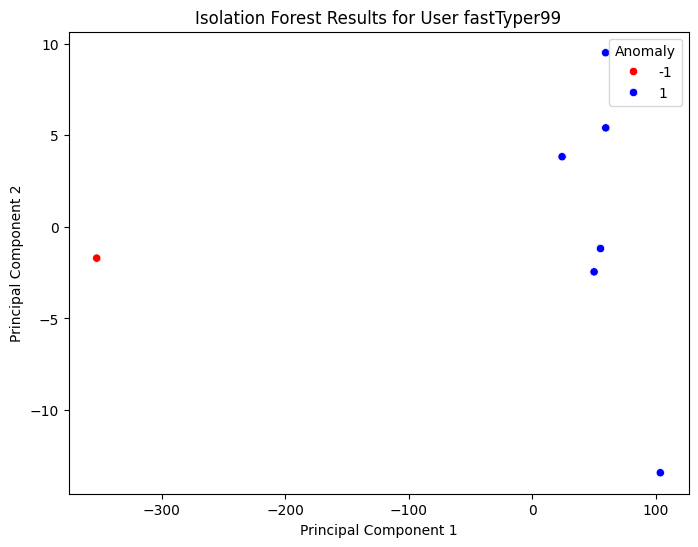

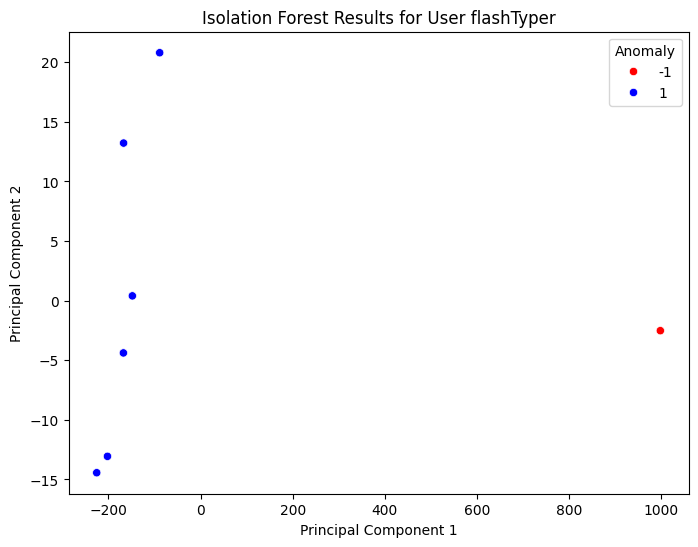

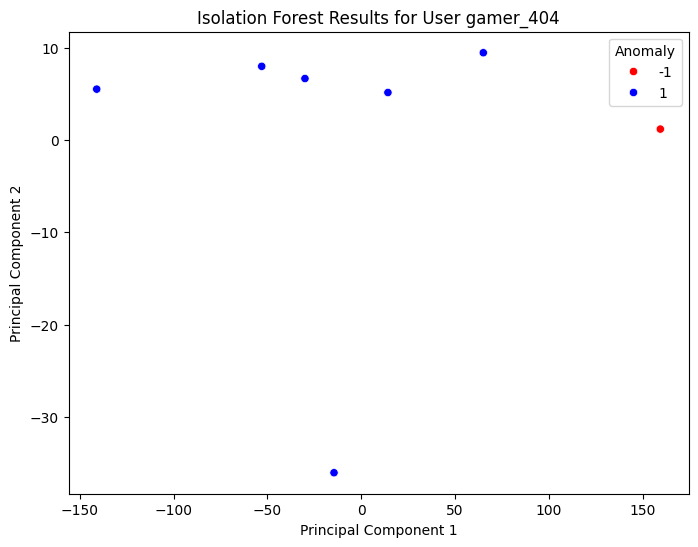

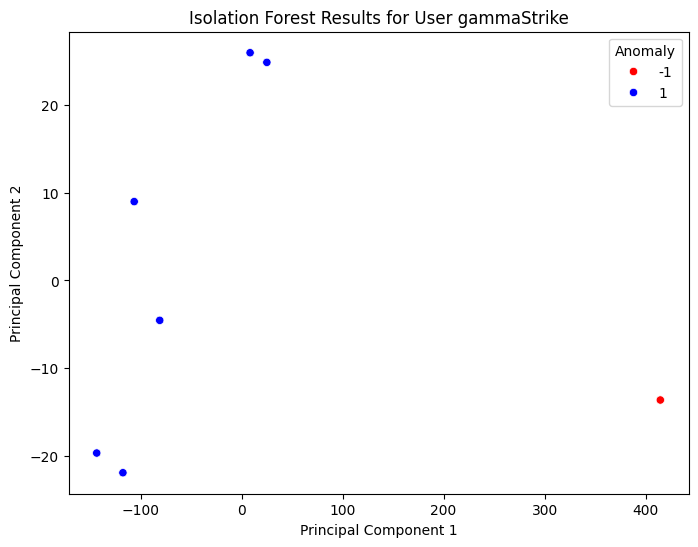

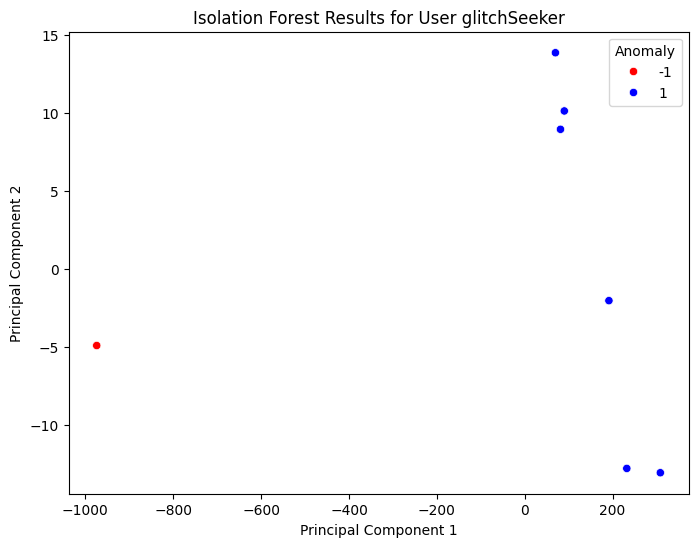

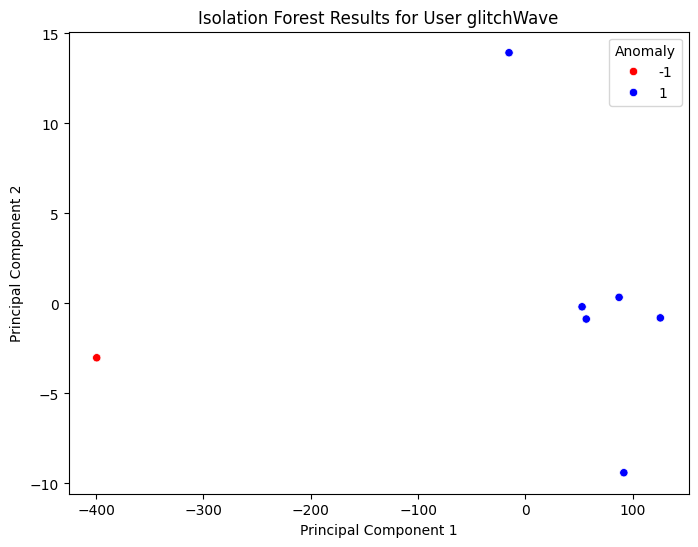

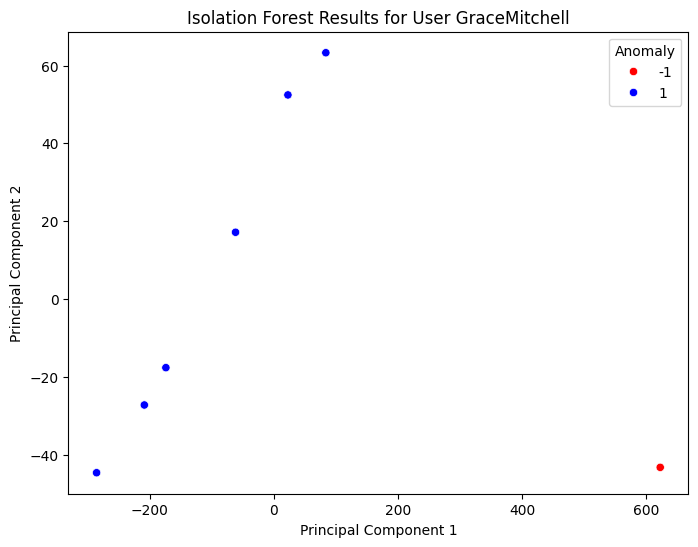

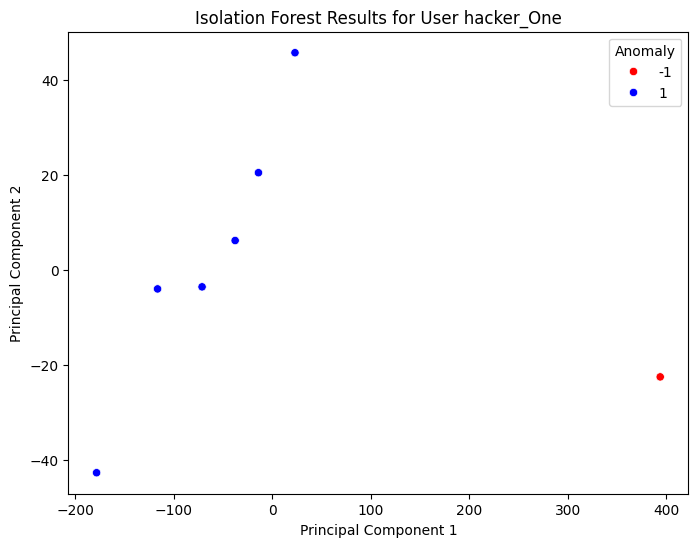

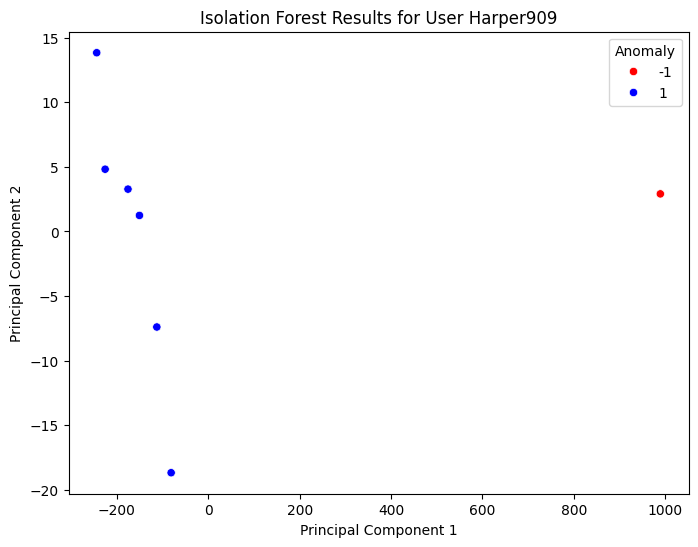

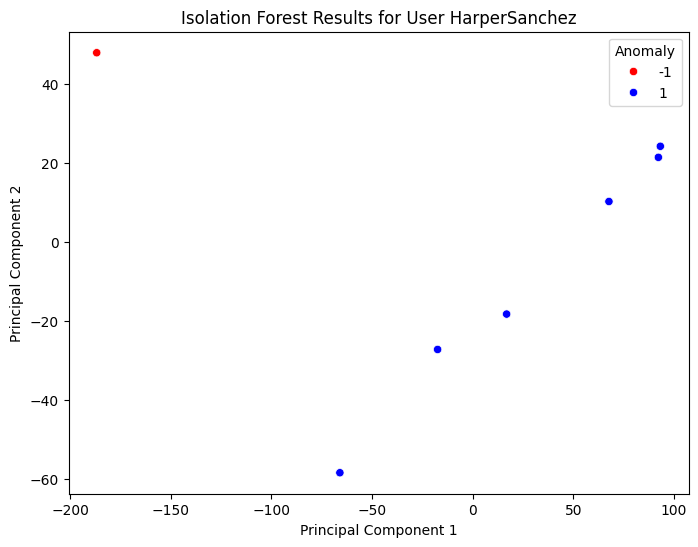

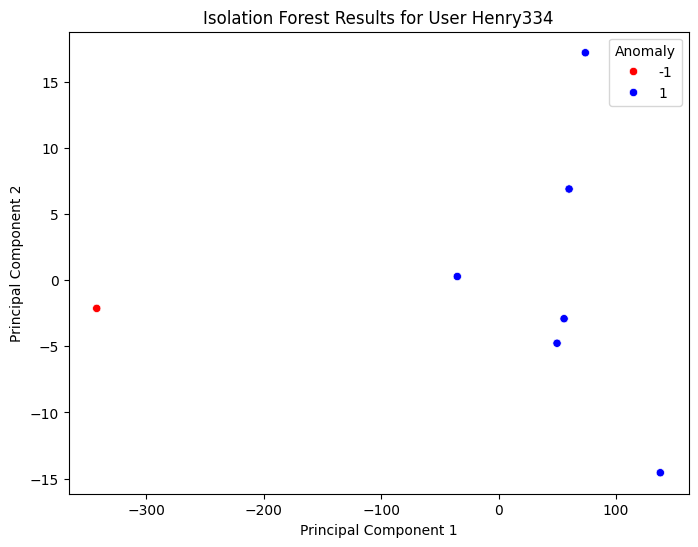

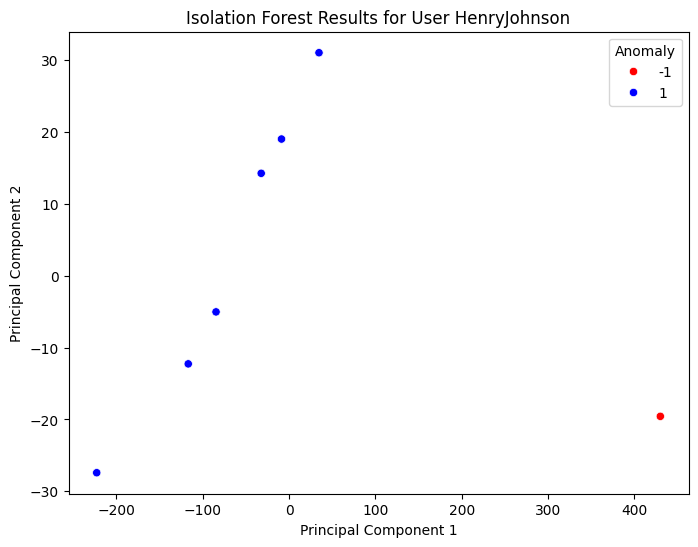

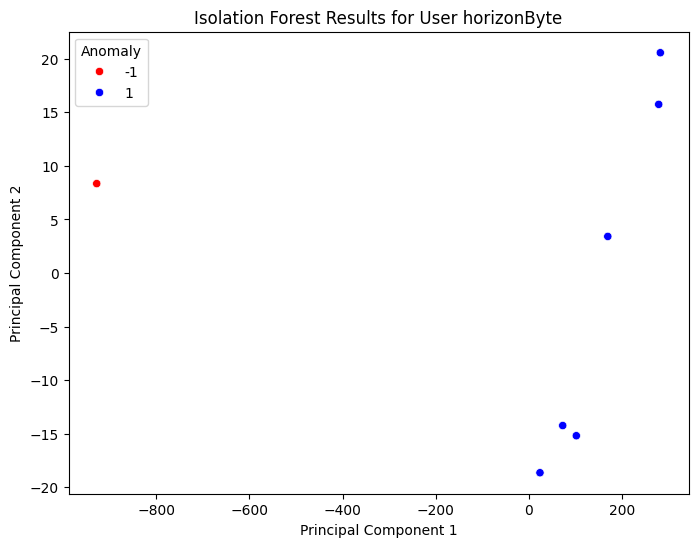

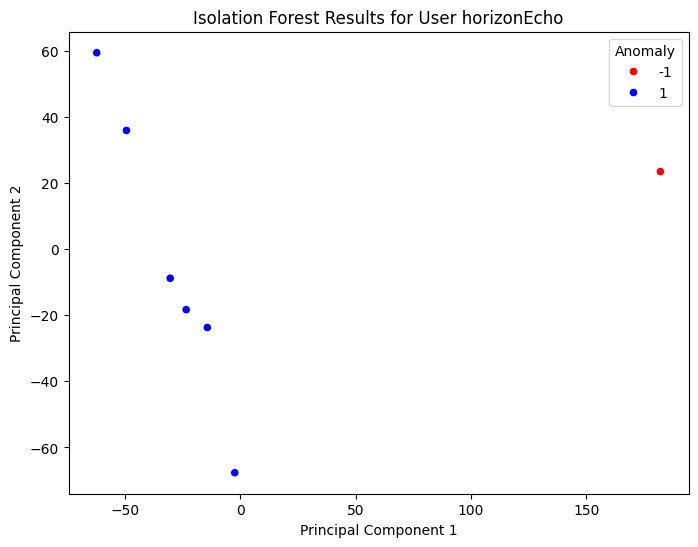

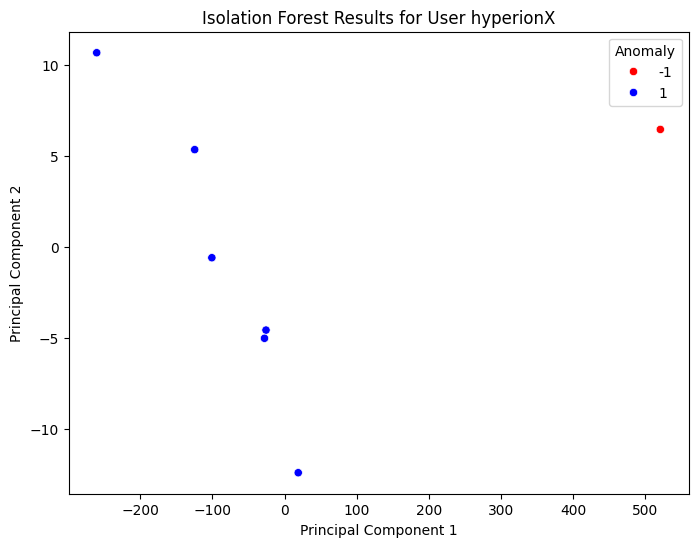

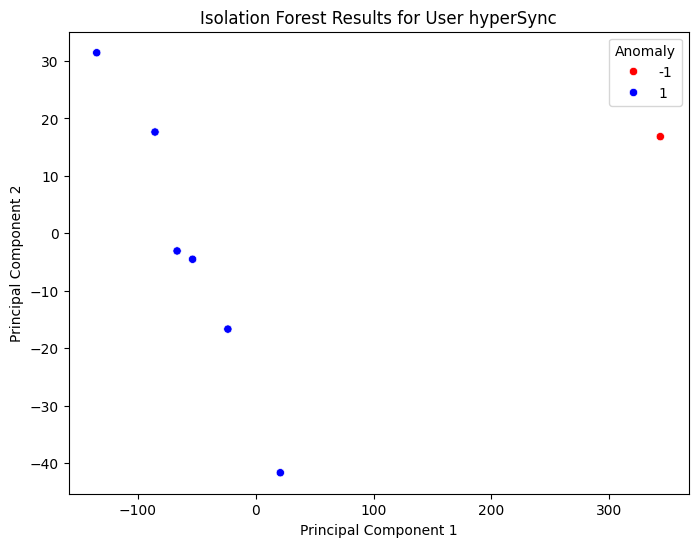

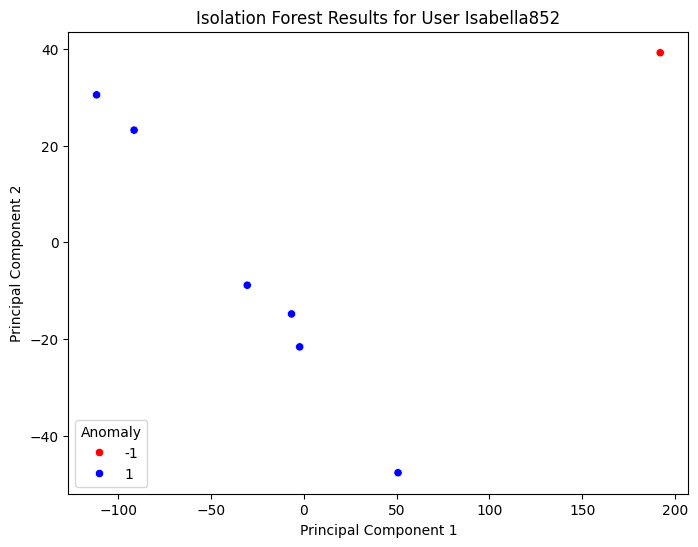

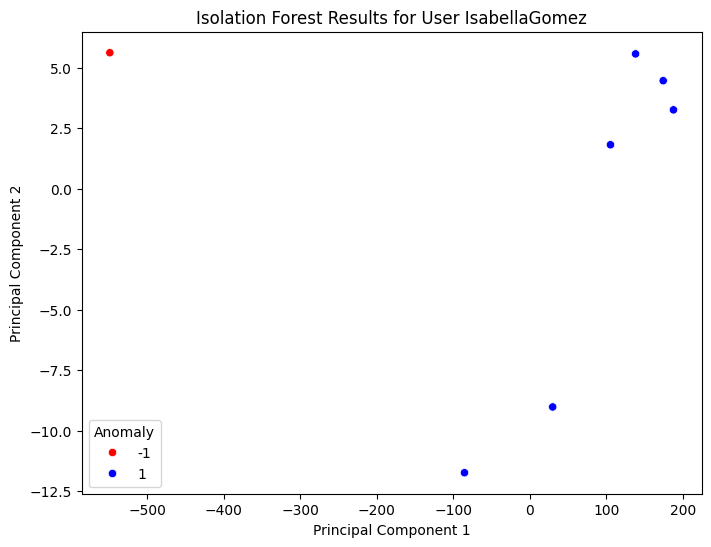

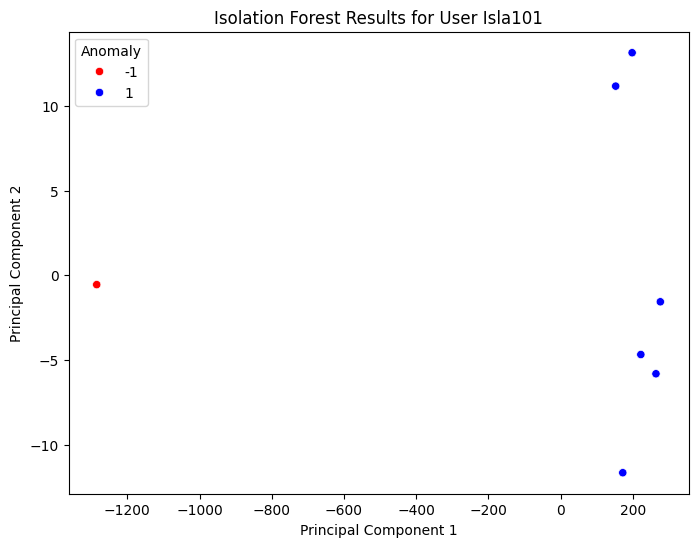

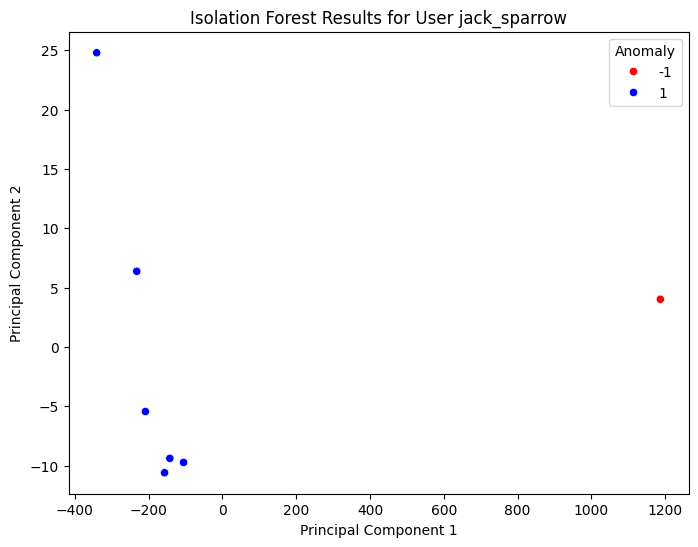

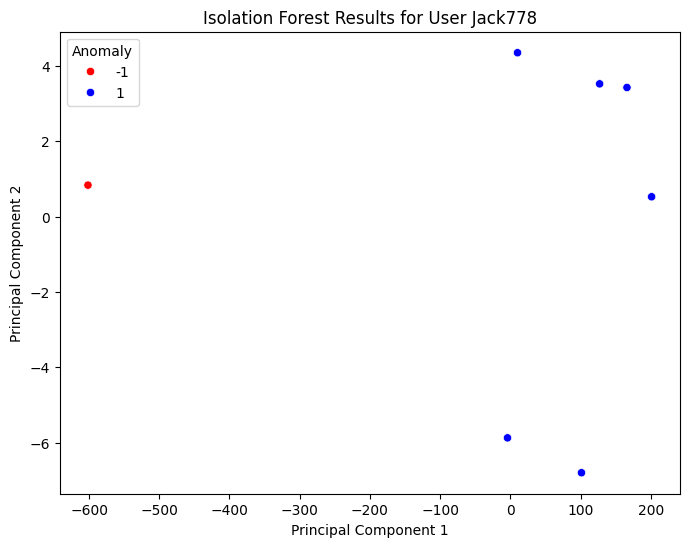

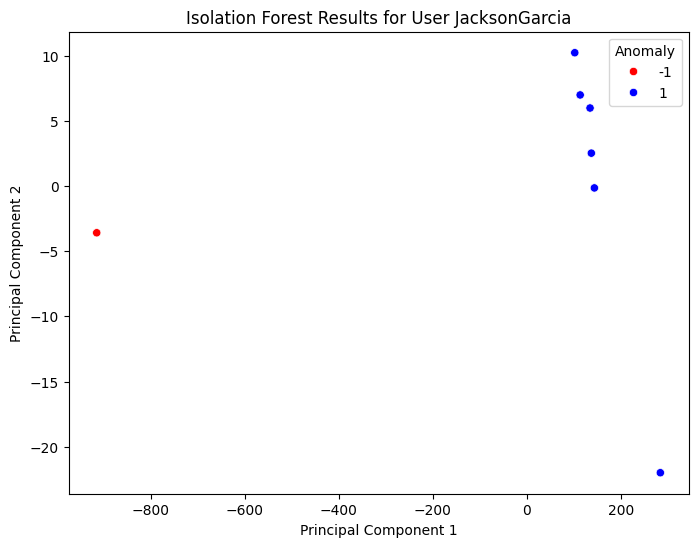

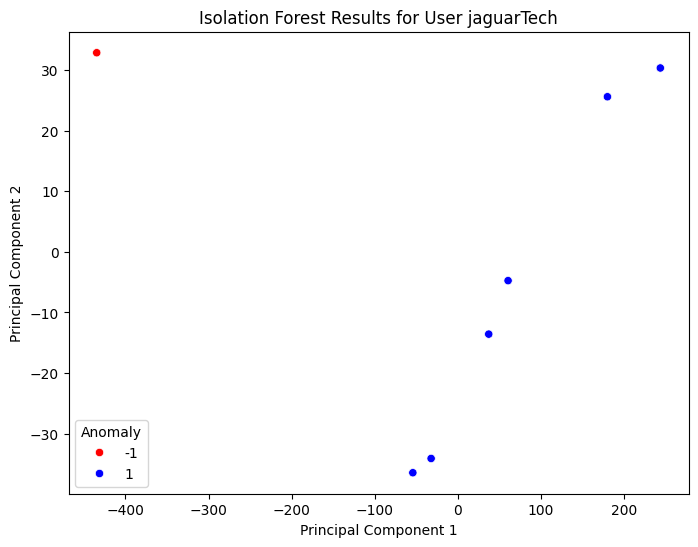

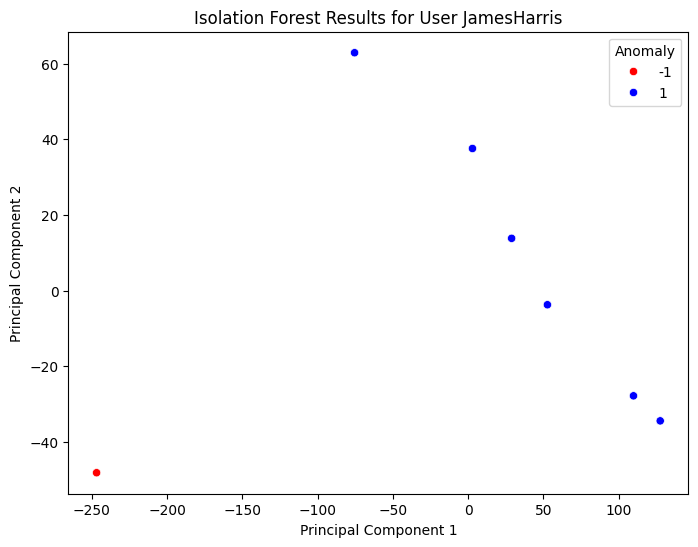

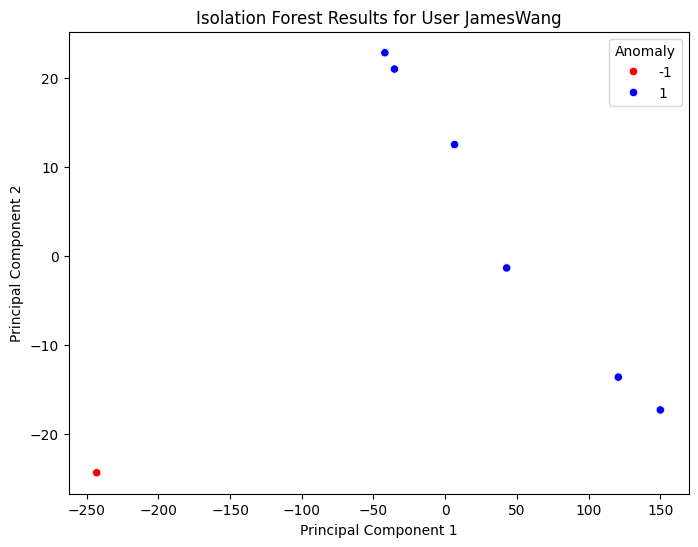

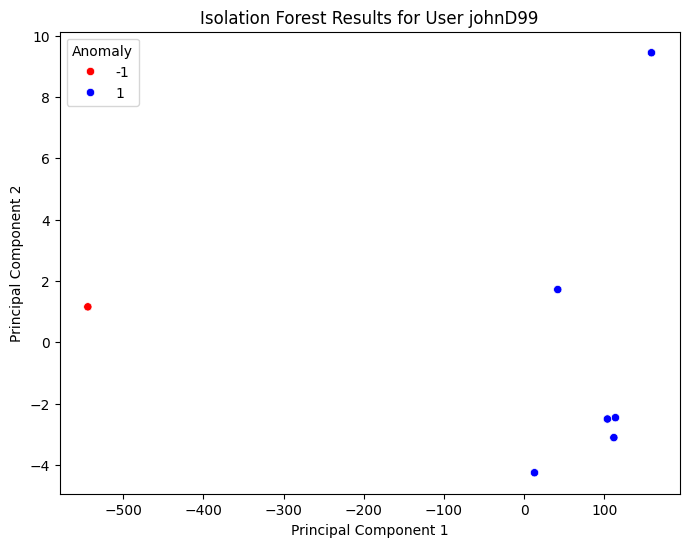

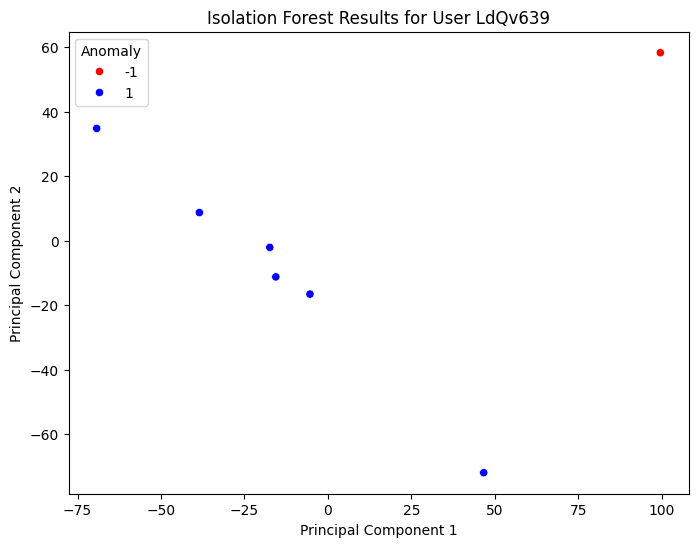

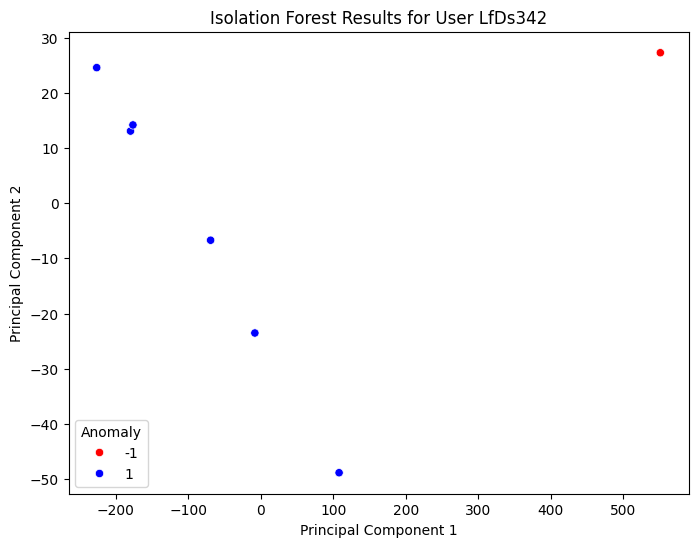

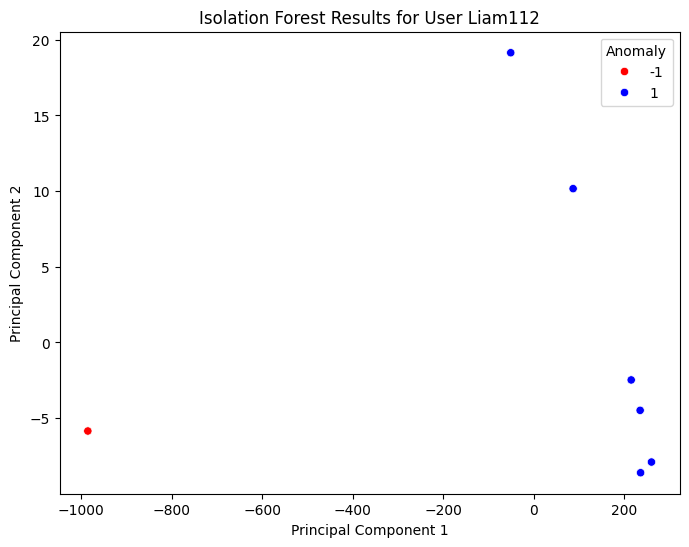

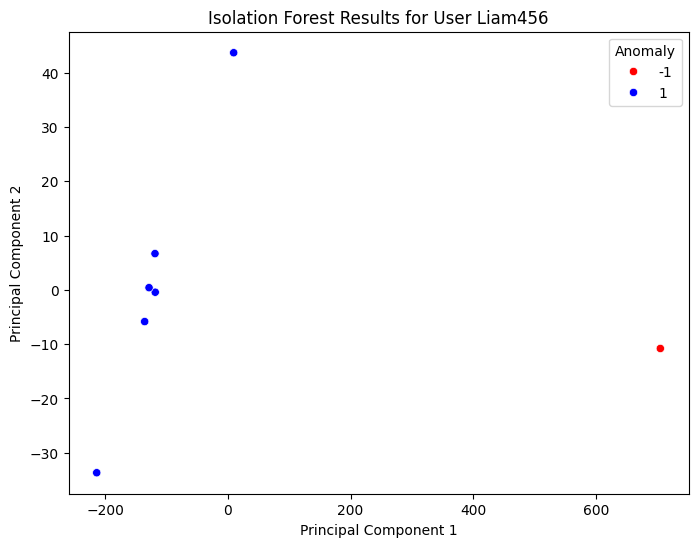

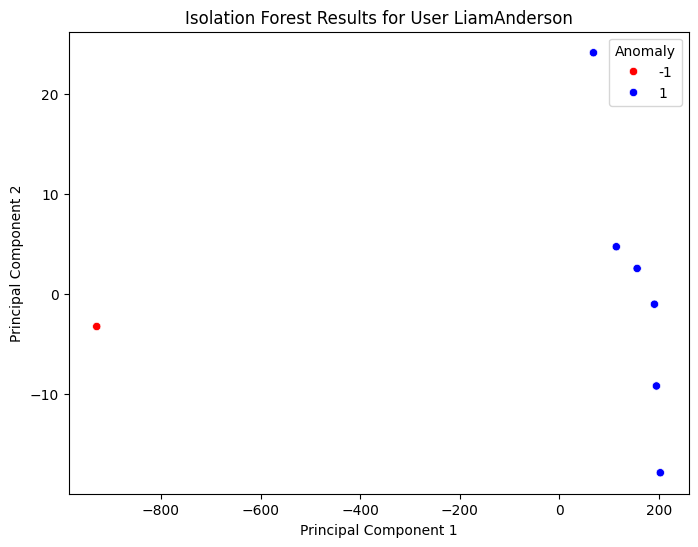

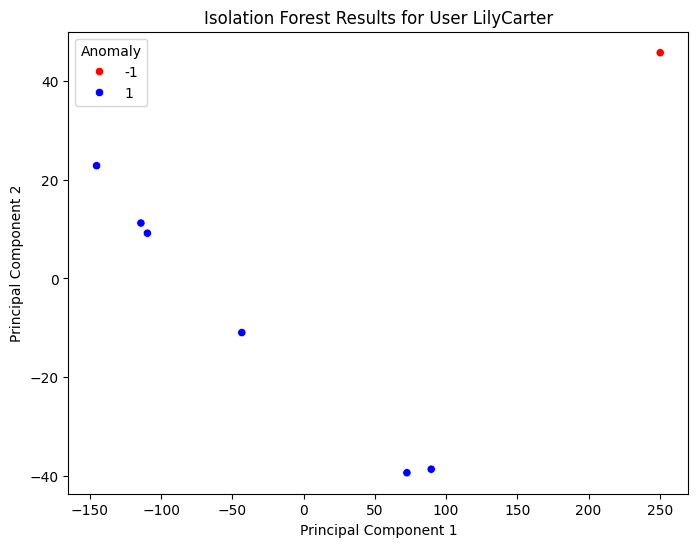

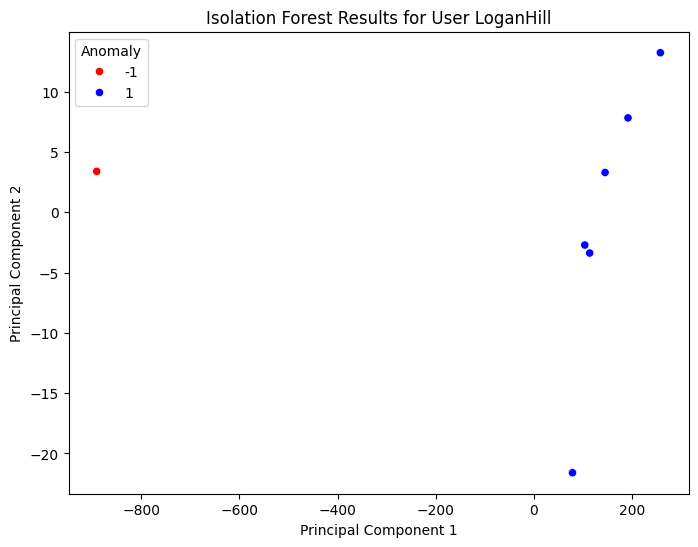

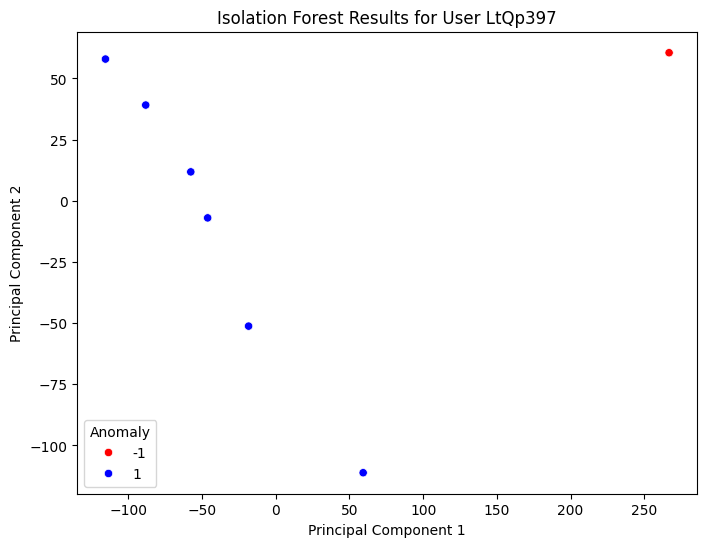

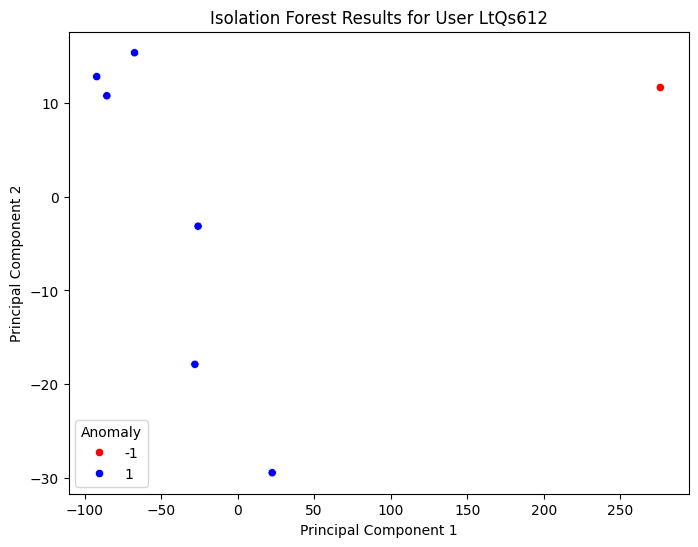

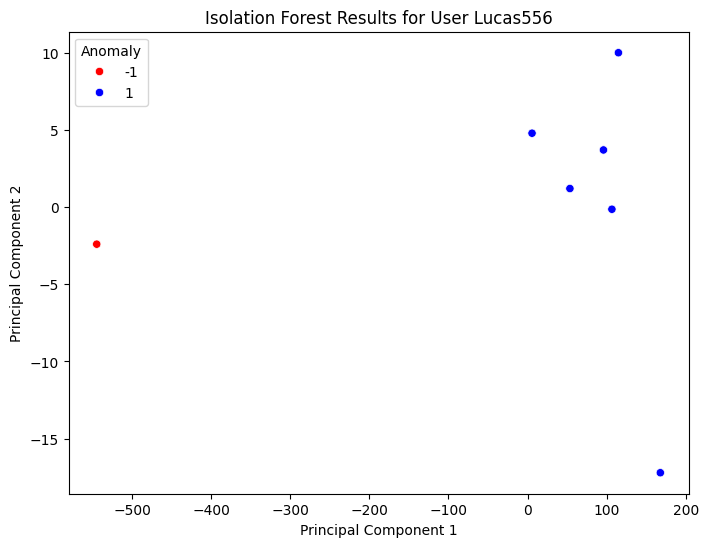

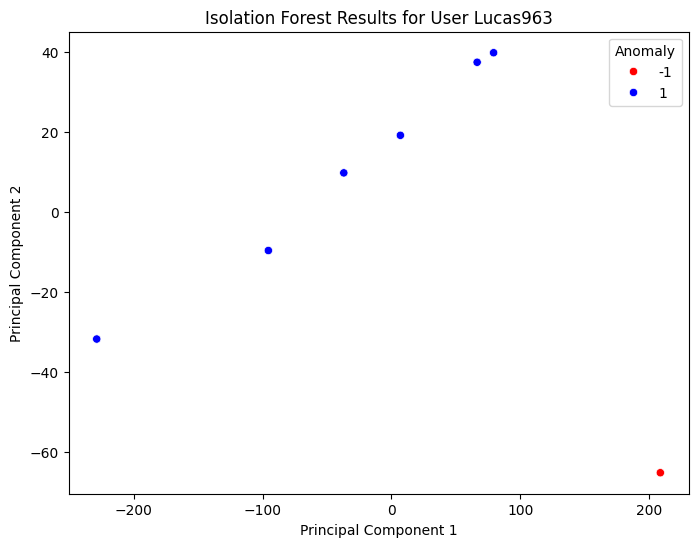

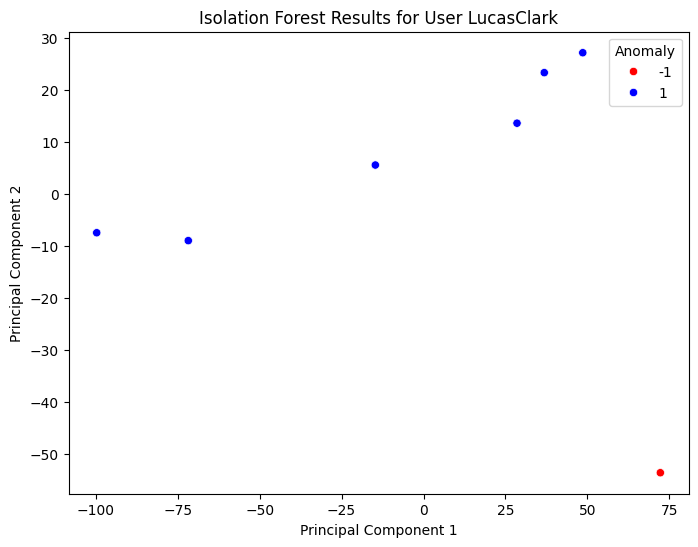

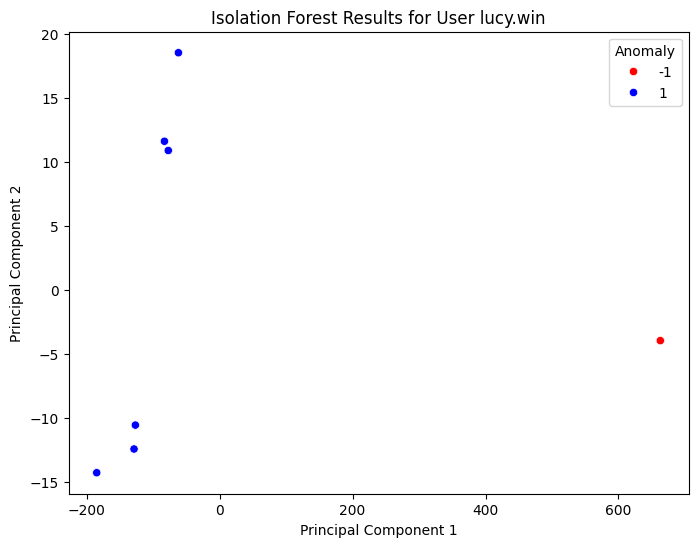

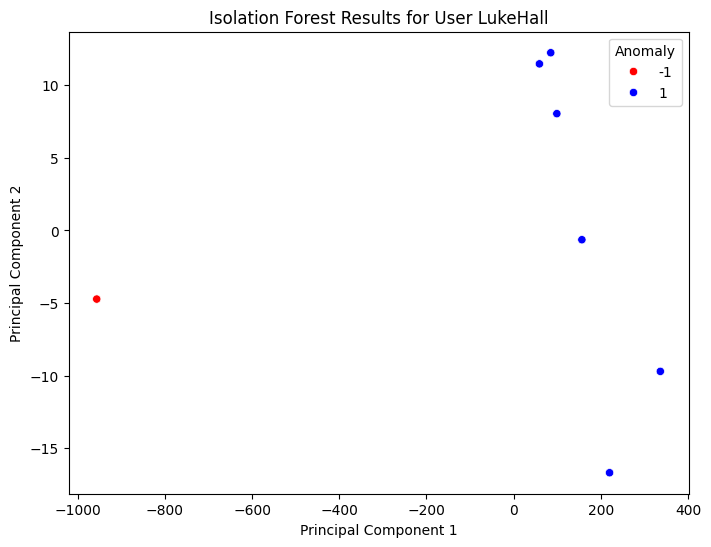

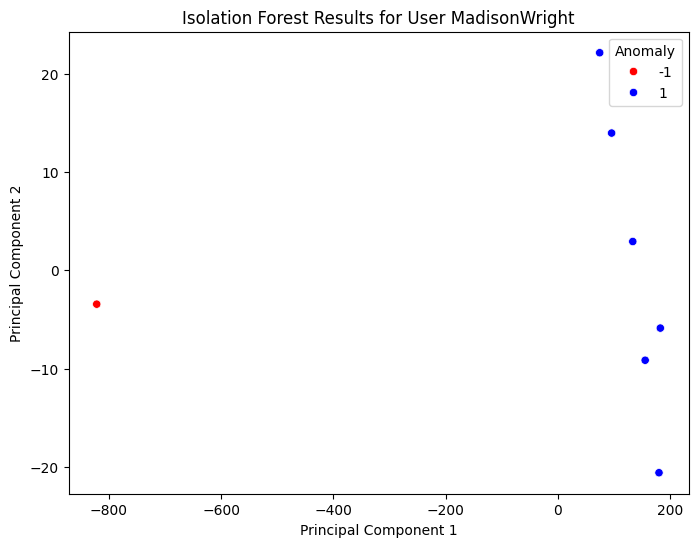

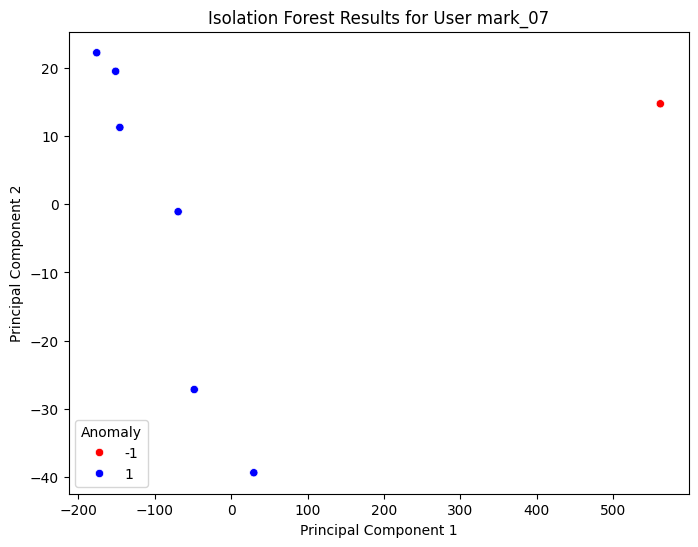

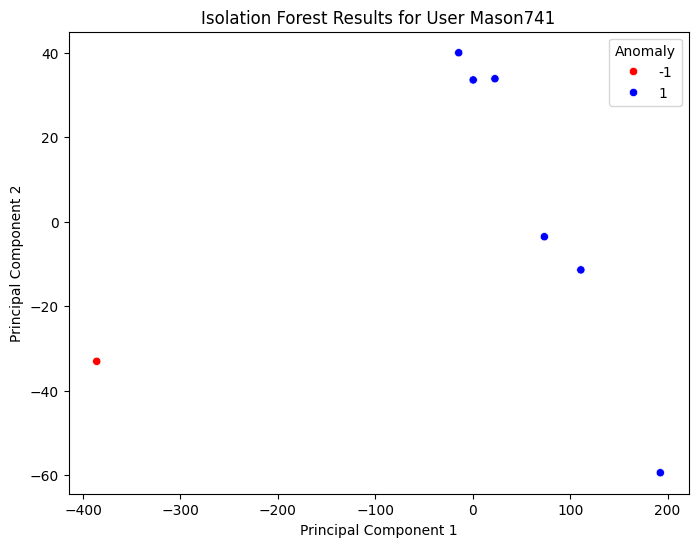

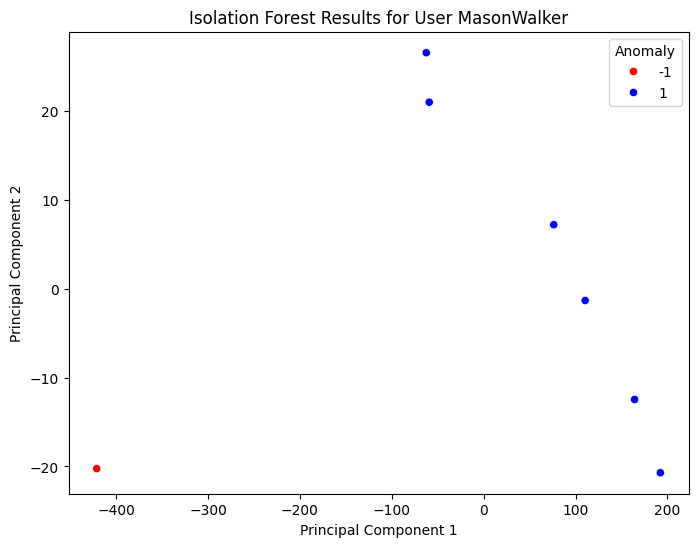

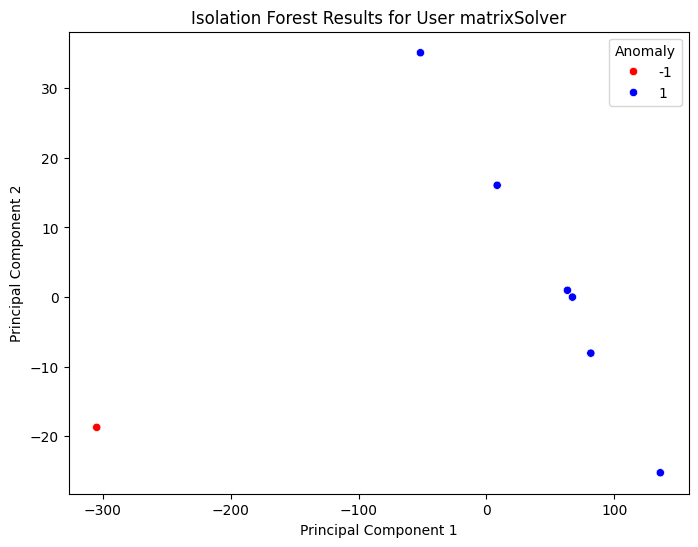

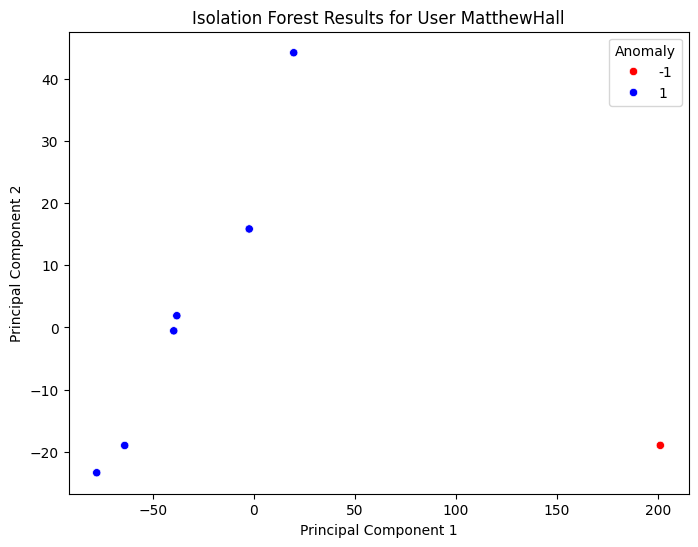

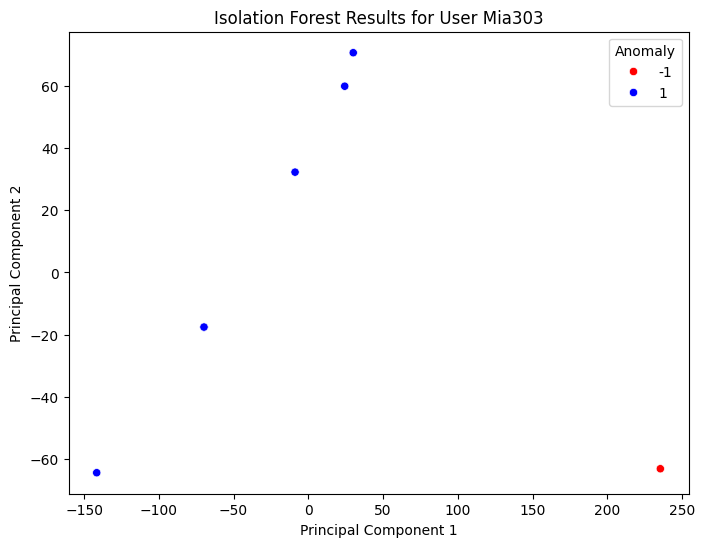

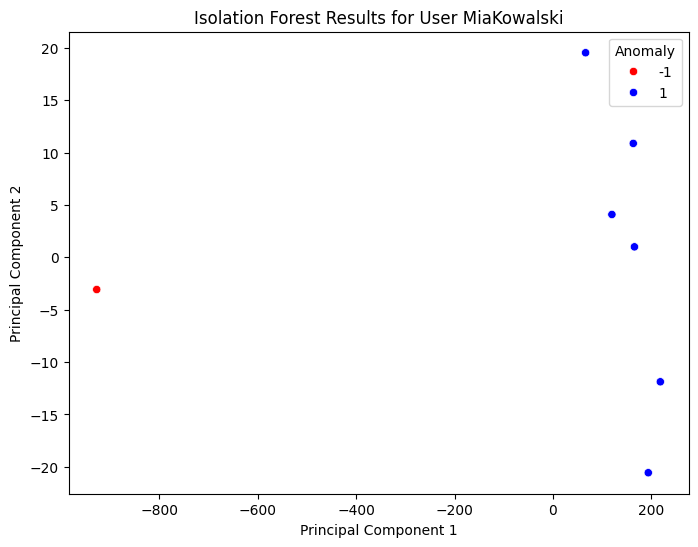

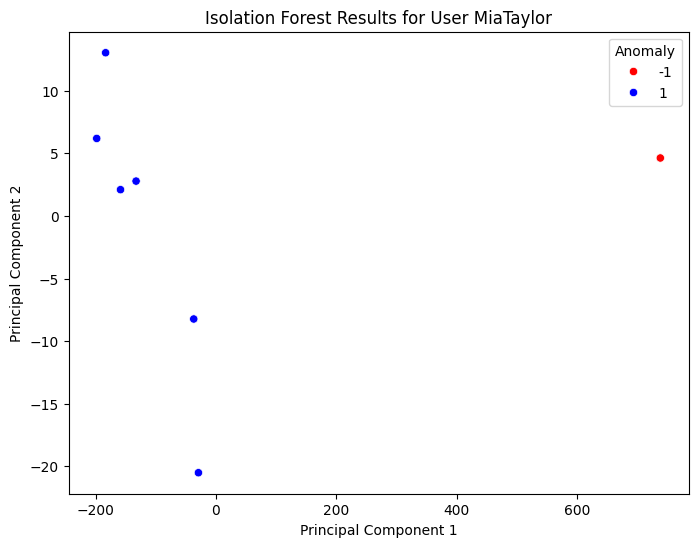

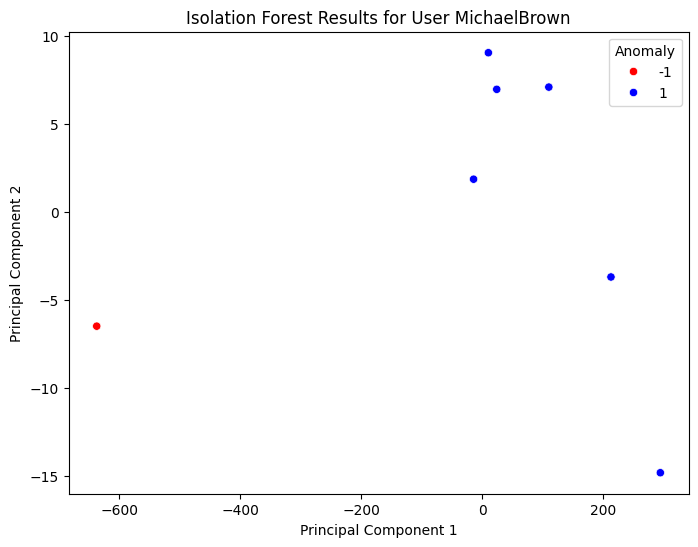

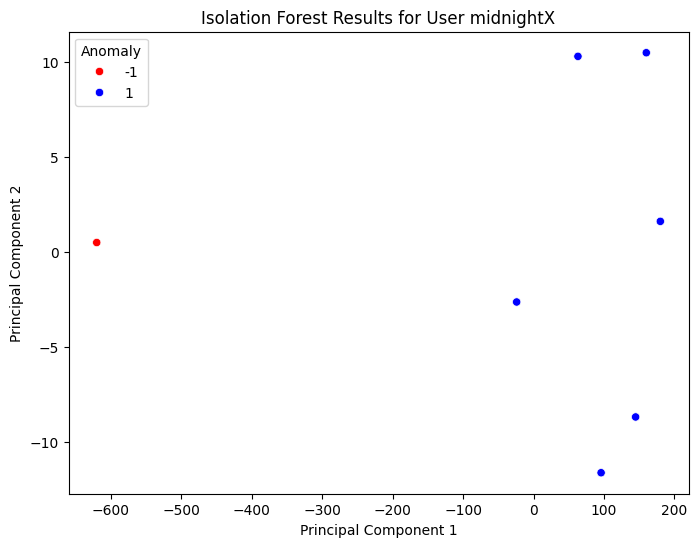

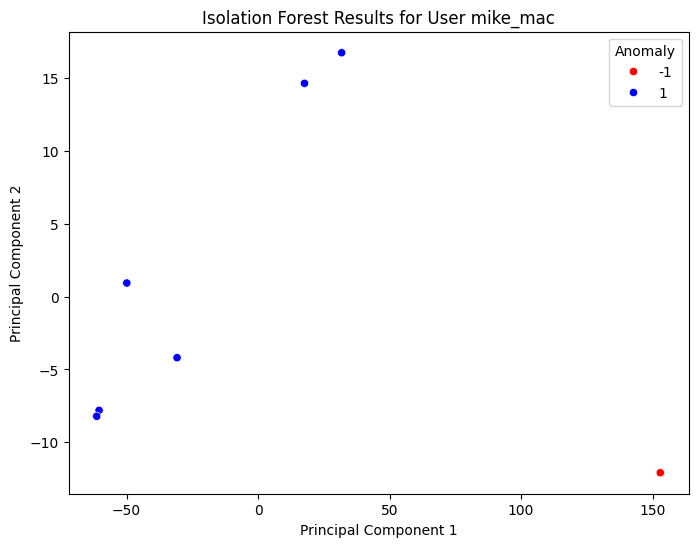

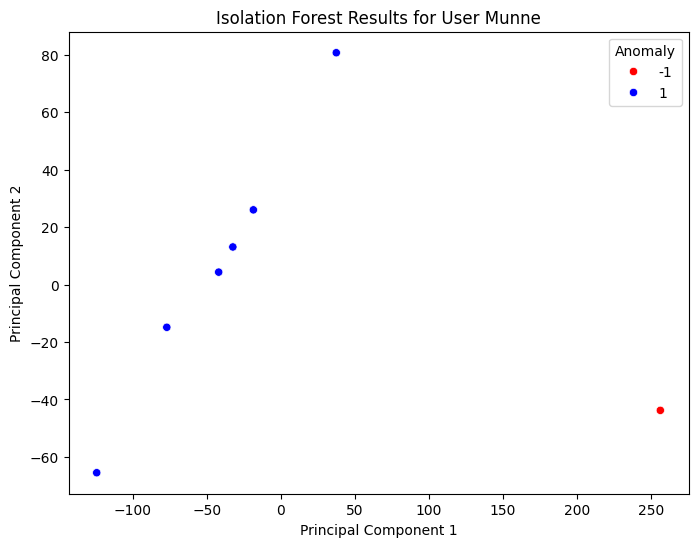

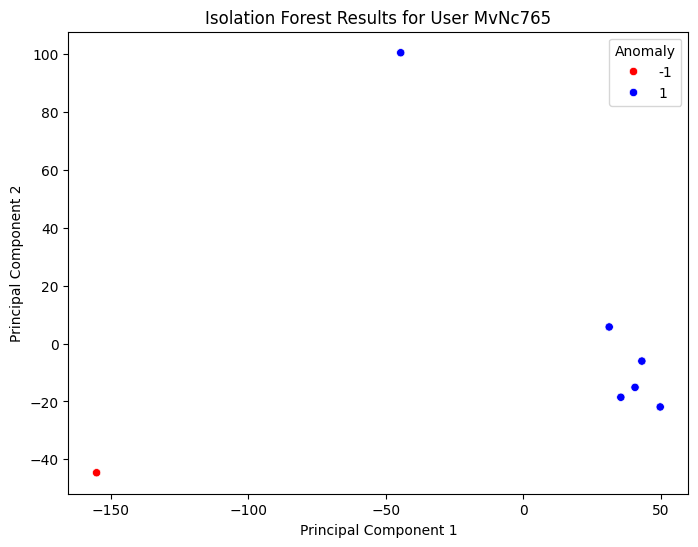

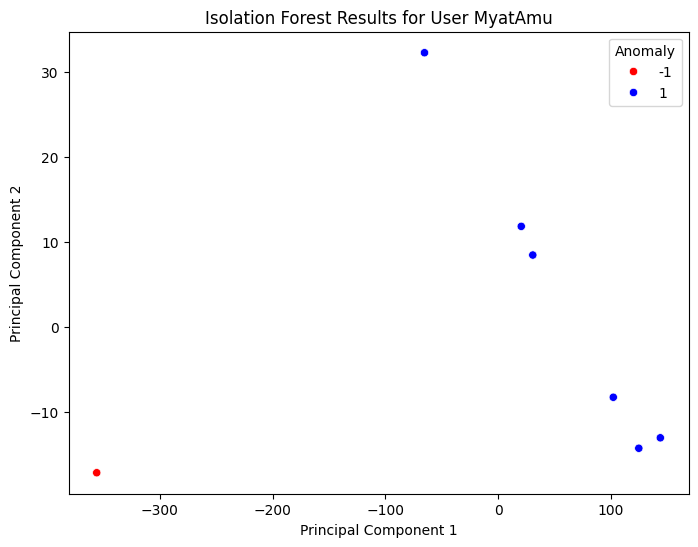

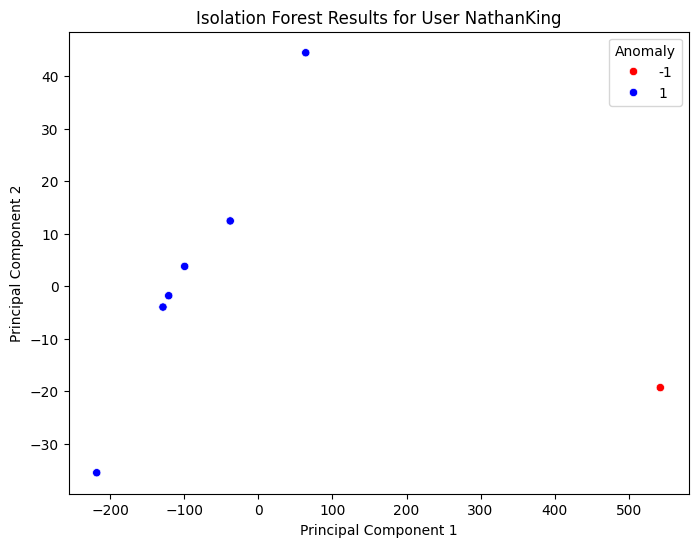

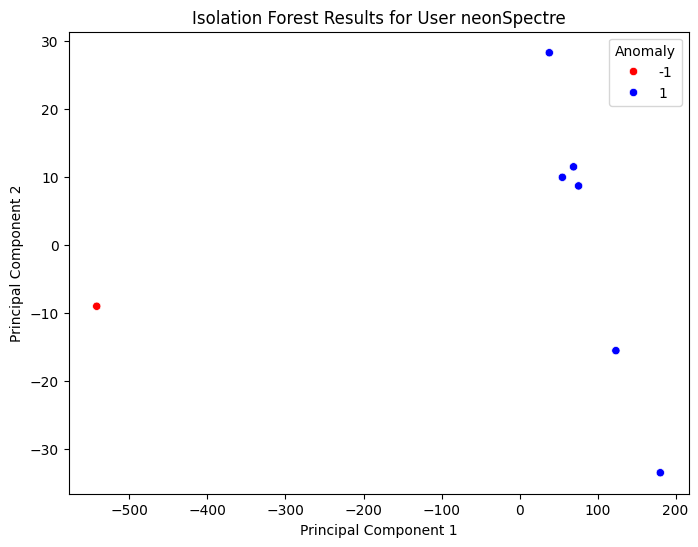

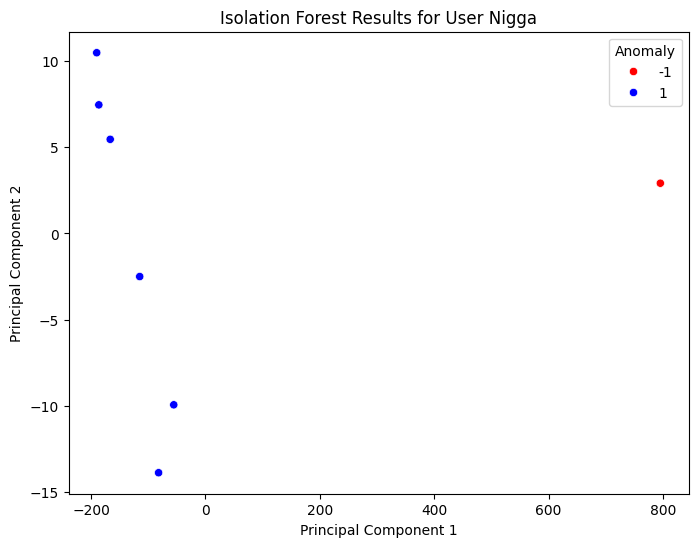

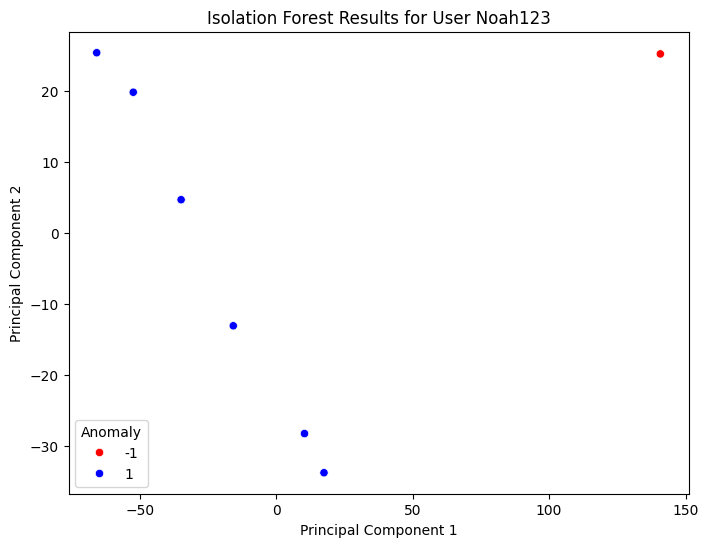

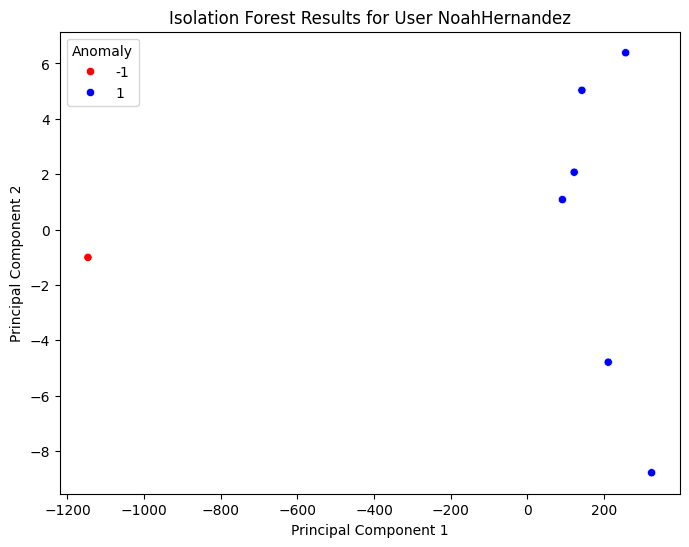

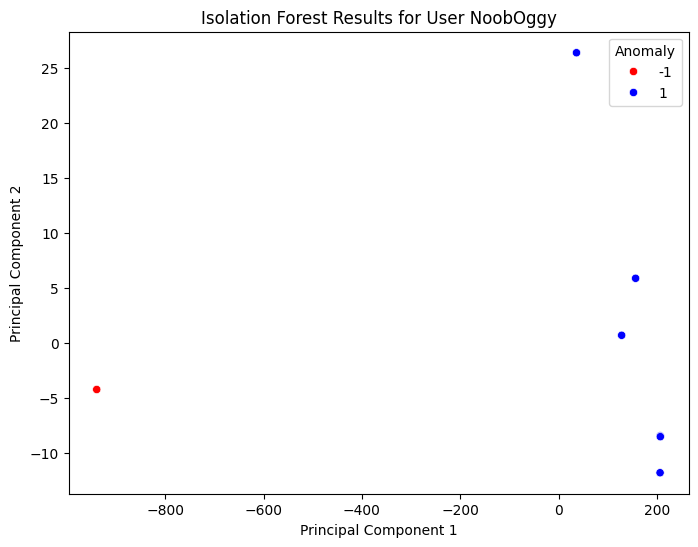

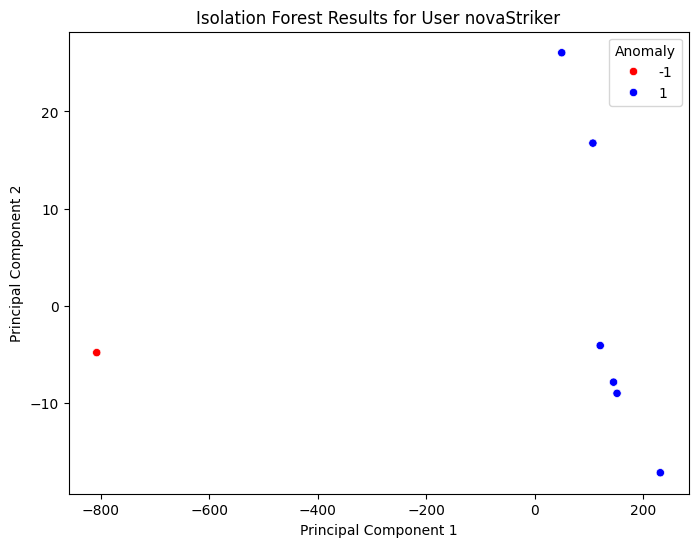

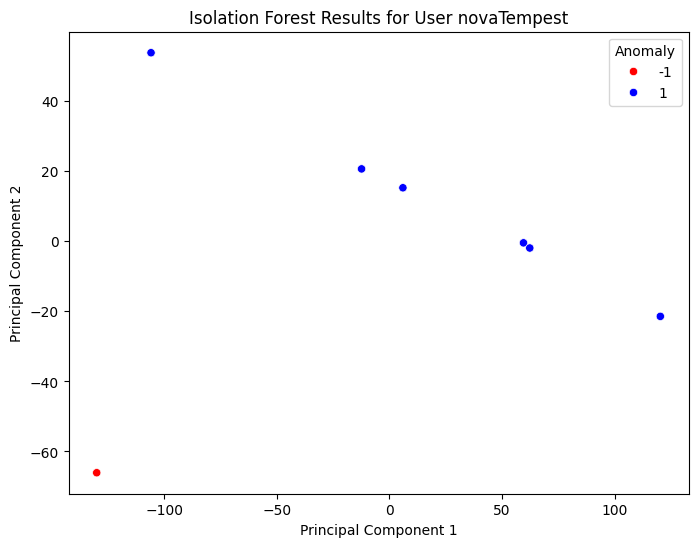

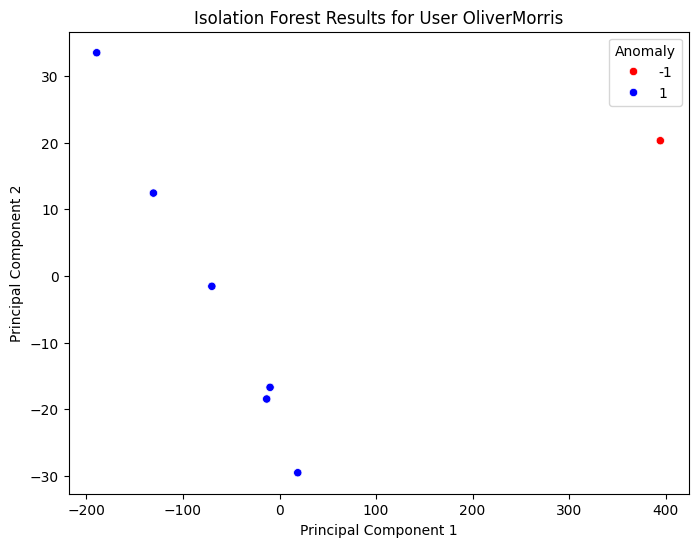

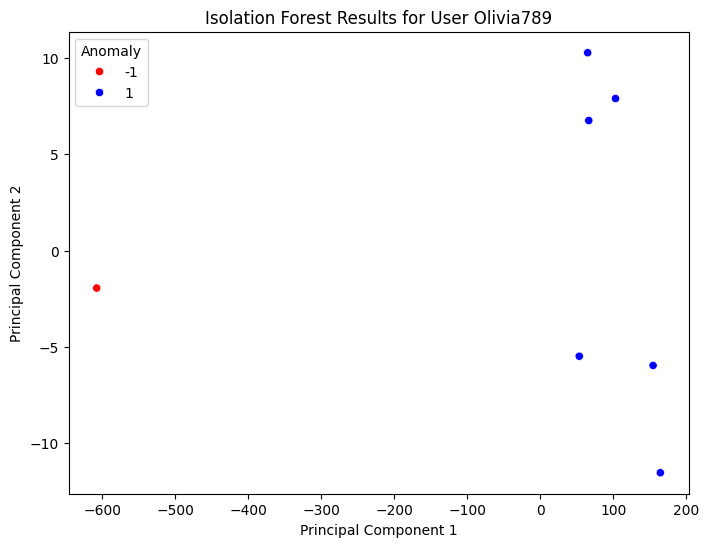

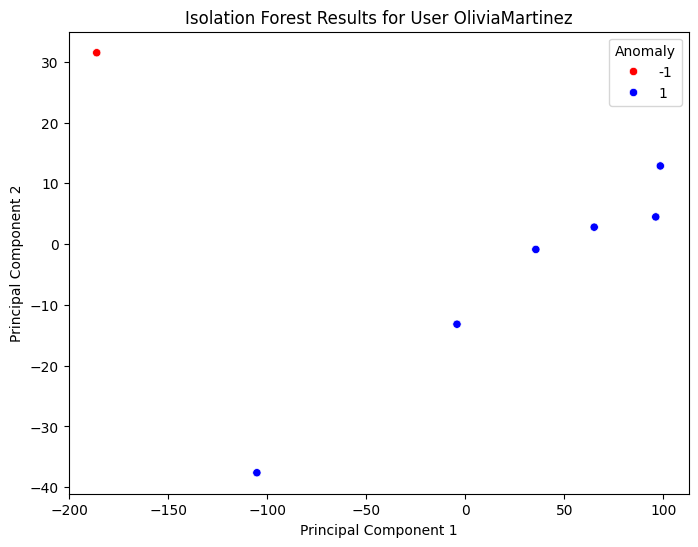

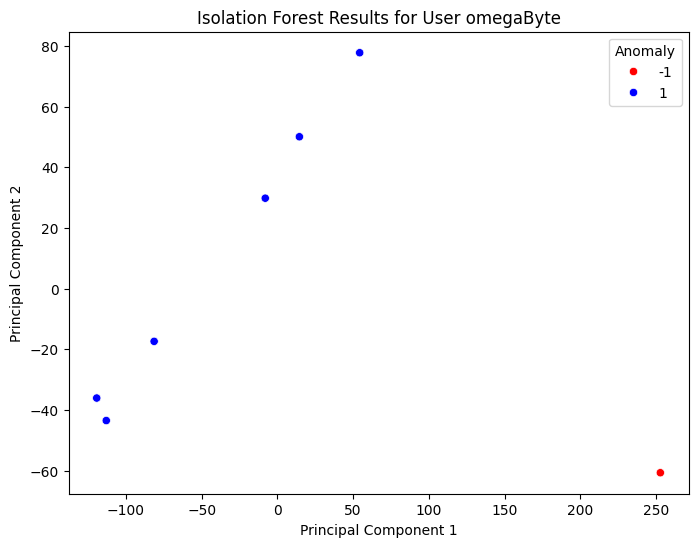

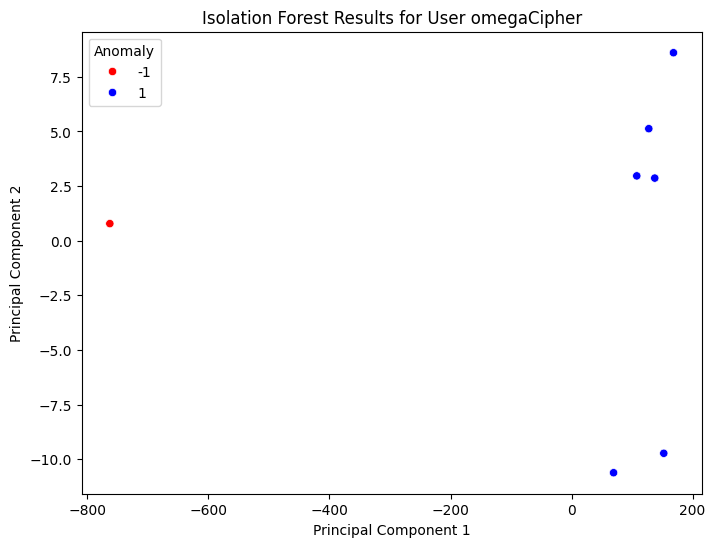

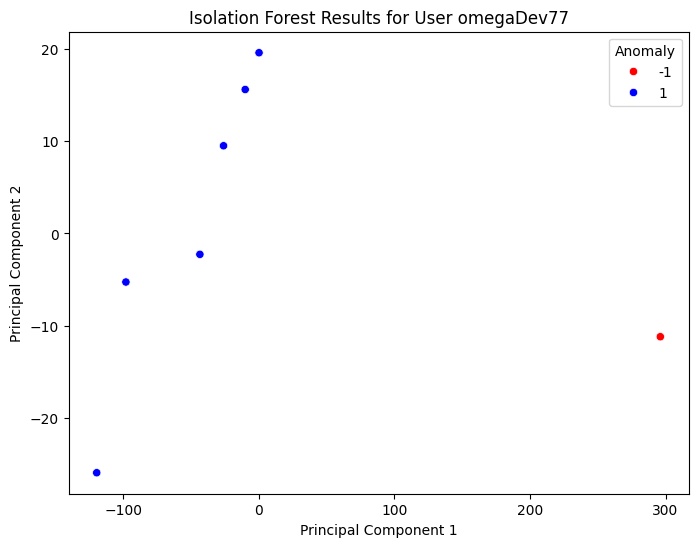

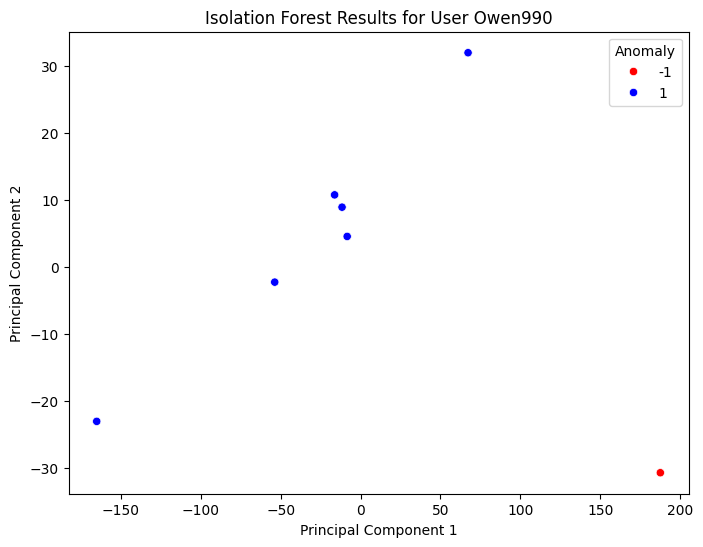

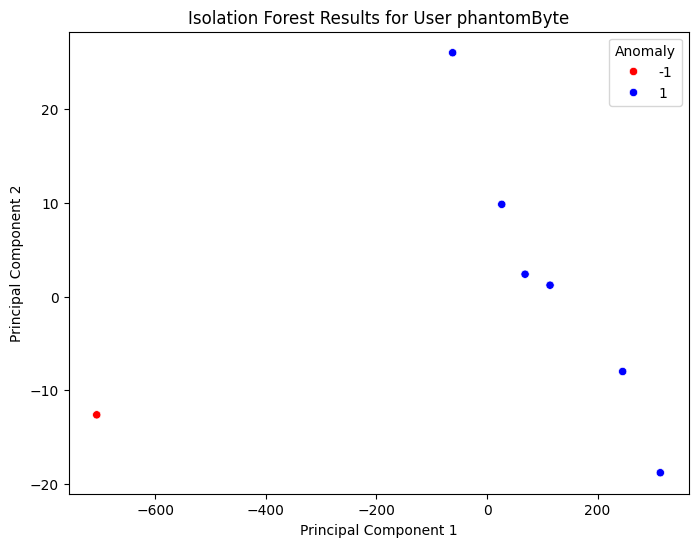

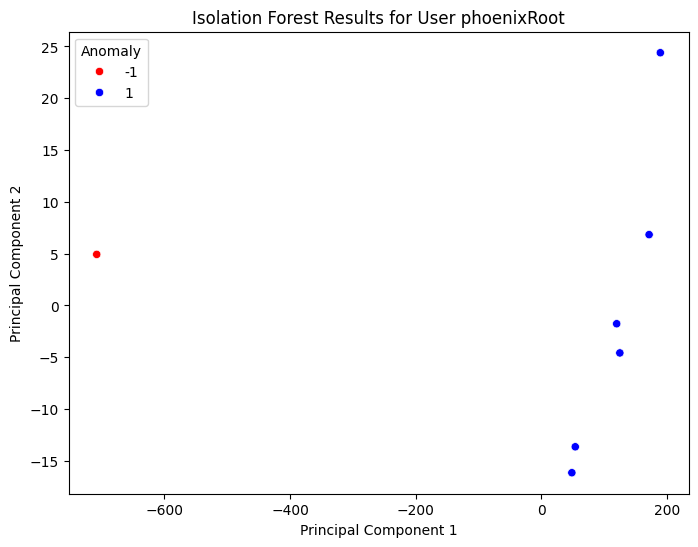

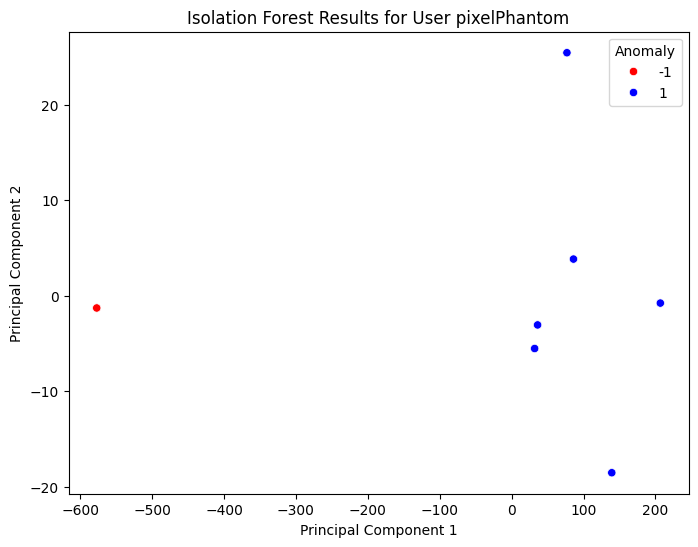

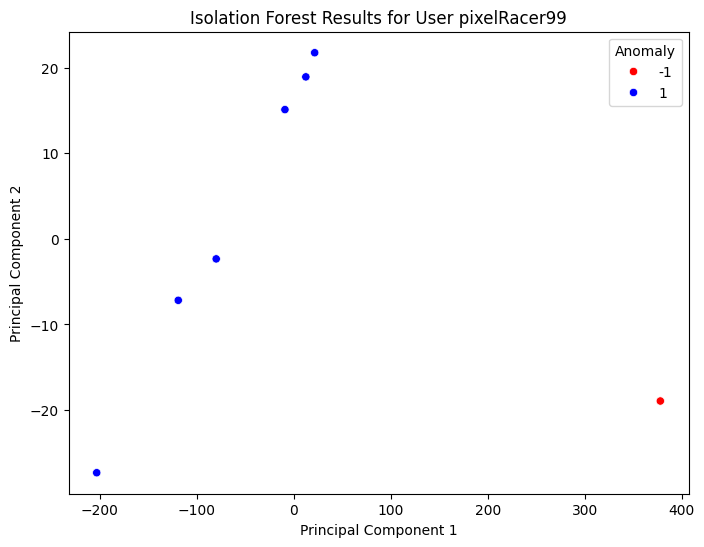

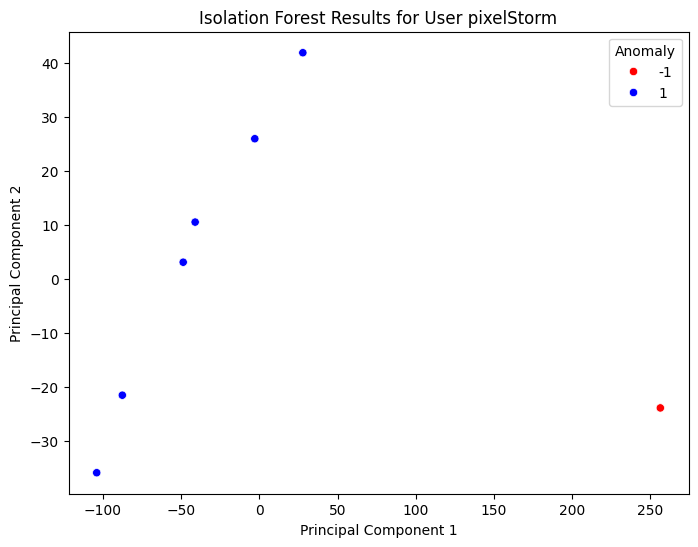

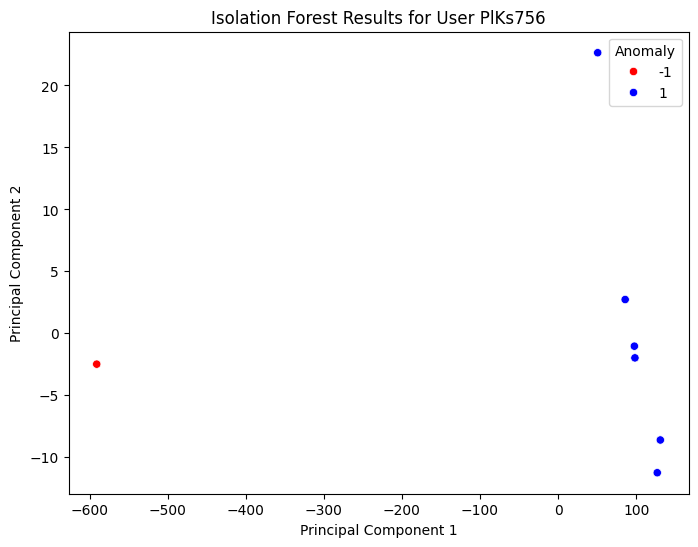

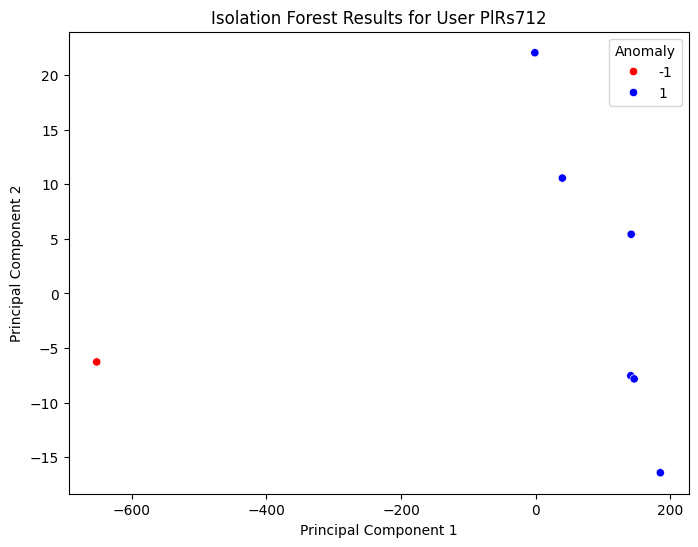

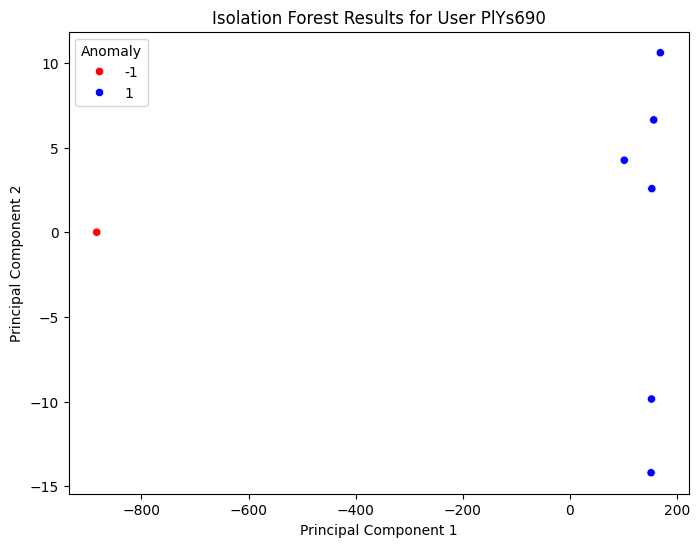

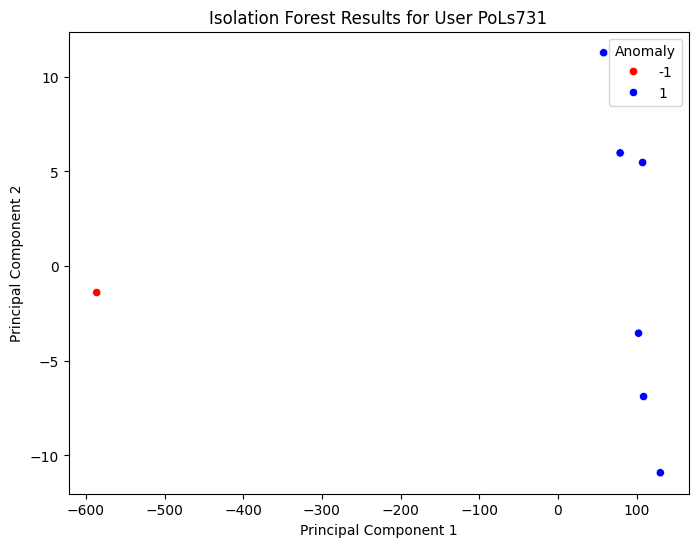

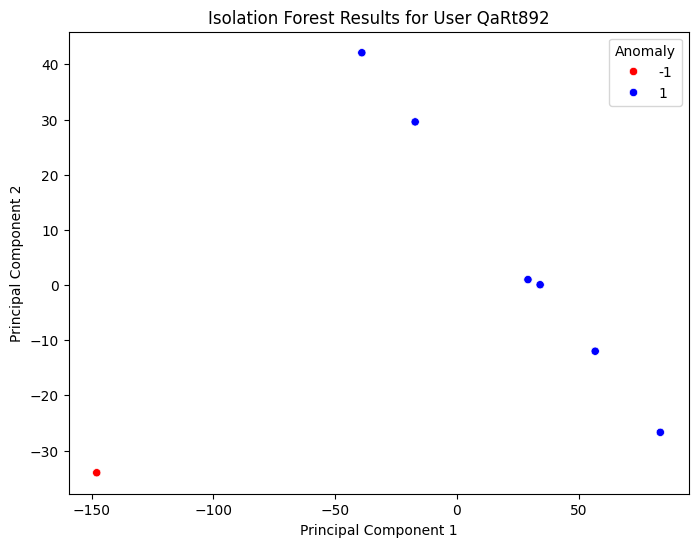

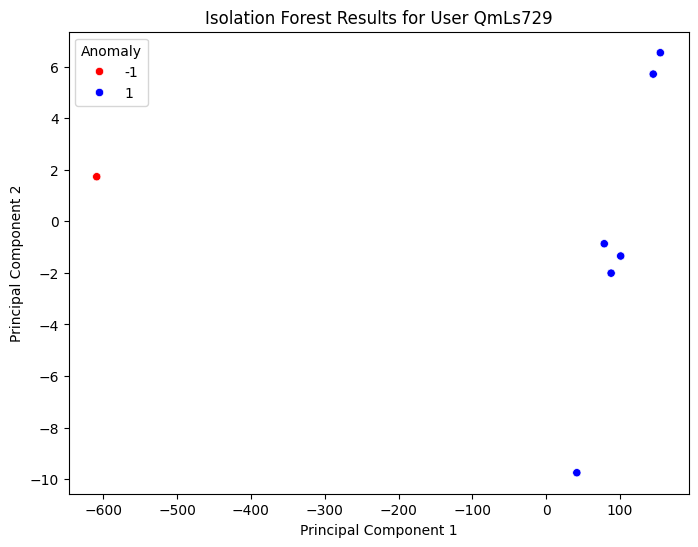

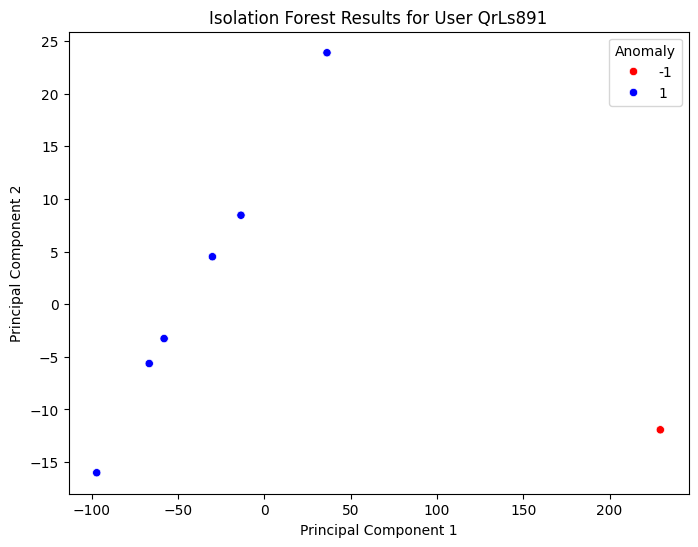

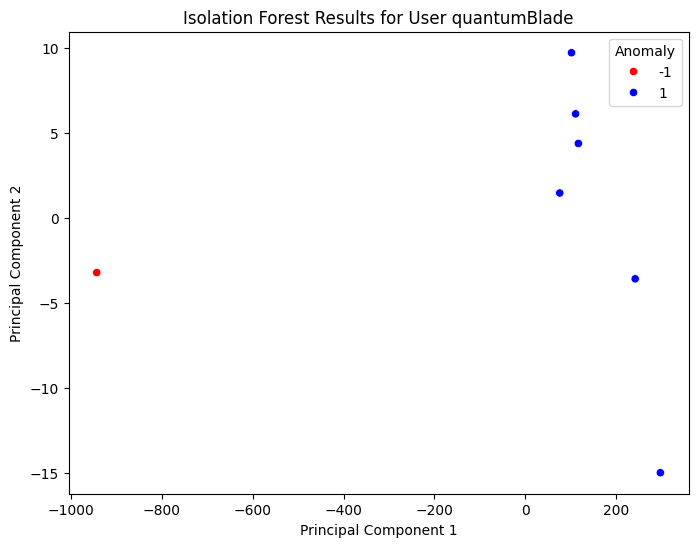

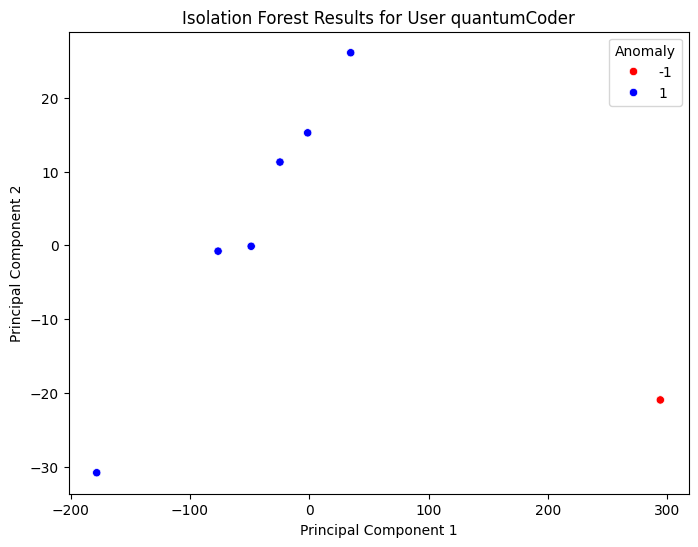

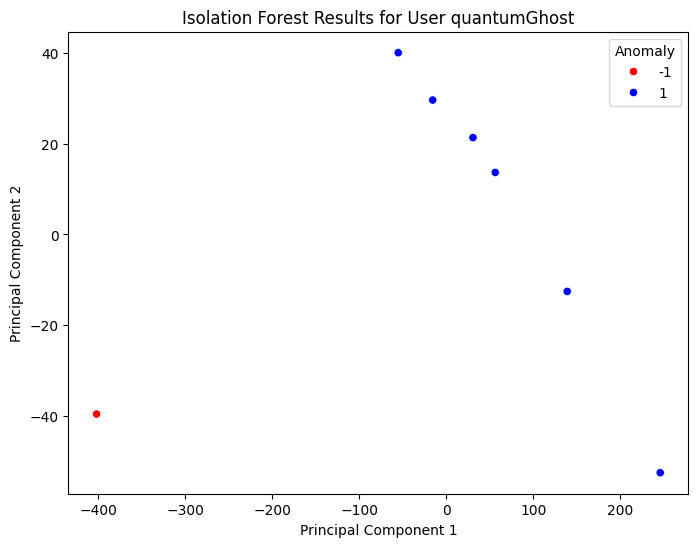

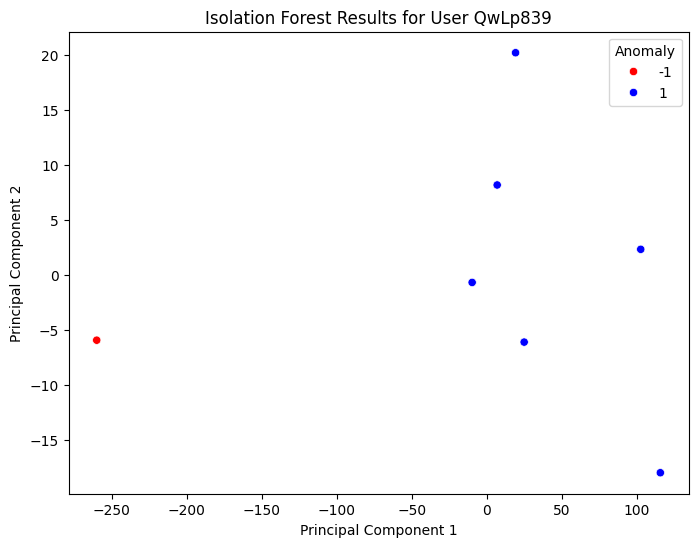

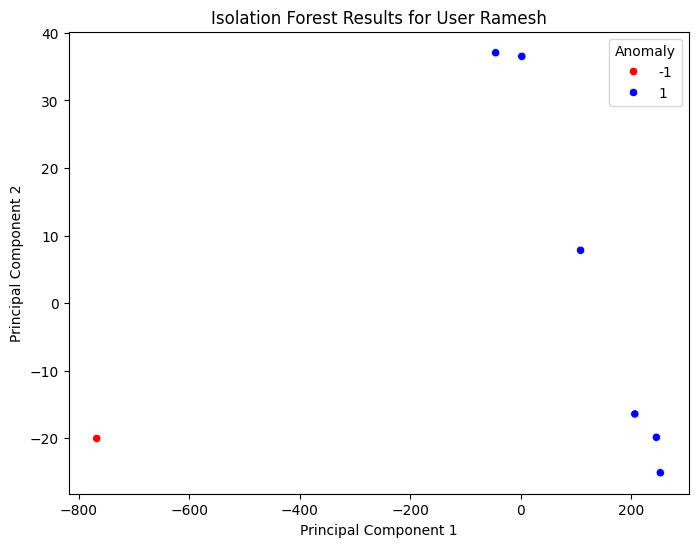

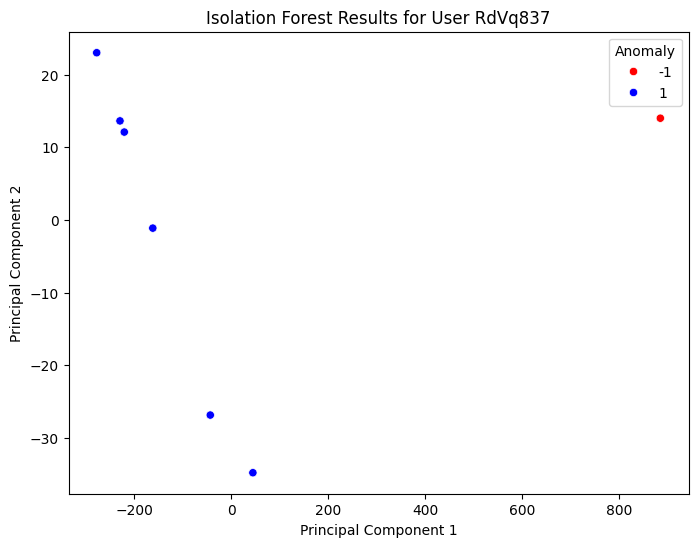

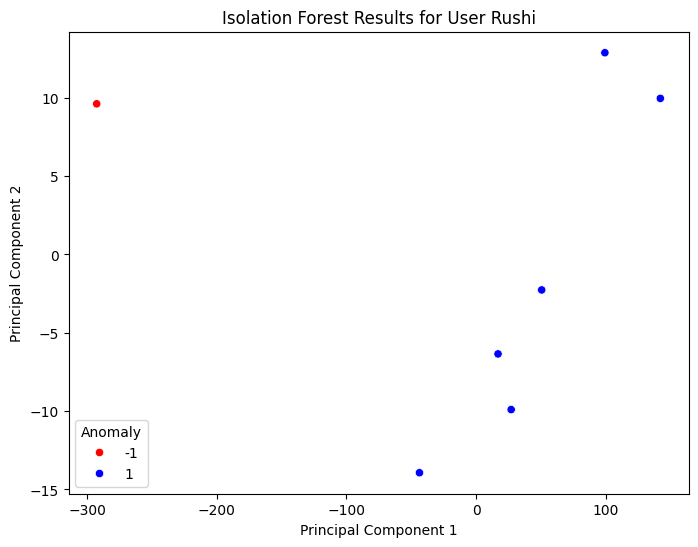

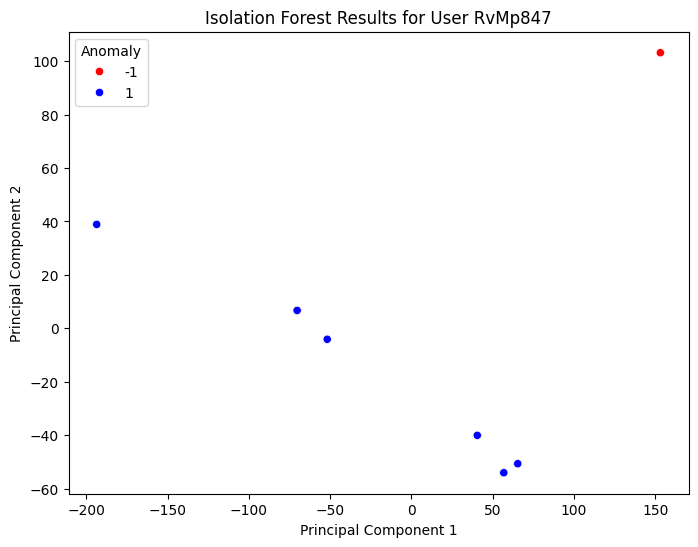

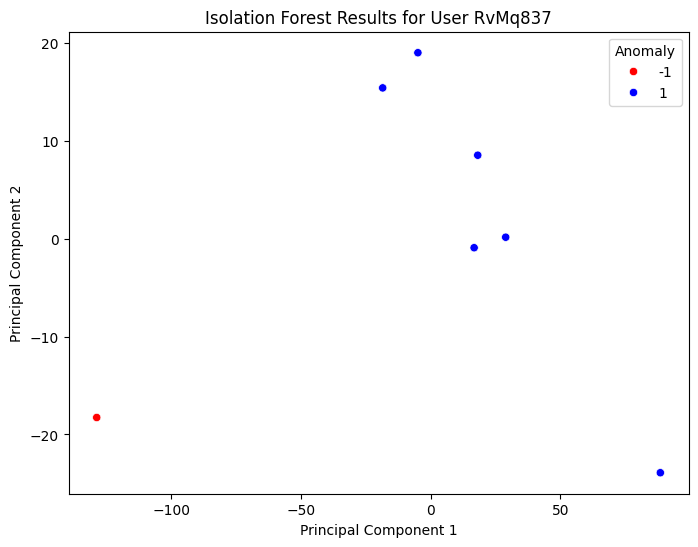

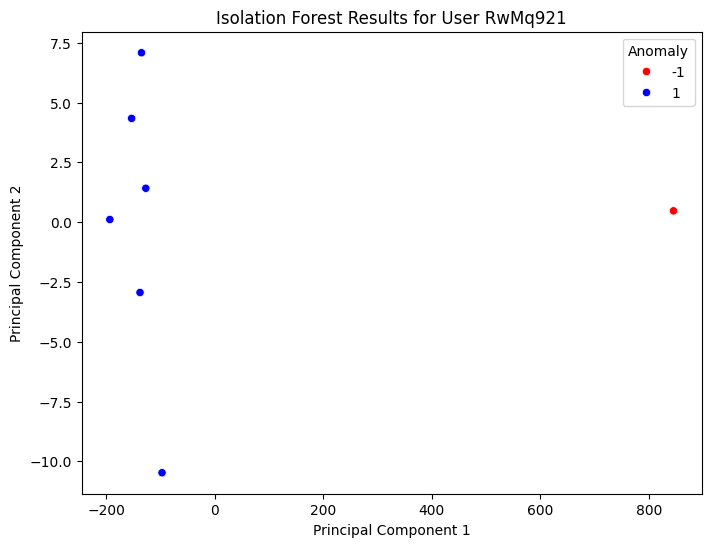

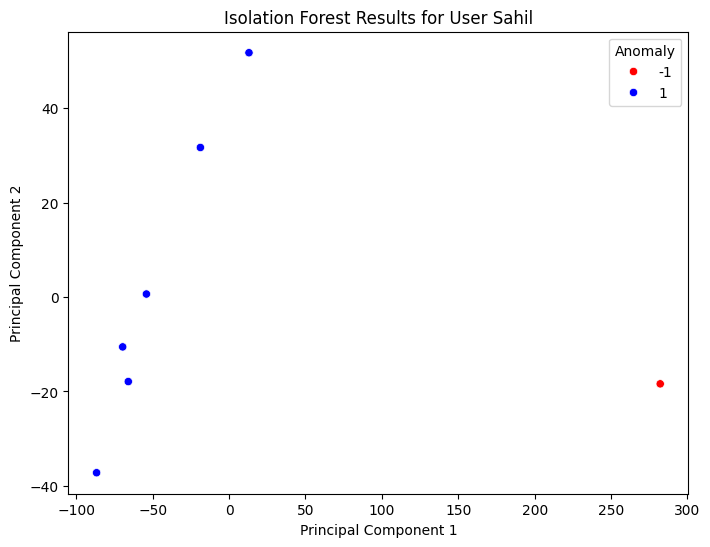

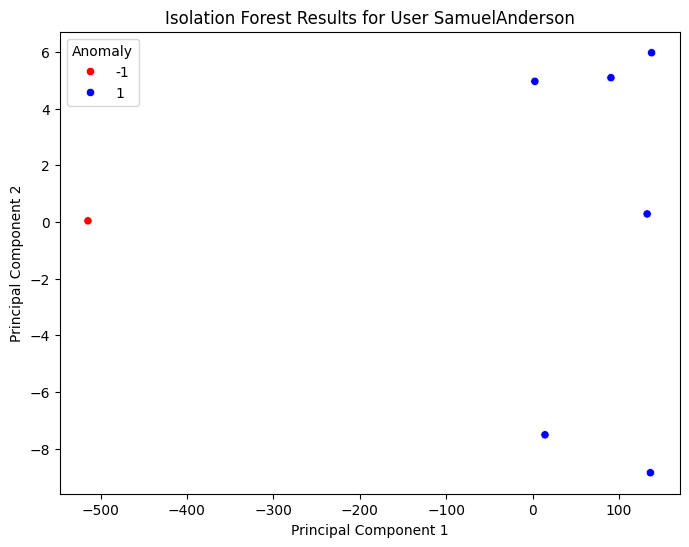

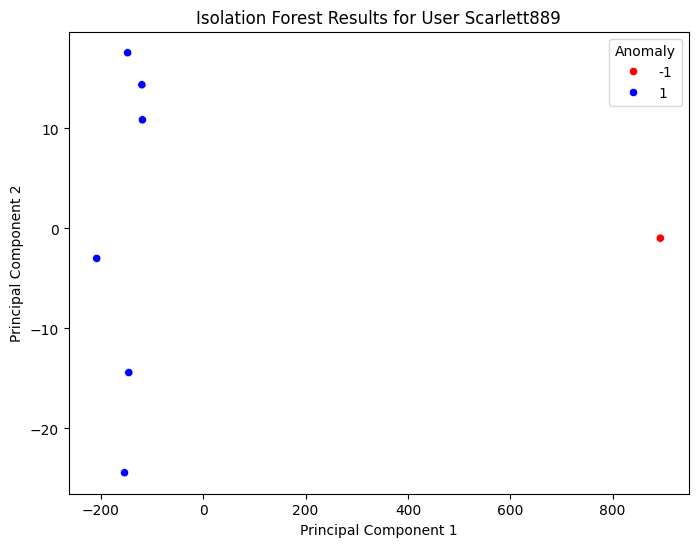

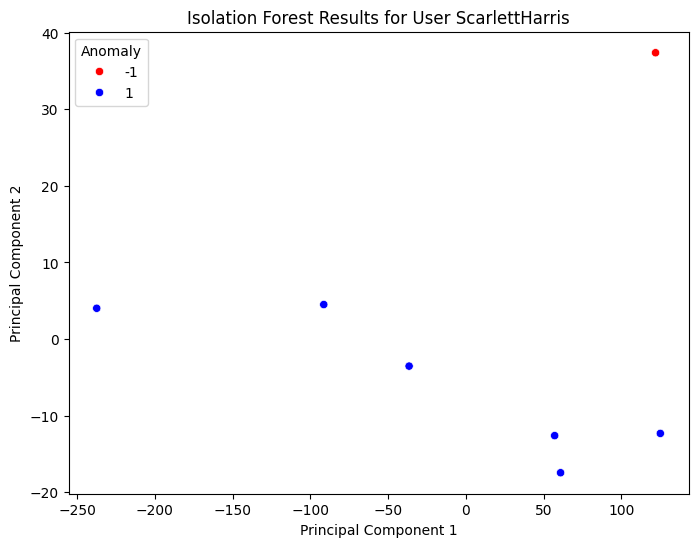

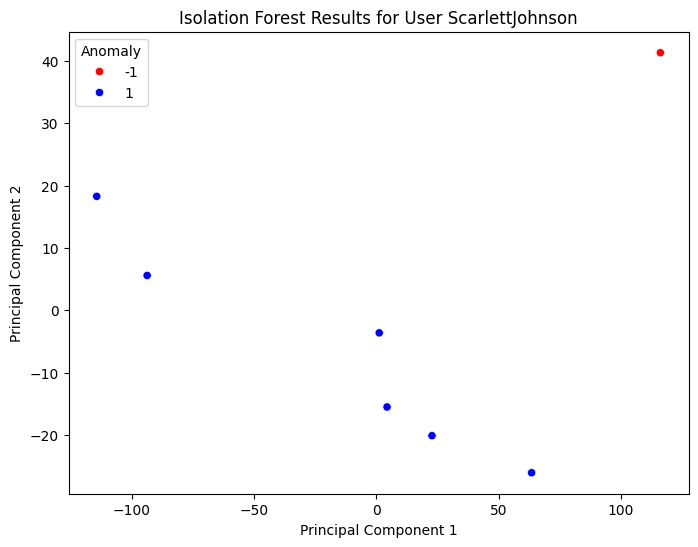

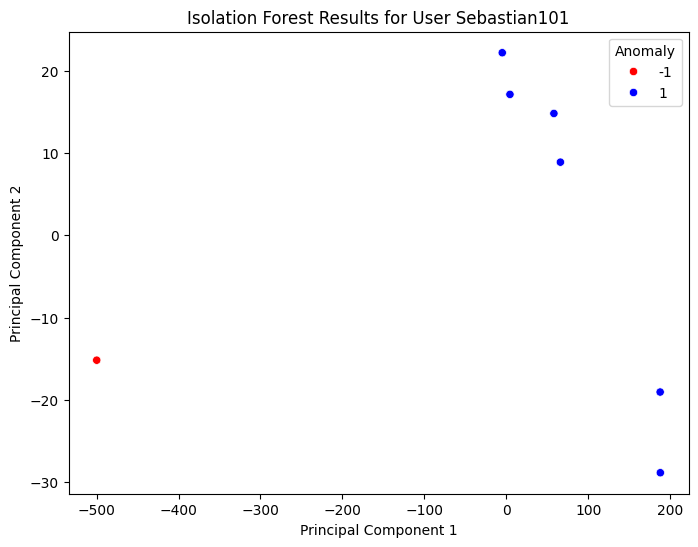

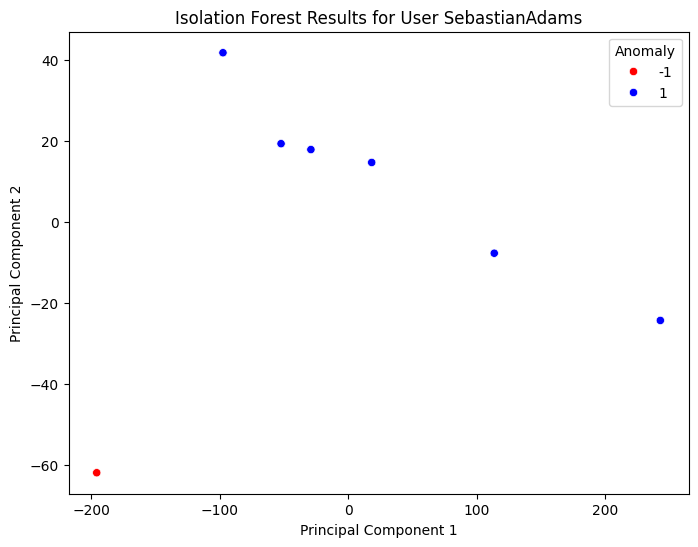

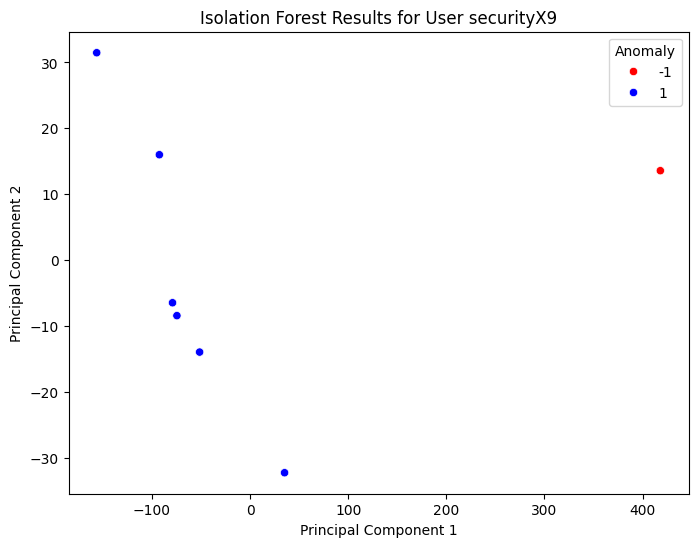

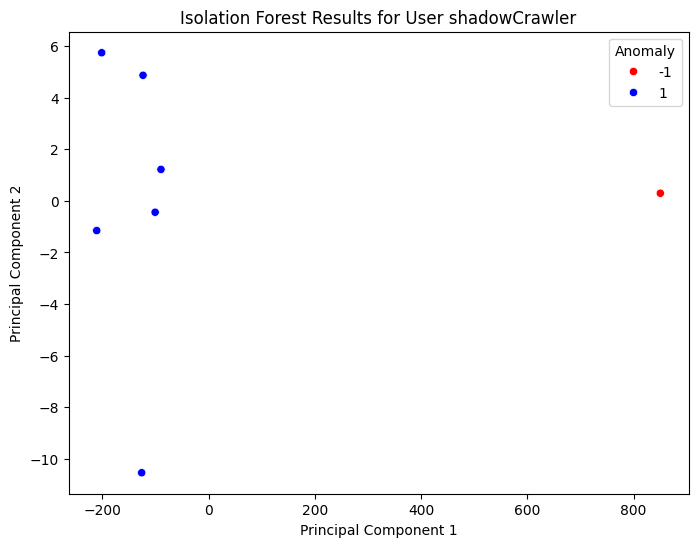

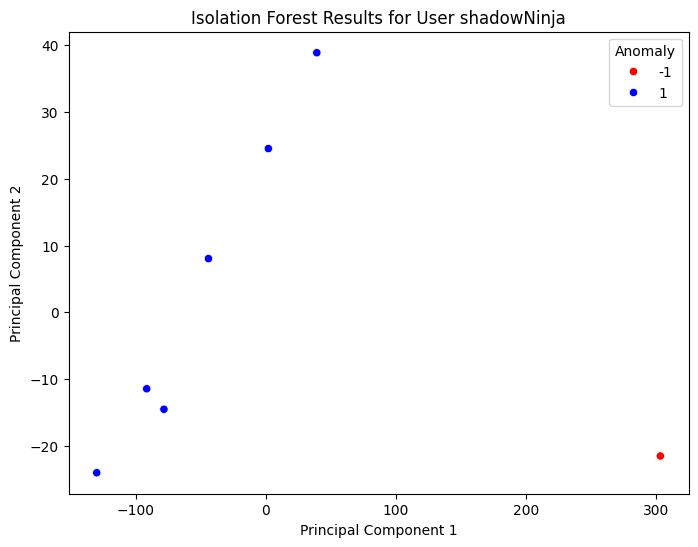

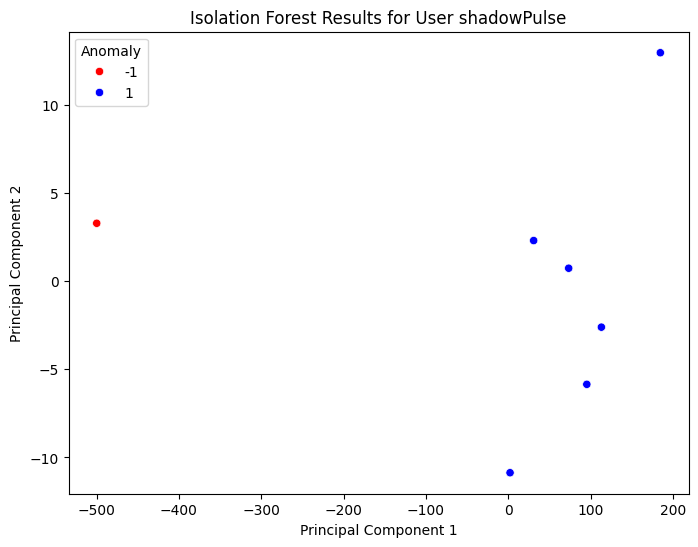

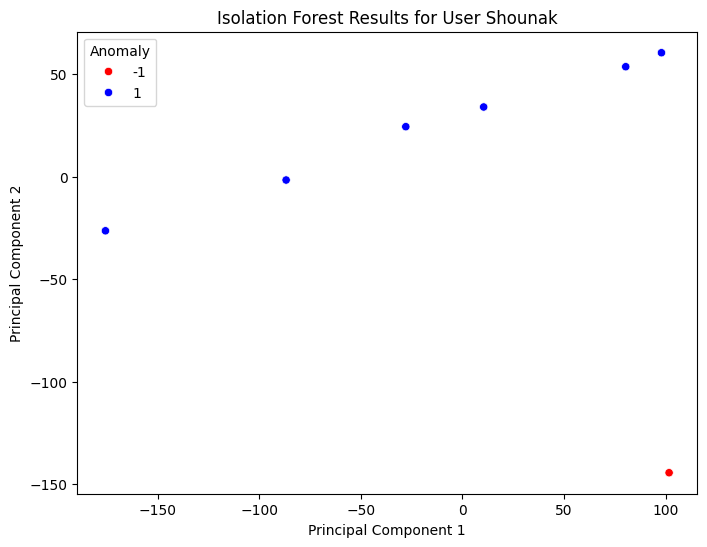

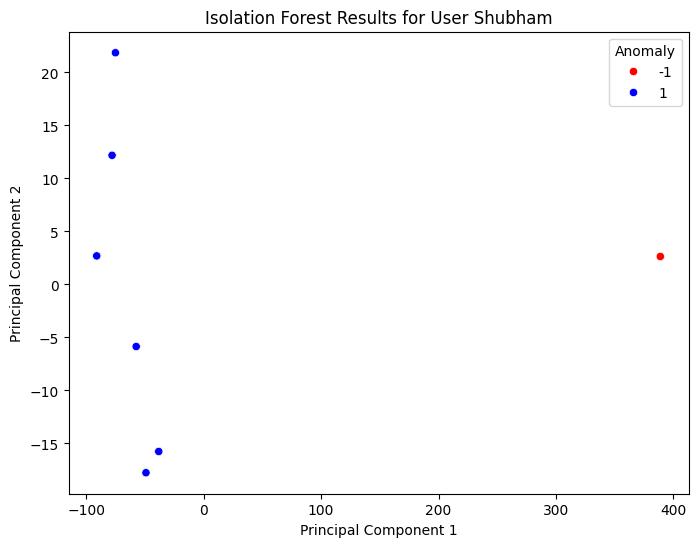

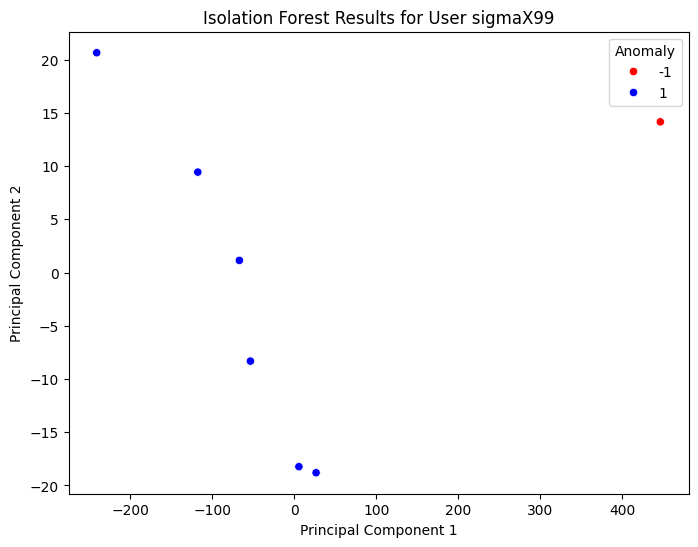

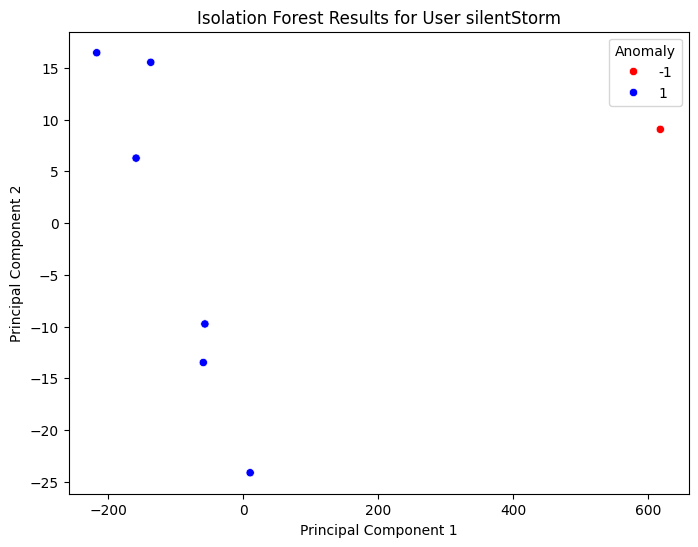

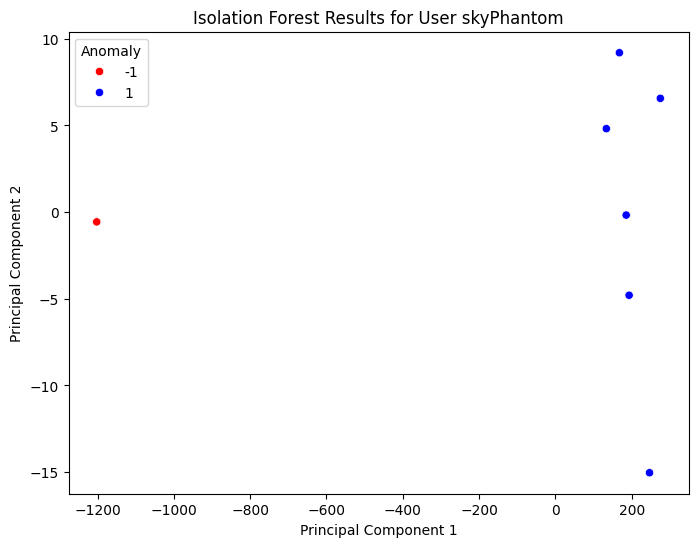

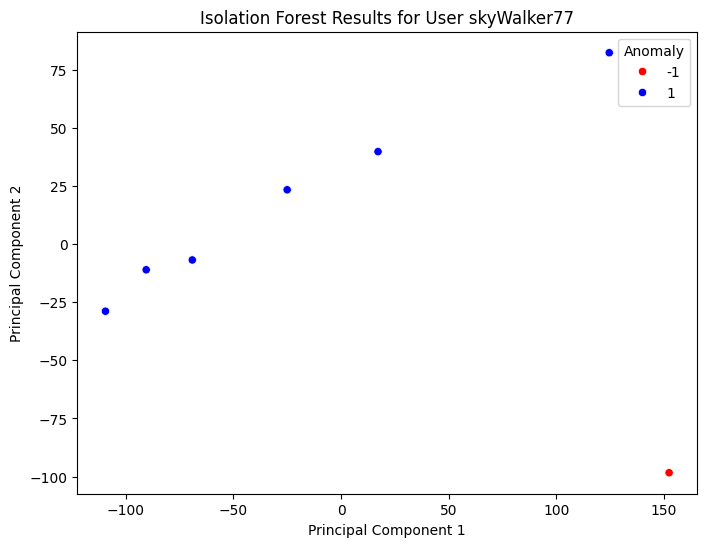

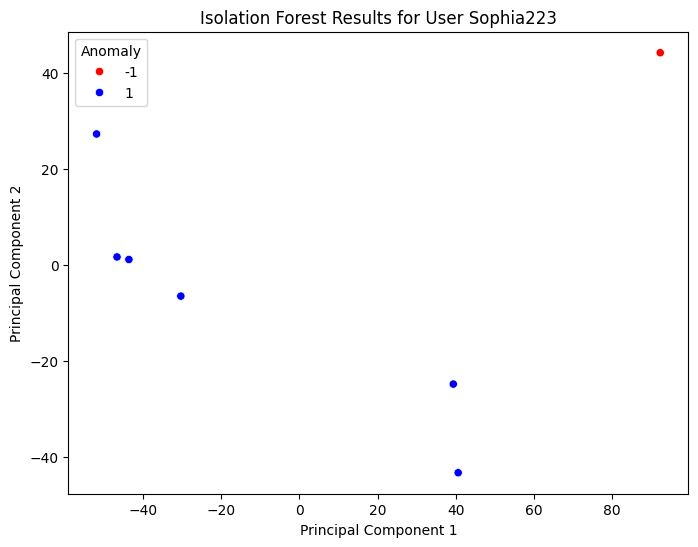

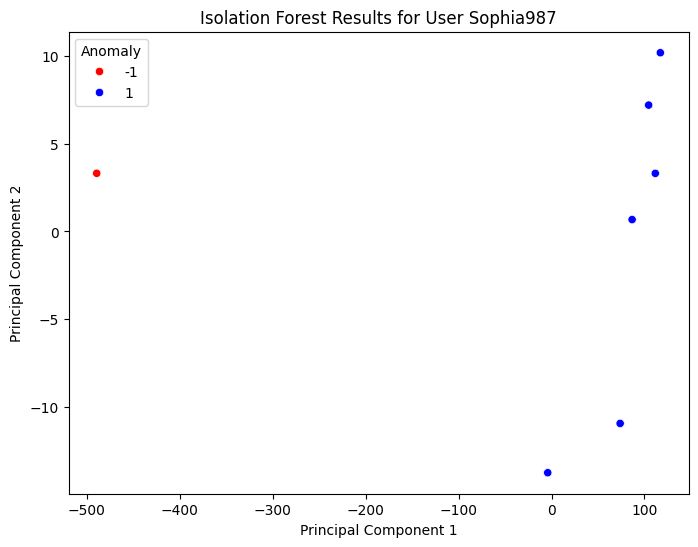

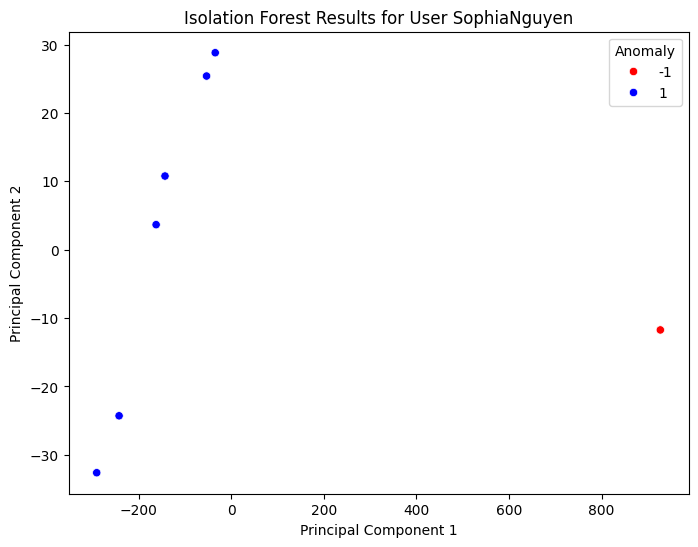

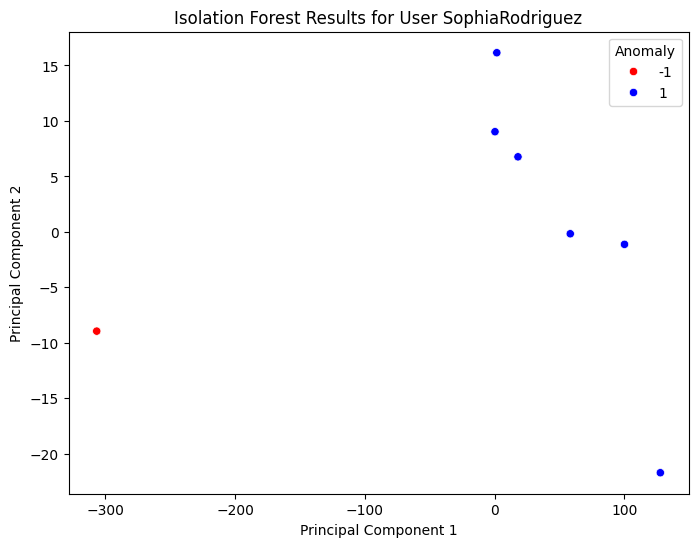

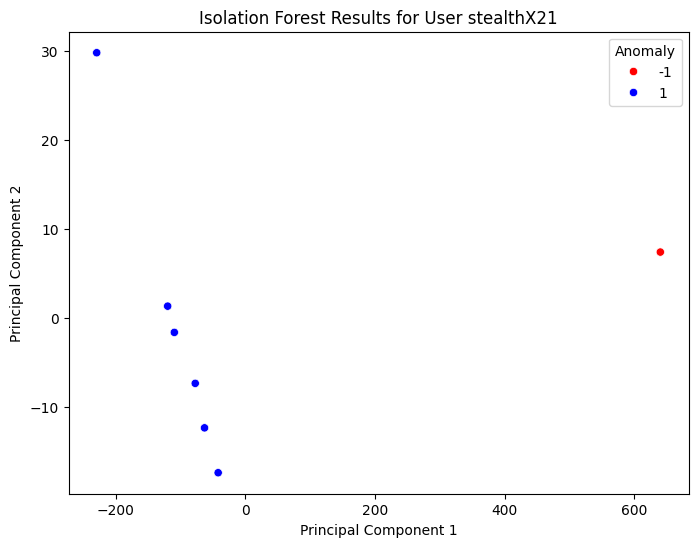

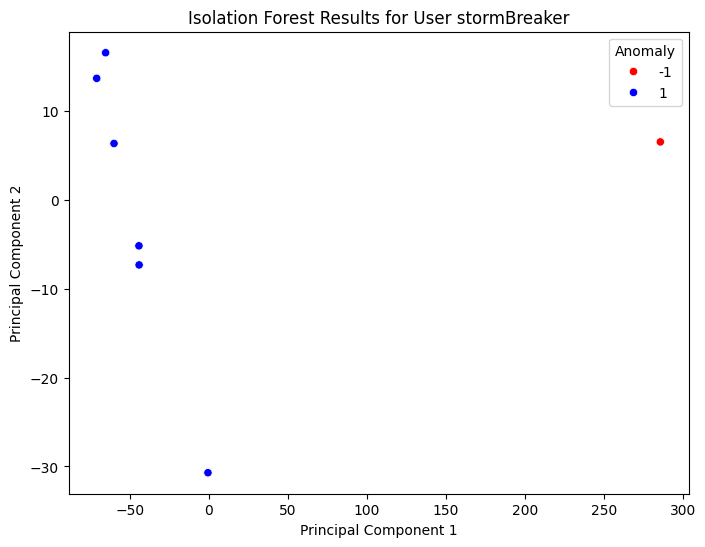

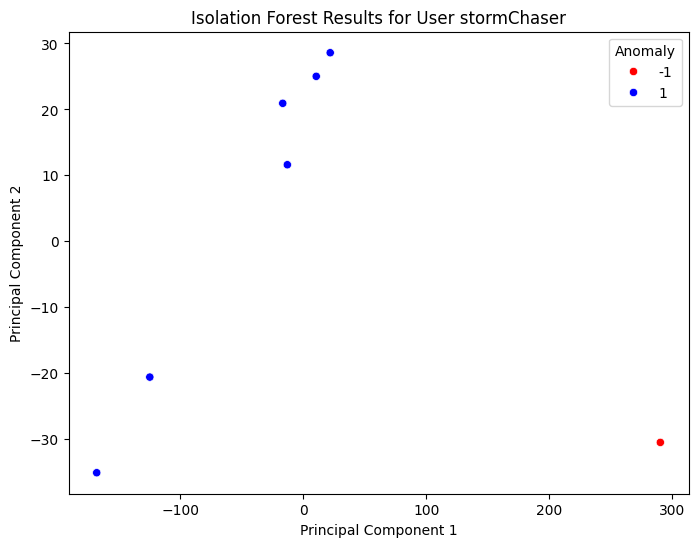

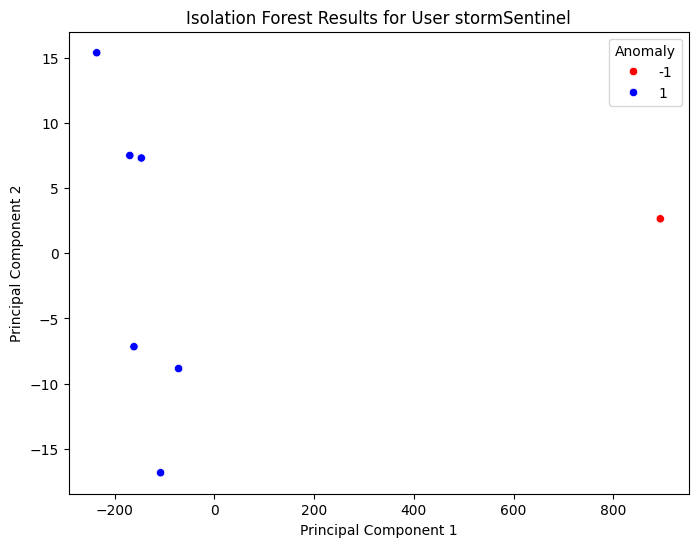

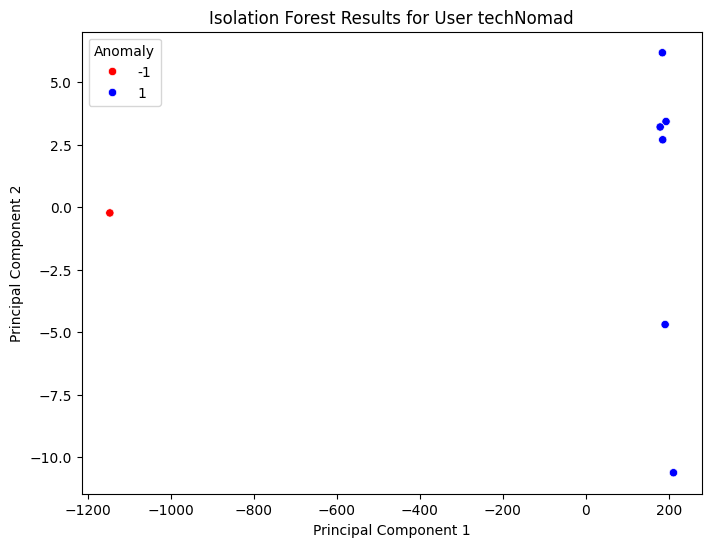

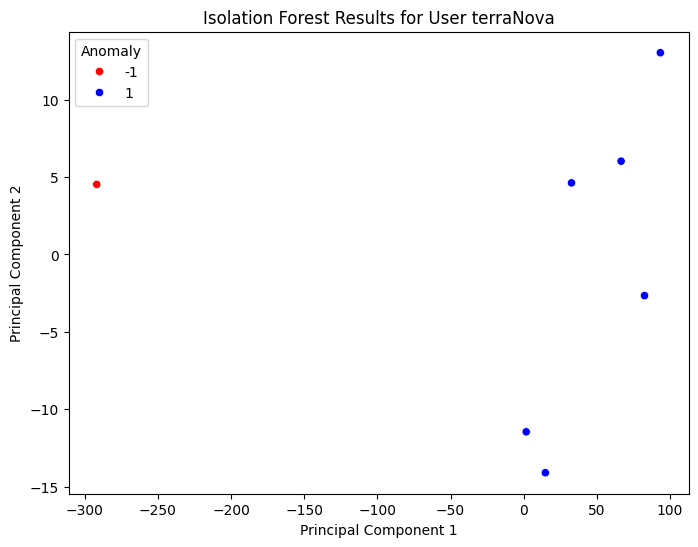

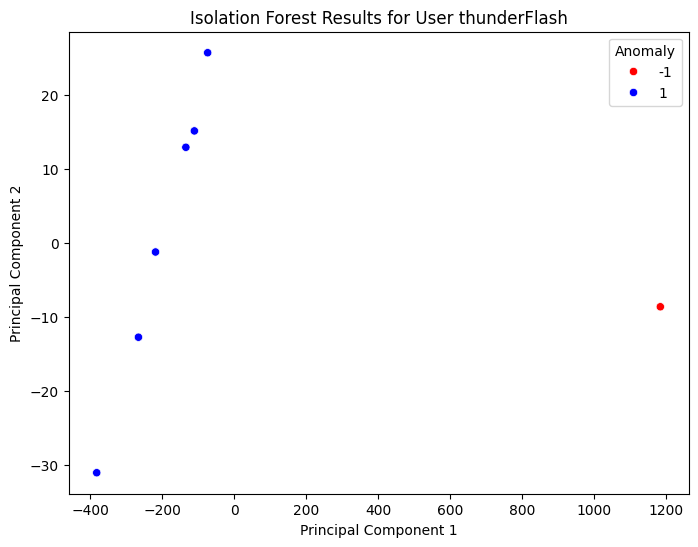

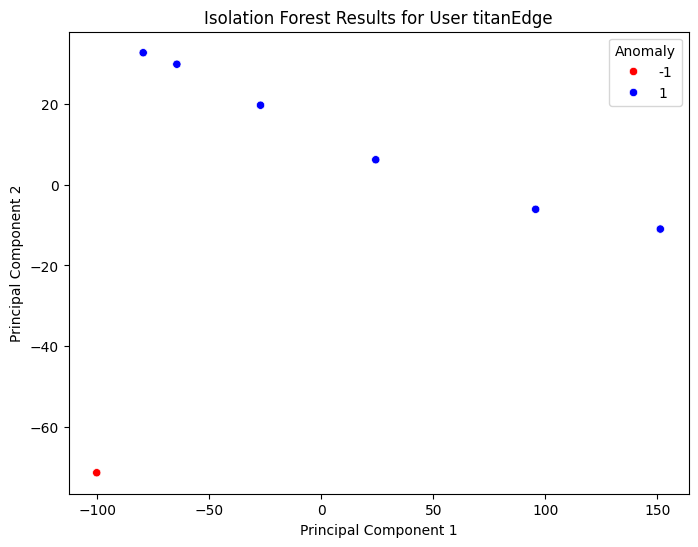

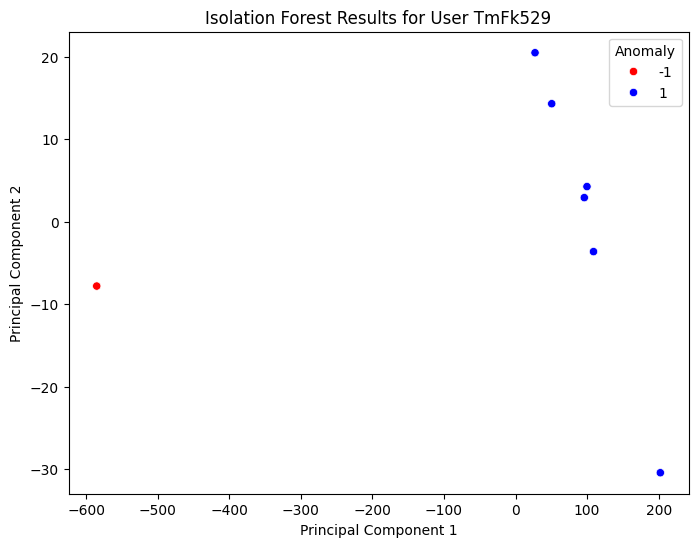

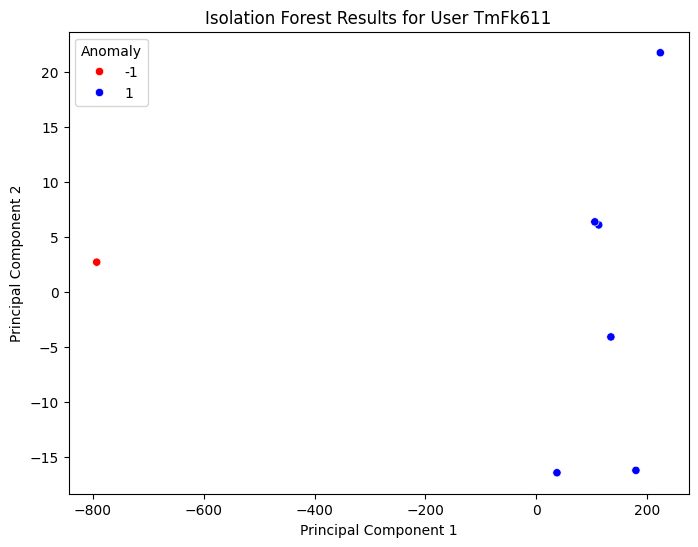

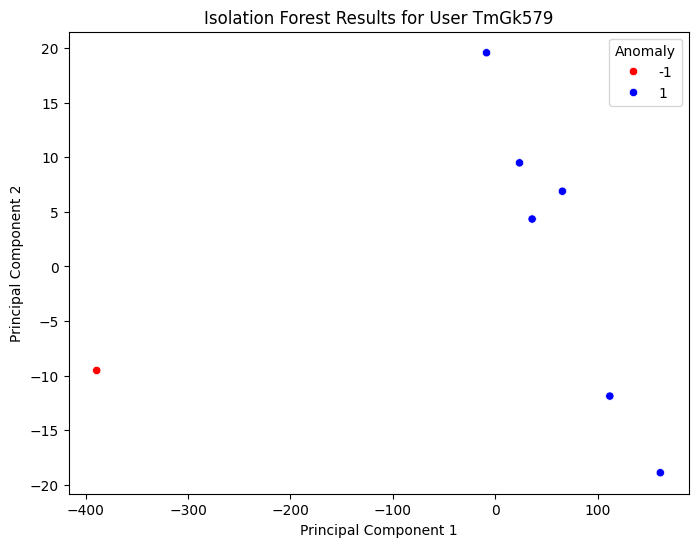

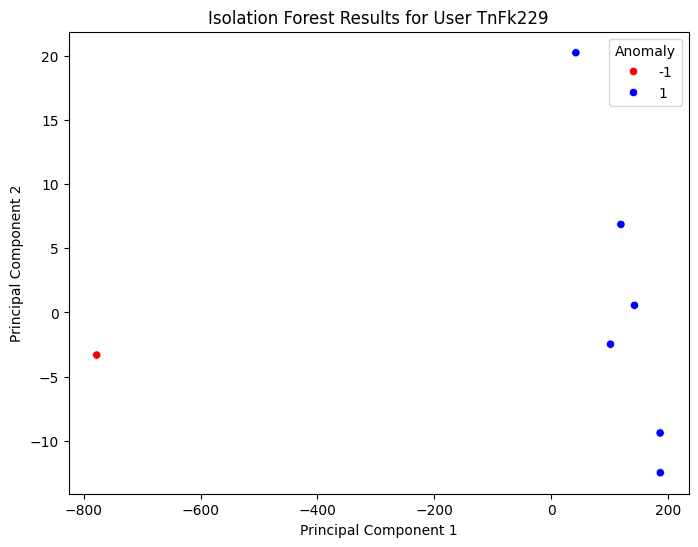

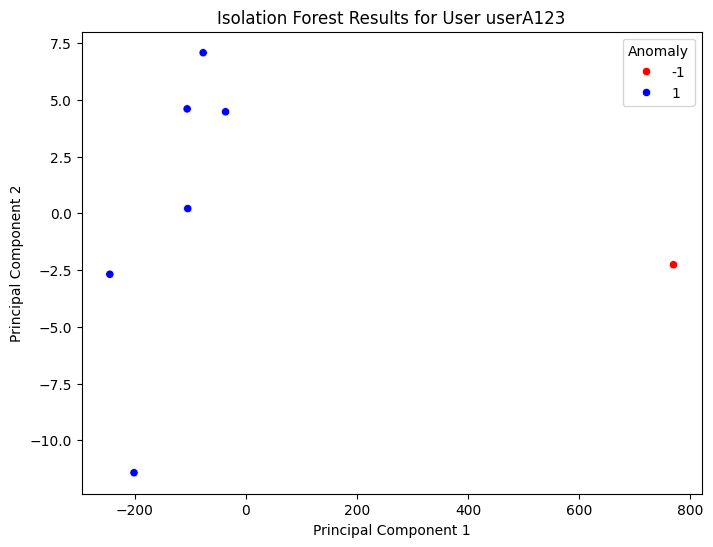

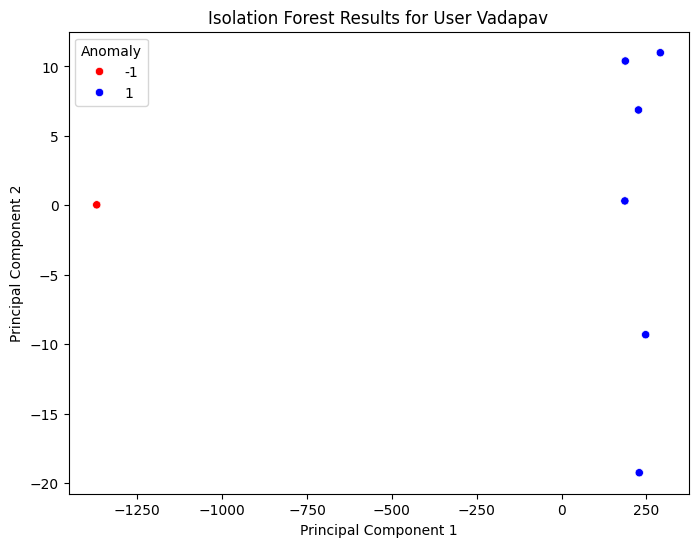

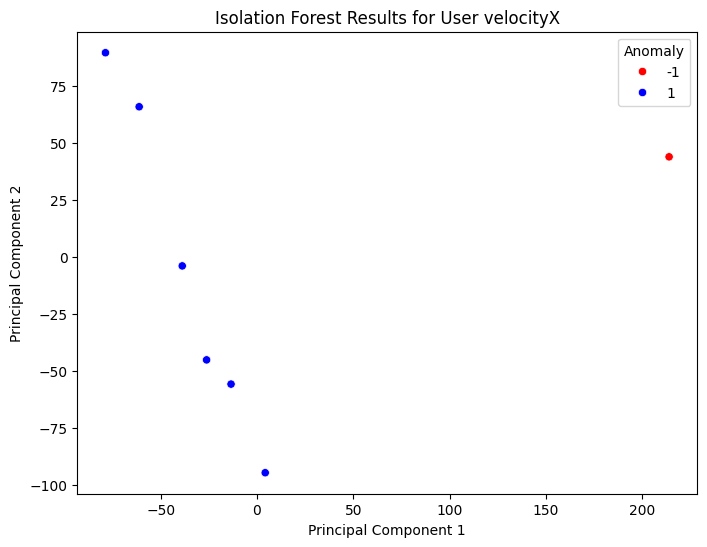

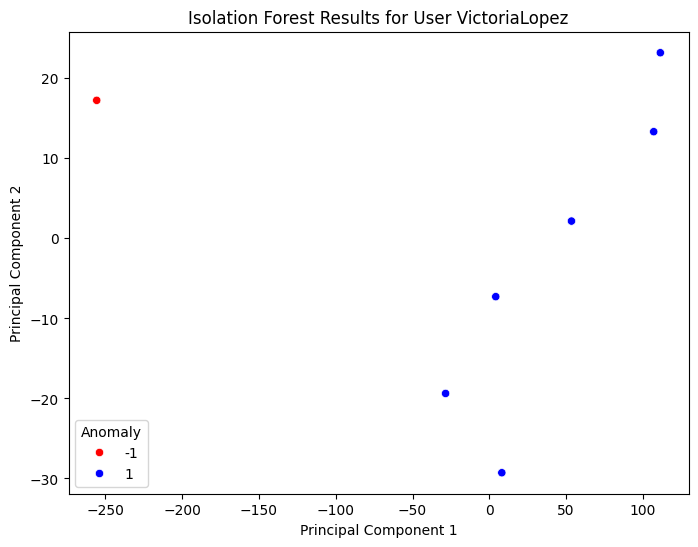

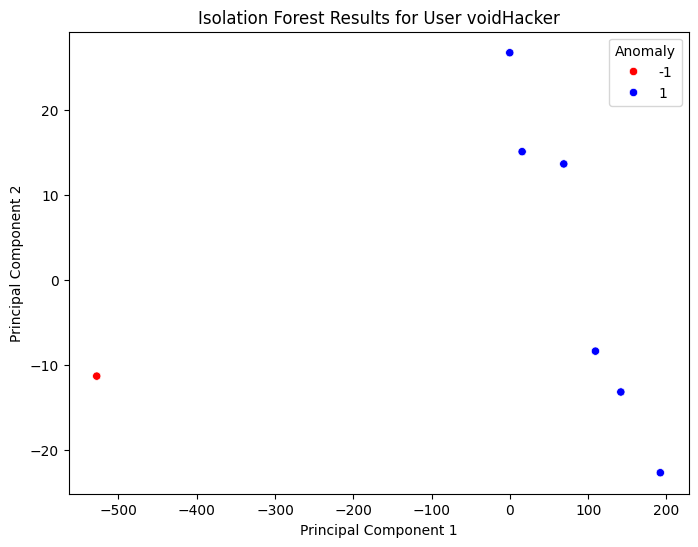

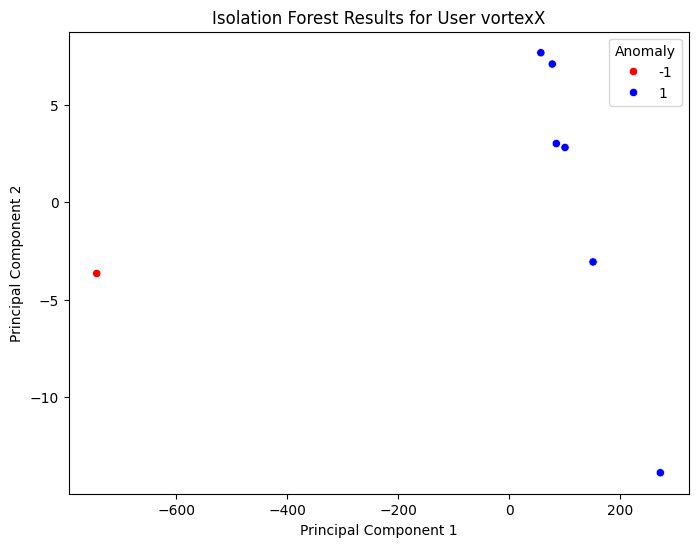

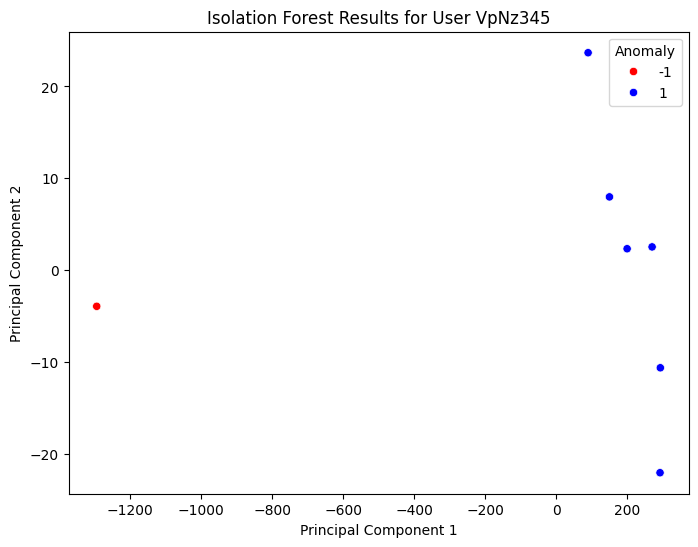

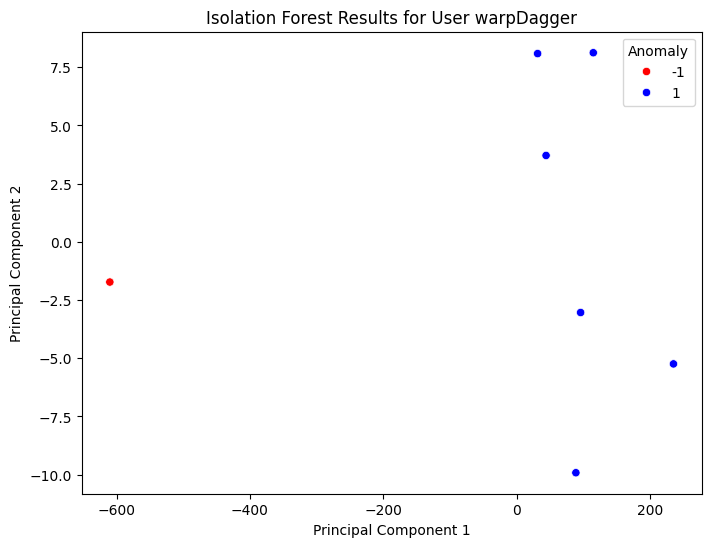

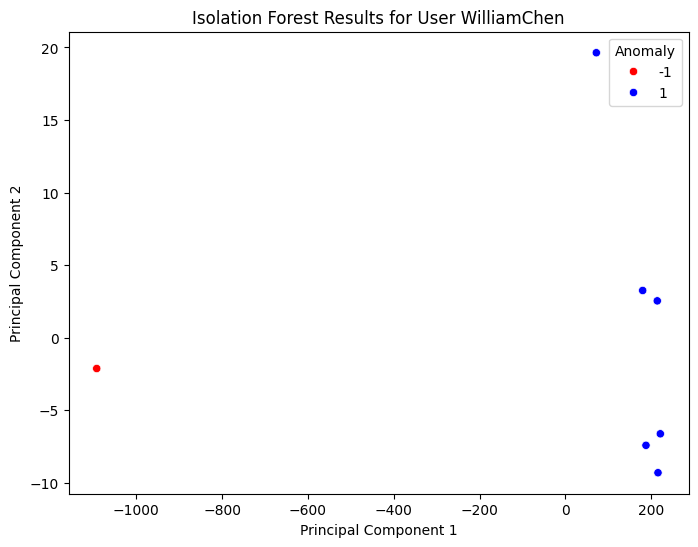

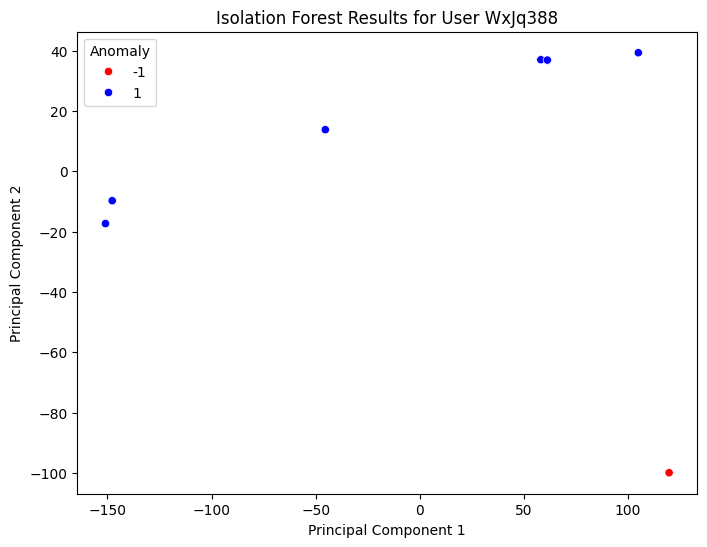

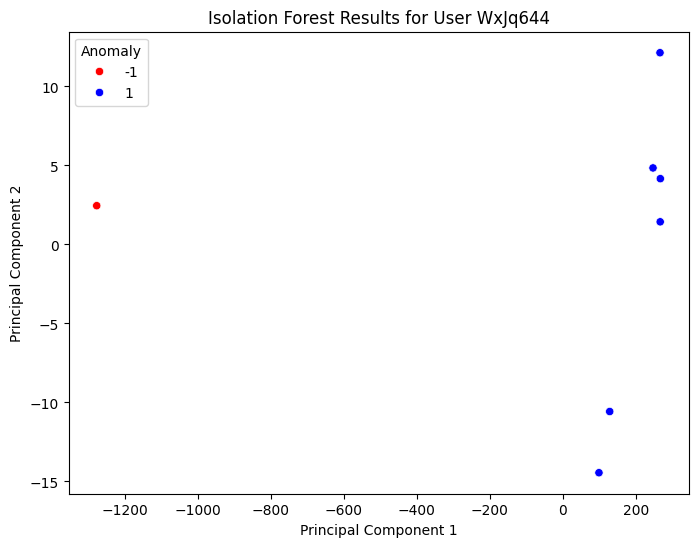

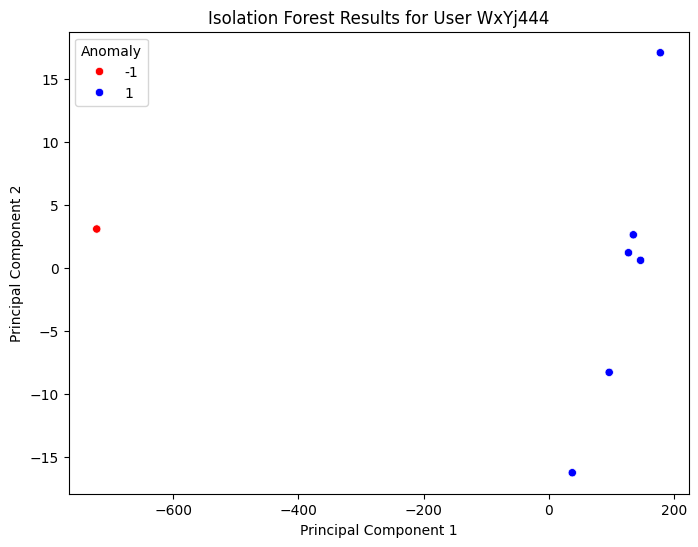

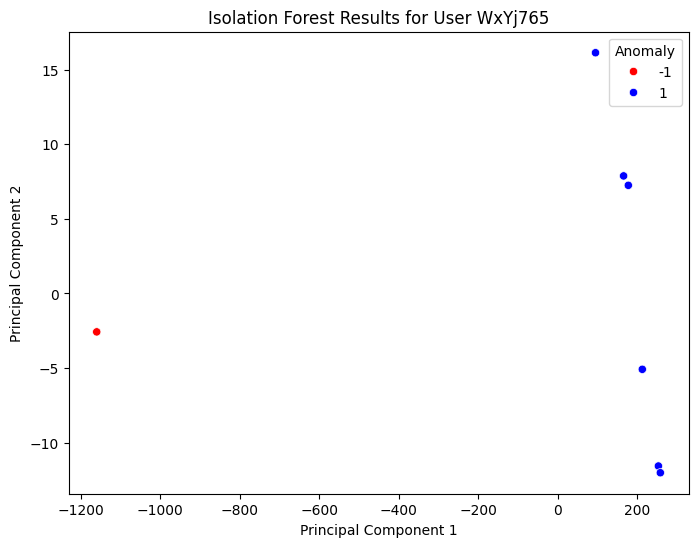

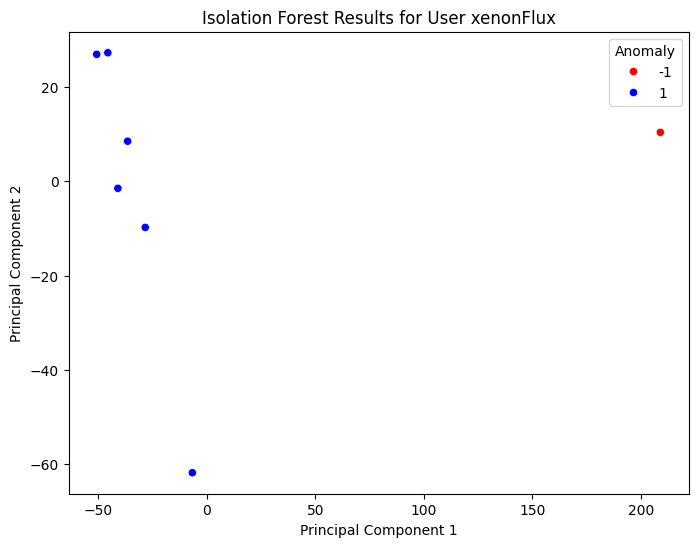

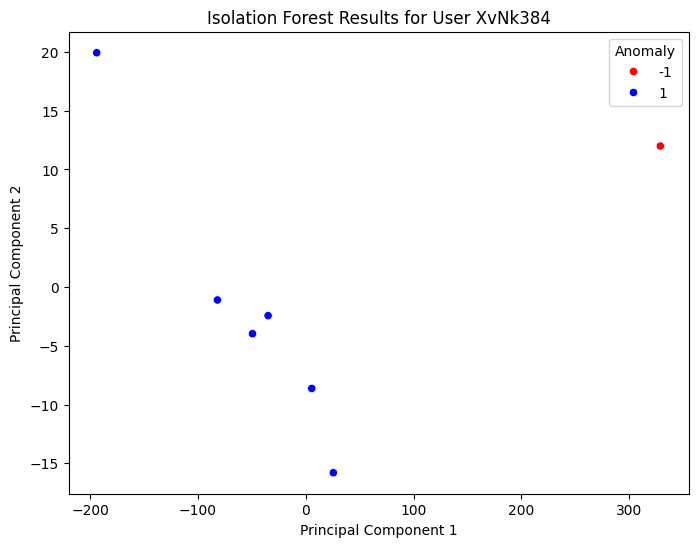

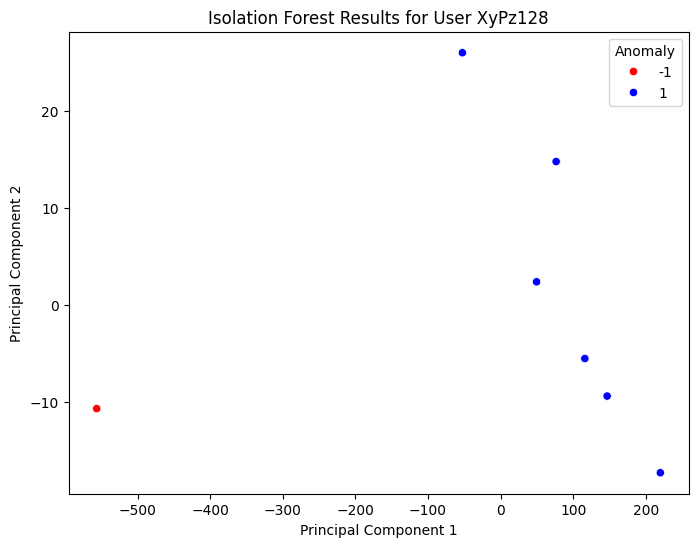

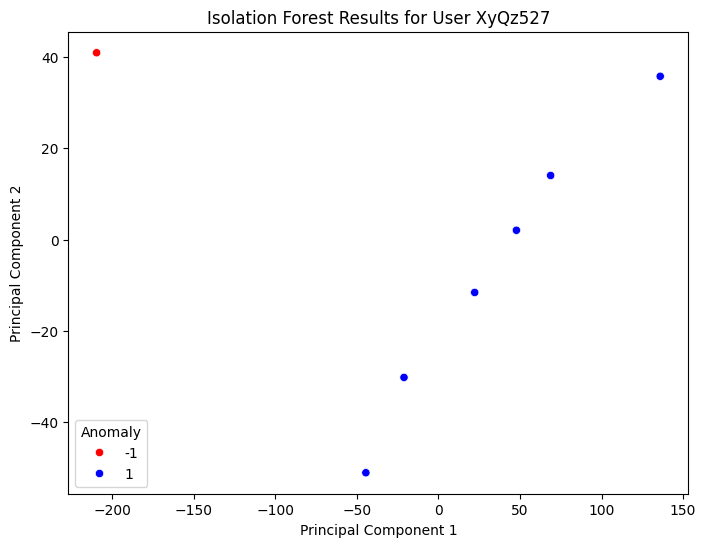

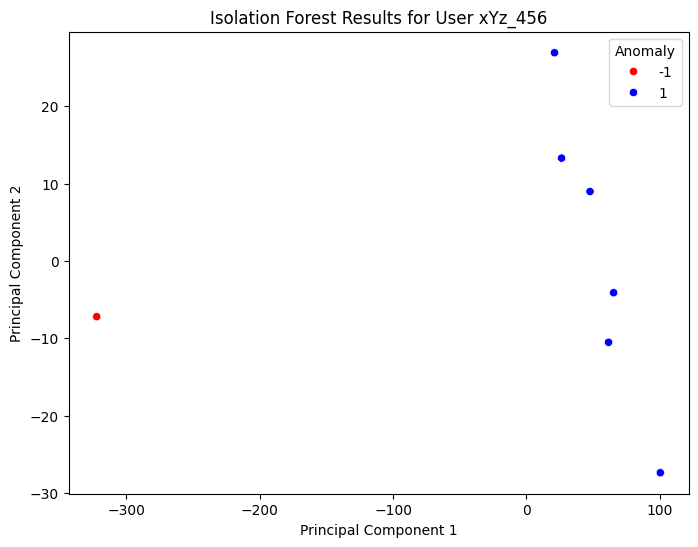

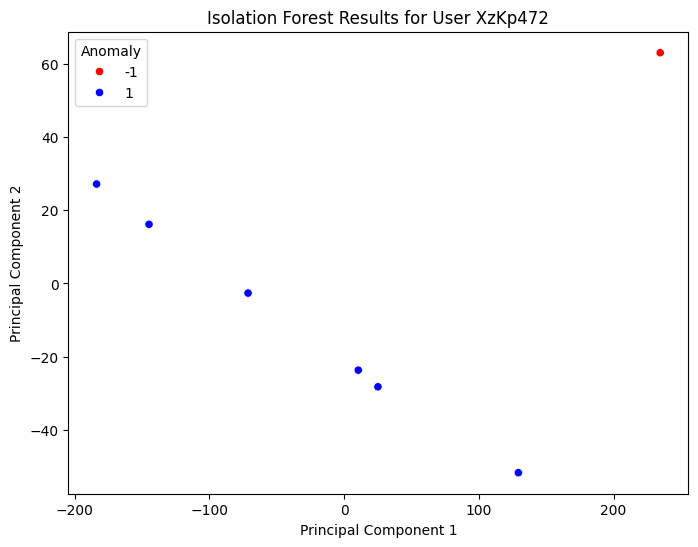

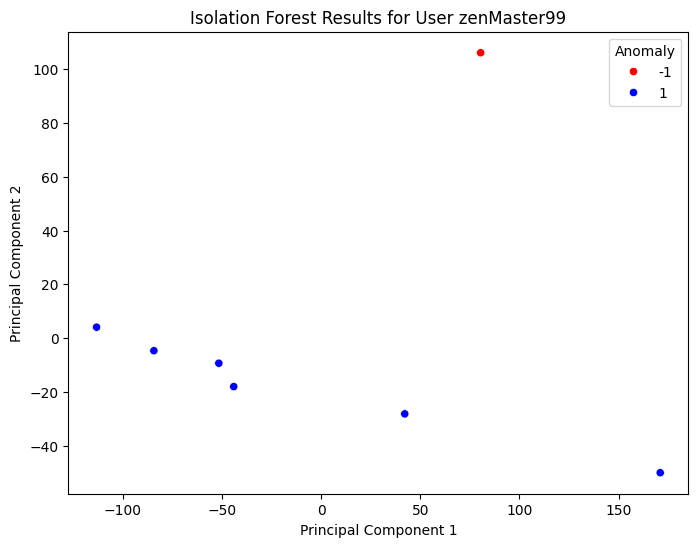

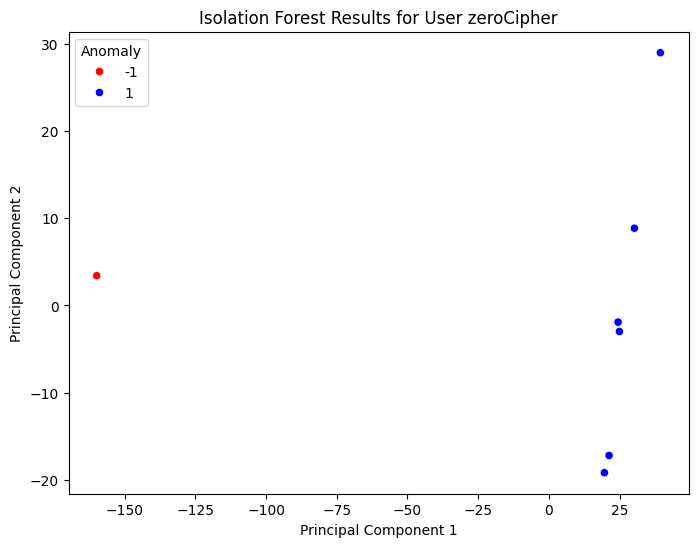

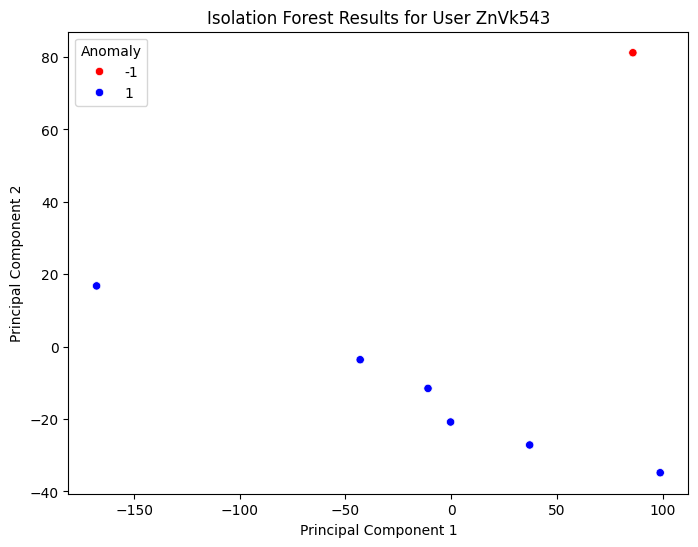

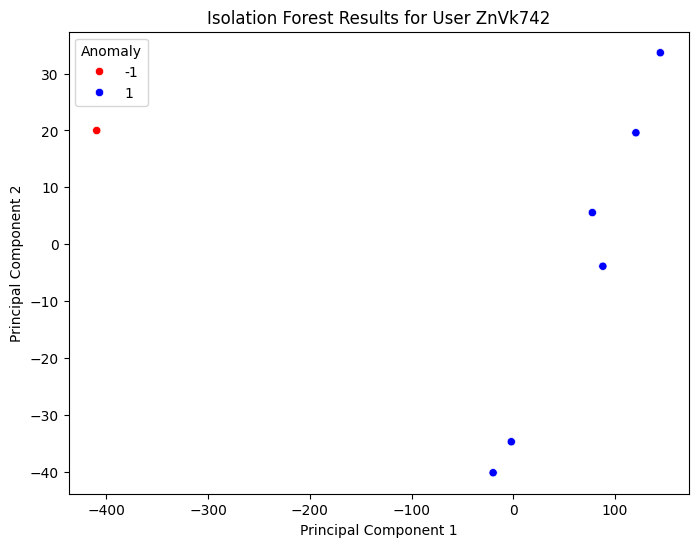

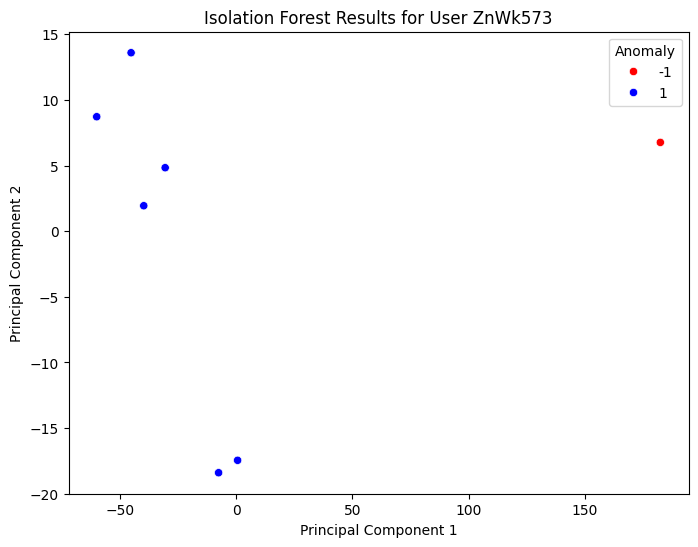

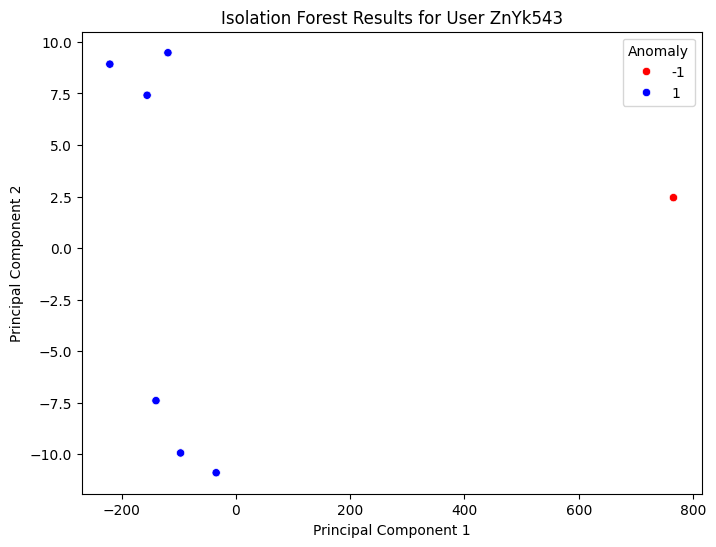

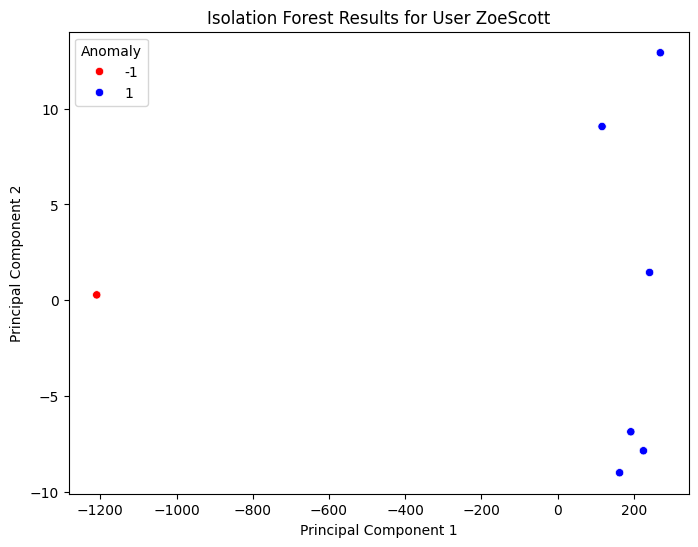

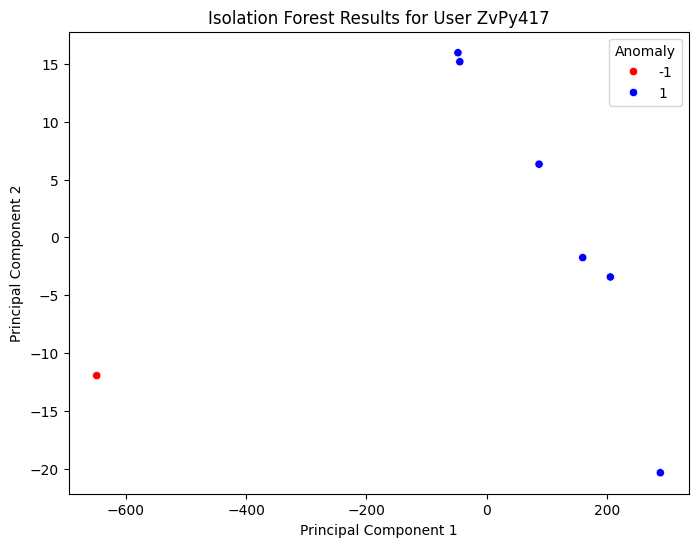

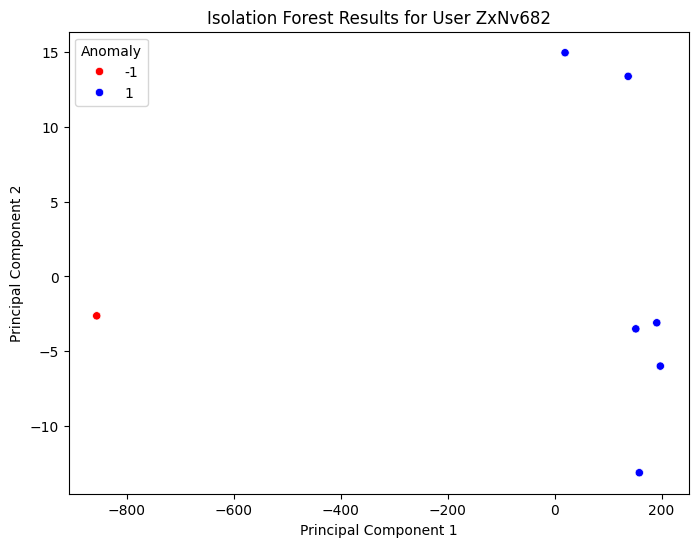

In [6]:
for user in users:
    user_data = df[df['userID'] == user].copy()
    
    # Drop non-numeric columns (like 'User' if present)
    user_data_numeric = user_data.select_dtypes(include=[np.number])
    
    # Train Isolation Forest
    model = IsolationForest(contamination=0.1, random_state=42)
    user_data['Anomaly'] = model.fit_predict(user_data_numeric)
    user_data['Anomaly_Score'] = model.decision_function(user_data_numeric)
    
    # Reduce dimensions using PCA
    pca = PCA(n_components=2)
    user_data[['PC1', 'PC2']] = pca.fit_transform(user_data_numeric)
    
    # Plot results
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='PC1', y='PC2', hue='Anomaly', data=user_data, palette={1: 'blue', -1: 'red'})
    plt.title(f'Isolation Forest Results for User {user}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title='Anomaly')
    plt.show()